In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os


: 

In [2]:
os.getcwd()

: 

In [3]:
df = pd.read_csv('wandb_export_2024-05-09T17_40_51.516+09_00.csv')
df.head()


Step  \
0     3   
1     8   
2    13   
3    18   
4    23   

   (EnergyMSE)TB_loss_step10_redOnly_H100_MSE+LSTM_2(logz)_h16 - accuracy  \
0                                           0.958333                        
1                                           0.965278                        
2                                           0.958333                        
3                                           0.937500                        
4                                           0.944444                        

   (EnergyMSE)TB_loss_step10_redOnly_H100_MSE+LSTM_2(logz)_h16 - accuracy__MIN  \
0                                           0.958333                             
1                                           0.965278                             
2                                           0.958333                             
3                                           0.937500                             
4                                           0.944444                             

   (EnergyMSE)TB_loss_step10_redOnly_H100_MSE+LSTM_2(logz)_h16 - accuracy__MAX  
0                                           0.958333                            
1                                           0.965278                            
2                                           0.958333                            
3                                           0.937500                            
4                                           0.944444

In [22]:
print(len(df["(EnergyMSE)TB_loss_step10_redOnly_H100_MSE+LSTM_2(logz)_h16 - accuracy"]))

50000


In [30]:
# moving average
df["MA"] = df["(EnergyMSE)TB_loss_step10_redOnly_H100_MSE+LSTM_2(logz)_h16 - accuracy"].rolling(window=1000).mean()

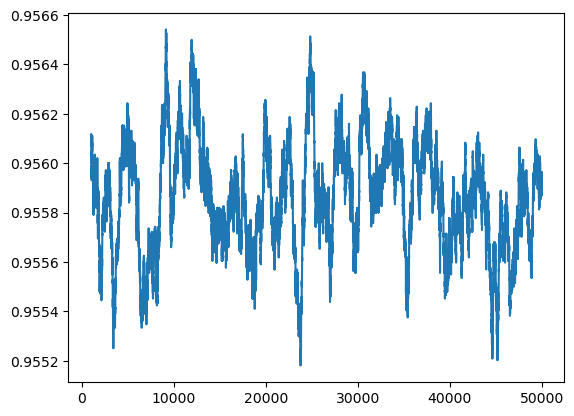

<Figure size 640x480 with 0 Axes>

In [31]:
# MA plot
plt.plot(df["MA"])
plt.show()
plt.savefig("MA_plot.png")


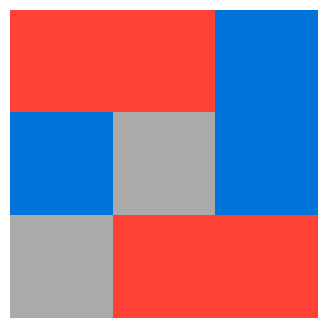

In [116]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap, BoundaryNorm

from collections import defaultdict

# Define the color mapping
colors = [
    "#000000",  # Black
    "#0074D9",  # Blue
    "#FF4136",  # Red
    "#2ECC40",  # Green
    "#FFDC00",  # Yellow
    "#AAAAAA",  # Gray
    "#F012BE",  # Pink
    "#FF851B",  # Orange
    "#7FDBFF",  # Light Blue
    "#870C25"   # Brown
]
cmap = ListedColormap(colors)

# Define boundaries for each color
boundaries = np.arange(-0.5, 10, 1)  # 각 색상을 0~9 값에 정확히 매핑
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

# Example trajectory data
state = np.array([[2, 2, 1],
                  [1, 5, 1],
                  [5, 2, 2]], dtype=int)  # Ensure data is integer

# Plot the grid
fig, ax = plt.subplots(figsize=(4, 4))
img = ax.imshow(state, cmap=cmap, norm=norm, interpolation='nearest')
ax.axis('off')
plt.show()



In [152]:
import numpy as np 

def trajectory_to_string(traj):
    """trajectory를 문자열로 변환하여 비교 가능하게 만듭니다."""
    return str(traj)  # 각 state 자체를 문자열로 변환

def find_unique_trajectories(trajectories, rewards):
    """유니크한 trajectory를 찾아 set으로 관리한 후, dict로 변환하여 각 trajectory와 해당 reward를 반환합니다."""
    print(f"Total trajectories: {len(trajectories)}")
    unique_trajectory_set = set(trajectory_to_string(traj) for traj in trajectories)
    unique_trajectories = []
    
    for unique_traj_str in unique_trajectory_set:
        for traj, reward in zip(trajectories, rewards):
            if trajectory_to_string(traj) == unique_traj_str:
             
                if isinstance(traj, np.ndarray):
                    int_trajectory = traj.astype(int)  # numpy 배열인 경우
                else:  # 리스트인 경우 재귀적으로 처리
                    int_trajectory = recursively_convert_to_int(traj)
                
                unique_trajectories.append({'trajectory': int_trajectory, 'reward': reward})
                break   # 같은 trajectory가 여러 번 등장할 필요가 없으므로 첫 번째 매칭에서 탈출
    print("len :", len(unique_trajectories))
    return unique_trajectories

def visualize_trajectory(fig, traj, title):
    """가변 길이의 trajectory (이미지 시퀀스)를 시각화합니다."""
    num_frames = len(traj)
    num_cols = min(5, num_frames)
    num_rows = (num_frames - 1) // num_cols + 1

    # [Black, Blue, Red, Green, Yellow, Gray, Pink, Orange, Light blue, Brown]
    colors = [
    "#000000",  # Black
    "#0074D9",  # Blue
    "#FF4136",  # Red
    "#2ECC40",  # Green
    "#FFDC00",  # Yellow
    "#AAAAAA",  # Gray
    "#F012BE",  # Pink
    "#FF851B",  # Orange
    "#7FDBFF",  # Light Blue
    "#870C25"   # Brown
    ]
    cmap = ListedColormap(colors)

    # Define boundaries for each color
    boundaries = np.arange(-0.5, 10, 1)  # 각 색상을 0~9 값에 정확히 매핑
    norm = BoundaryNorm(boundaries, cmap.N, clip=True)

    
    for i, state in enumerate(traj):
        # print(f"Frame {i+1} unique values: {np.unique(state)}")
        ax = fig.add_subplot(num_rows, num_cols, i + 1)
        state = np.array(state).squeeze()  # (1, 3, 3)에서 첫 번째 차원 제거 -> (3, 3)
        if state.ndim != 3 :
            state = state[:3, :3]

            # print(state)
        img = ax.imshow(state, cmap=cmap, norm=norm, interpolation='nearest')  # 'nearest'로 픽셀 경계 강
        ax.axis('off')
        ax.set_title(f'Frame {i+1}')
    
    fig.suptitle(title)
    plt.tight_layout()

def load_and_visualize_unique(filename='data.json', max_display=10):
    # Load data from JSON file
    with open(filename, 'r') as f:
        data = json.load(f)

    trajectories = data['trajectories']
    rewards = data['rewards']
    
    # Find unique trajectories
    unique_traj_rewards = find_unique_trajectories(trajectories, rewards)
    
    num_unique = len(unique_traj_rewards)

    for i, traj_reward in enumerate(unique_traj_rewards):
        if i >= max_display:
            break
        
        traj = traj_reward['trajectory']
        reward = traj_reward['reward']
        # print(f"Trajectory Type: {type(traj)}, Example: {traj[0]}")

        fig = plt.figure(figsize=(15, 5), dpi=150)  # DPI를 높여 선명도 개선
        visualize_trajectory(fig, traj, f'Trajectory {i+1} (Reward: {reward:.2f})')
        plt.show()

    print(f"Total unique trajectories visualized: {num_unique}")

def recursively_convert_to_int(data):
    """리스트 형태의 데이터를 재귀적으로 int로 변환."""
    if isinstance(data, list):
        return [recursively_convert_to_int(item) for item in data]
    elif isinstance(data, (float, int)):
        return int(data)
    else:
        raise TypeError(f"Unsupported data type: {type(data)}")

In [133]:
import numpy as np

# Mock `gen_rotate` helper functions
def _pad_assign(obj, rotated_obj):
    """Assign rotated object back to the original array."""
    obj[:rotated_obj.shape[0], :rotated_obj.shape[1]] = rotated_obj

# Mock `gen_rotate` function for standalone test
def gen_rotate(k=1):
    '''
    Generates Rotate90 / Rotate180 / Rotate270 actions counterclockwise.
    '''
    assert 0 < k < 4

    def Rotate(state):
        # Extract object dimensions and grid
        obj = state['object']
        h, w = state['object_dim']

        # Rotate the object
        rotated_obj = np.rot90(obj[:h, :w], k=k)
        _pad_assign(state['object'], rotated_obj)
        return state

    Rotate.__name__ = f"Rotate_{90*k}"    
    return Rotate

# Test the standalone `gen_rotate` function
def test_gen_rotate_standalone():
    # Create a mock state
    state = {
        "object": np.array([
            [1, 1, 0],
            [1, 1, 0],
            [0, 0, 2]
        ]),
        "object_dim": [4, 4]
    }

    # Test different rotations
    for k in [1, 3]:  # 90, 180, 270 degrees
        rotate_action = gen_rotate(k)
        print(f"\n=== Testing Rotate_{90*k} ===")
        print("Object before rotation:")
        print(state['object'])

        # Perform rotation
        updated_state = rotate_action(state)

        # Check results
        print(f"Object after Rotate_{90*k}:")
        print(updated_state['object'])

# Run the test
test_gen_rotate_standalone()



=== Testing Rotate_90 ===
Object before rotation:
[[1 1 0]
 [1 1 0]
 [0 0 2]]
Object after Rotate_90:
[[0 0 2]
 [1 1 0]
 [1 1 0]]

=== Testing Rotate_270 ===
Object before rotation:
[[0 0 2]
 [1 1 0]
 [1 1 0]]
Object after Rotate_270:
[[1 1 0]
 [1 1 0]
 [0 0 2]]


In [137]:
import numpy as np
from typing import Tuple

# Helper functions
def _pad_assign(dst: np.ndarray, src: np.ndarray):
    """Assign src array into dst, padding with zeros where necessary."""
    h, w = src.shape
    dst[:h, :w] = src
    dst[h:, :] = 0
    dst[:, w:] = 0

def _apply_patch(state: dict):
    """Apply the object patch to the grid."""
    objdict = state['object_states']
    p: np.ndarray = objdict['object']
    x, y = objdict['object_pos']
    h, w = objdict['object_dim']
    gh, gw = state['grid_dim']
    p = p[:h, :w]

    # Copy background
    np.copyto(state['grid'], objdict['background'])
    if x + h > 0 and x < gh and y + w > 0 and y < gw:
        # If patch is inside the grid
        stx = max(0, x)
        edx = min(gh, x + h)
        sty = max(0, y)
        edy = min(gw, y + w)

        # Truncate patch
        p = p[stx - x: edx - x, sty - y: edy - y]
        np.copyto(state['grid'][stx:edx, sty:edy], p, where=(p > 0))

def _apply_sel(state: dict):
    """Apply the selection patch to the selected grid."""
    objdict = state['object_states']
    p: np.ndarray = objdict['object_sel']
    x, y = objdict['object_pos']
    h, w = objdict['object_dim']
    gh, gw = state['grid_dim']
    p = p[:h, :w]

    # Copy background
    state['selected'][:, :] = 0
    if x + h > 0 and x < gh and y + w > 0 and y < gw:
        # If patch is inside the grid
        stx = max(0, x)
        edx = min(gh, x + h)
        sty = max(0, y)
        edy = min(gw, y + w)

        # Truncate patch
        p = p[stx - x: edx - x, sty - y: edy - y]
        np.copyto(state['selected'][stx:edx, sty:edy], p)

def _init_objsel(state: dict, selection: np.ndarray) -> Tuple[int, int, int, int]:
    """Initialize object selection states for smooth object-oriented actions."""
    objdict = state['object_states']
    sel = selection

    if np.any(sel):  # New selection
        # Bounding box of selection
        rows = np.any(sel, axis=1)
        cols = np.any(sel, axis=0)
        rmin, rmax = np.where(rows)[0][[0, -1]]
        cmin, cmax = np.where(cols)[0][[0, -1]]

        h = rmax - rmin + 1
        w = cmax - cmin + 1

        # Update object states
        objdict['object_dim'][:] = (h, w)
        selected_part = sel[rmin:rmax + 1, cmin:cmax + 1] > 0
        objdict['object'][:, :] = 0
        np.copyto(objdict['object'][0:h, 0:w], state['grid'][rmin:rmax + 1, cmin:cmax + 1], where=selected_part)
        objdict['object_sel'][:, :] = 0
        np.copyto(objdict['object_sel'][0:h, 0:w], selected_part, where=selected_part)
        objdict['background'][:, :] = state['grid']
        np.copyto(objdict['background'], 0, where=(sel > 0))
        objdict['object_pos'][:] = (rmin, cmin)
        objdict['active'][0] = 1
        objdict['rotation_parity'][0] = 0

        # Update selected grid
        np.copyto(state['selected'], sel.astype(np.int8))
        return rmin, rmax, cmin, cmax
    elif objdict['active'][0]:  # Continue with previous object selection
        x, y = objdict['object_pos']
        h, w = objdict['object_dim']
        return x, x + h - 1, y, y + w - 1
    else:  # No selection
        return None, None, None, None

# Rotation generator
def gen_rotate(k=1):
    """Generate Rotate actions (90/180/270 degrees counterclockwise)."""
    assert 1 <= k <= 3, "Rotation step must be 1 (90), 2 (180), or 3 (270)."

    def Rotate(state, action):
        xmin, xmax, ymin, ymax = _init_objsel(state, action['selection'])
        if xmin is None:
            return
        objdict = state['object_states']
        h, w = objdict['object_dim']

        if k % 2 == 0:  # 180 degrees
            pass
        elif h % 2 == w % 2:
            cx = (xmax + xmin) * 0.5
            cy = (ymax + ymin) * 0.5
            x, y = objdict['object_pos']
            objdict['object_pos'][:] = (int(np.floor(cx - cy + y)), int(np.floor(cy - cx + x)))
            objdict['object_dim'][:] = (w, h)
        else:
            cx = (xmax + xmin) * 0.5
            cy = (ymax + ymin) * 0.5
            objdict['rotation_parity'][0] += k
            objdict['rotation_parity'][0] %= 2
            sig = (k + 2) % 4 - 2
            mod = 1 - objdict['rotation_parity'][0]
            mx = min(cx + sig * (cy - ymin), cx + sig * (cy - ymax)) + mod
            my = min(cy - sig * (cx - xmin), cy - sig * (cx - xmax)) + mod
            objdict['object_pos'][:] = (int(np.floor(mx)), int(np.floor(my)))
            objdict['object_dim'][:] = (w, h)

        # Apply rotation
        _pad_assign(objdict['object'], np.rot90(objdict['object'][:h, :w], k=k))
        _pad_assign(objdict['object_sel'], np.rot90(objdict['object_sel'][:h, :w], k=k))
        _apply_patch(state)
        _apply_sel(state)

    Rotate.__name__ = f"Rotate_{90 * k}"
    return Rotate

# Flip generator
def gen_flip(axis: str = "H"):
    """Generate Flip actions."""
    flips = {
        "H": lambda x: np.fliplr(x),
        "V": lambda x: np.flipud(x),
    }
    assert axis in flips, "Invalid Axis"

    def Flip(state, action):
        sel = action['selection']
        valid, _, _, _ = _init_objsel(state, sel)
        if valid is None:
            return
        objdict = state['object_states']
        h, w = objdict['object_dim']

        _pad_assign(objdict['object'], flips[axis](objdict['object'][:h, :w]))
        _pad_assign(objdict['object_sel'], flips[axis](objdict['object_sel'][:h, :w]))
        _apply_patch(state)
        _apply_sel(state)

    Flip.__name__ = f"Flip_{axis}"
    return Flip

# Test the functionality
def test_rotate_and_flip():
    grid = np.array([
        [1, 0, 2],
        [0, 3, 0],
        [4, 0, 5]
    ])
    state = {
        "grid": grid.copy(),
        "grid_dim": grid.shape,
        "selected": np.zeros(grid.shape, dtype=int),
        "object_states": {
            "object": grid.copy(),
            "object_sel": np.zeros(grid.shape, dtype=int),
            "object_dim": [3, 3],
            "object_pos": [0, 0],
            "active": [1],
            "rotation_parity": [0],
            "background": grid.copy(),
        },
    }
    action = {"selection": np.ones(grid.shape, dtype=int)}

    # Rotate tests
    print("Original Grid:")
    print(state["grid"])
    for k in [1, 2, 3]:  # 90, 180, 270 degrees
        rotate_fn = gen_rotate(k)
        rotate_fn(state, action)
        print(f"\nAfter Rotate_{90 * k}:")
        print(state["grid"])
        state["grid"] = grid.copy()  # Reset grid

    # Flip tests
    for axis in ["H", "V"]:
        flip_fn = gen_flip(axis)
        flip_fn(state, action)
        print(f"\nAfter Flip_{axis}:")
        print(state["grid"])
        state["grid"] = grid.copy()  # Reset grid

test_rotate_and_flip()


Original Grid:
[[1 0 2]
 [0 3 0]
 [4 0 5]]

After Rotate_90:
[[2 0 5]
 [0 3 0]
 [1 0 4]]

After Rotate_180:
[[5 0 4]
 [0 3 0]
 [2 0 1]]

After Rotate_270:
[[4 0 1]
 [0 3 0]
 [5 0 2]]

After Flip_H:
[[2 0 1]
 [0 3 0]
 [5 0 4]]

After Flip_V:
[[4 0 5]
 [0 3 0]
 [1 0 2]]


In [15]:
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Define action mapping
ACTION_LIST = [
    "left rotate",  # 0
    "right rotate", # 1
    "H flip",       # 2
    "V flip",       # 3
    "submit"        # 4
]

def map_action_to_string(action):
    """Convert action index to a readable string using ACTION_LIST."""
    if 0 <= action < len(ACTION_LIST):
        return ACTION_LIST[action]
    else:
        raise ValueError(f"Invalid action index: {action}")

def trajectory_to_string(traj):
    """Convert trajectory to a string for comparison."""
    return str(traj)

def find_unique_trajectories_a(trajectories, rewards, actions):
    """
    Find unique trajectories and their associated rewards and actions.
    Returns a list of dictionaries containing unique trajectories, rewards, and actions.
    """
    print(f"Total trajectories: {len(trajectories)}")
    unique_trajectories = []

    for traj, reward, action in zip(trajectories, rewards, actions or [None] * len(trajectories)):
        # Convert trajectory to integer format
        if isinstance(traj, np.ndarray):
            int_trajectory = traj.astype(int)
        else:
            int_trajectory = recursively_convert_to_int(traj)

        # Map actions to strings
        if action is not None:
            action_strings = [map_action_to_string(a) for a in action]
        else:
            action_strings = ["N/A"] * (len(traj) - 1)

        unique_trajectories.append({
            'trajectory': int_trajectory,
            'reward': reward,
            'actions': action_strings
        })

    print("Unique trajectories found:", len(unique_trajectories))
    return unique_trajectories


def visualize_trajectory_a(fig, traj, actions, title):
    """
    Visualize a trajectory (sequence of states) and display actions.
    """
    num_frames = len(traj)
    num_cols = min(5, num_frames)
    num_rows = (num_frames - 1) // num_cols + 1

    # [Black, Blue, Red, Green, Yellow, Gray, Pink, Orange, Light blue, Brown]
    colors = [
        "#000000",  # Black
        "#0074D9",  # Blue
        "#FF4136",  # Red
        "#2ECC40",  # Green
        "#FFDC00",  # Yellow
        "#AAAAAA",  # Gray
        "#F012BE",  # Pink
        "#FF851B",  # Orange
        "#7FDBFF",  # Light Blue
        "#870C25"   # Brown
    ]
    cmap = ListedColormap(colors)
    boundaries = np.arange(-0.5, 10, 1)
    norm = BoundaryNorm(boundaries, cmap.N, clip=True)

    for i, state in enumerate(traj):
        ax = fig.add_subplot(num_rows, num_cols, i + 1)
        state = np.array(state).squeeze()
        if state.ndim != 3:
            state = state[:4, :4]
        ax.imshow(state, cmap=cmap, norm=norm, interpolation='nearest')
        ax.axis('off')

        if actions is not None and i < len(actions):
            ax.set_title(actions[i], fontsize=8)
        else:
            ax.set_title(f'State {i+1}', fontsize=8)

    fig.suptitle(title)
    plt.tight_layout()


def load_and_visualize_action(filename='data.json', max_display=10):
    """
    Load data from JSON file and visualize unique trajectories with actions.
    """
    # Load data
    with open(filename, 'r') as f:
        data = json.load(f)

    trajectories = data['trajectories']
    rewards = data['rewards']
    actions = data.get('actions', None)

    # Find unique trajectories
    unique_traj_rewards = find_unique_trajectories_a(trajectories, rewards, actions)
    num_unique = len(unique_traj_rewards)

    for i, traj_reward in enumerate(unique_traj_rewards):
        if i >= max_display:
            break

        traj = traj_reward['trajectory']
        reward = traj_reward['reward']

        if 'actions' in traj_reward:
            action = traj_reward['actions']
        else:
            action = traj_reward.get('actions', ["N/A"] * (len(traj) - 1))

        fig = plt.figure(figsize=(15, 5), dpi=150)
        visualize_trajectory_a(fig, traj, action, f'Trajectory {i+1} (Reward: {reward:.2f})')
        plt.show()

    print(f"Total unique trajectories visualized: {num_unique}")

def recursively_convert_to_int(data):
    """Recursively convert data to integers."""
    if isinstance(data, list):
        return [recursively_convert_to_int(item) for item in data]
    elif isinstance(data, (float, int)):
        return int(data)
    else:
        raise TypeError(f"Unsupported data type: {type(data)}")


In [16]:
load_and_visualize_action('111eval_samples_10,5_(test)_task_149_step_30000.json', max_display=100)

FileNotFoundError: [Errno 2] No such file or directory: '111eval_samples_10,5_(test)_task_149_step_30000.json'

In [17]:
load_and_visualize_unique('1234_onpolicy_(df+cycle+tje)_178_step_30000.json', max_display=100)

NameError: name 'load_and_visualize_unique' is not defined

In [14]:
load_and_visualize_unique('eval_samples_argmax_step_20000.json', max_display=1000)

NameError: name 'load_and_visualize_unique' is not defined

Total trajectories: 300


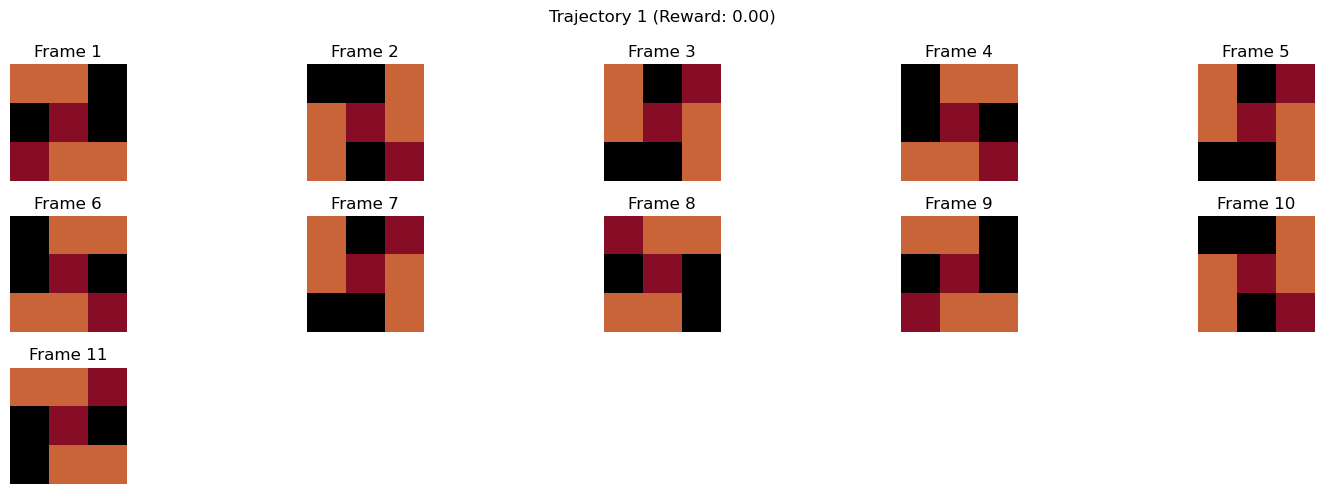

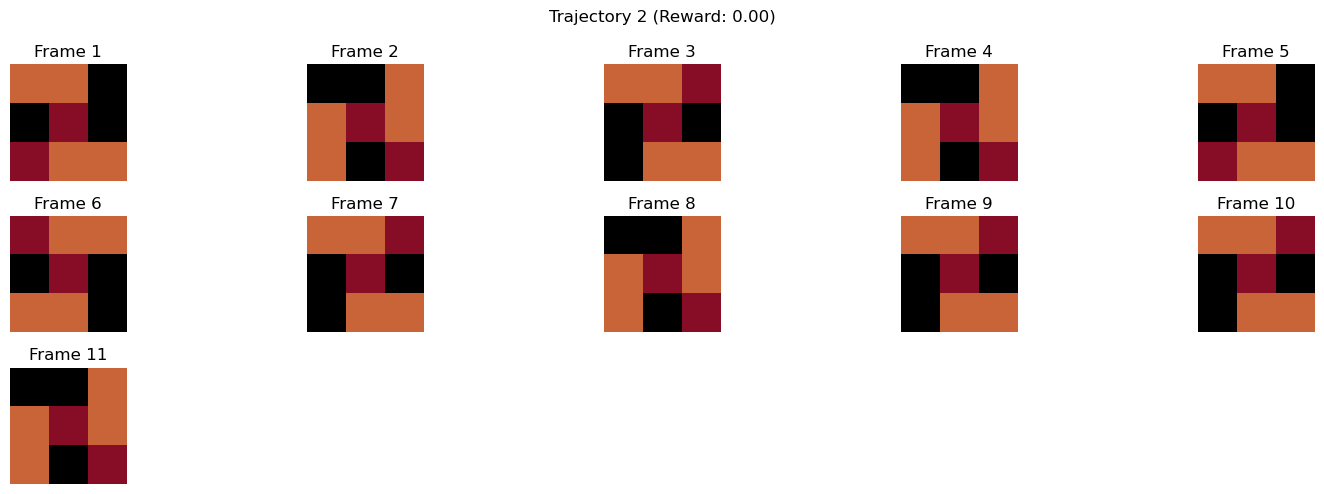

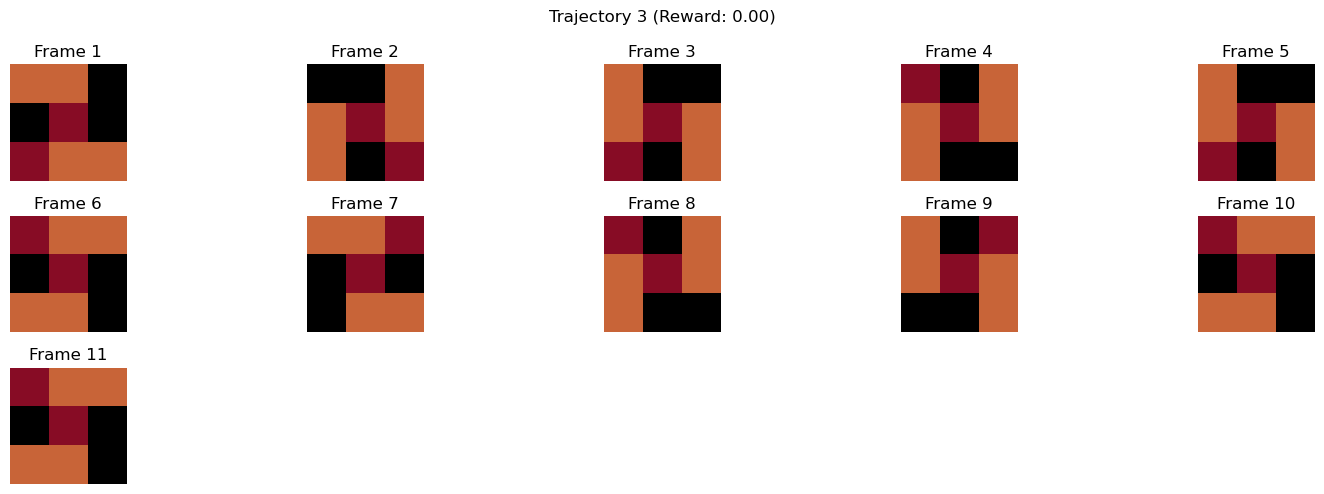

Total unique trajectories visualized: 3


In [46]:
load_and_visualize_unique('eval_samples_geometric_step_20000_local.json', max_display=1000)

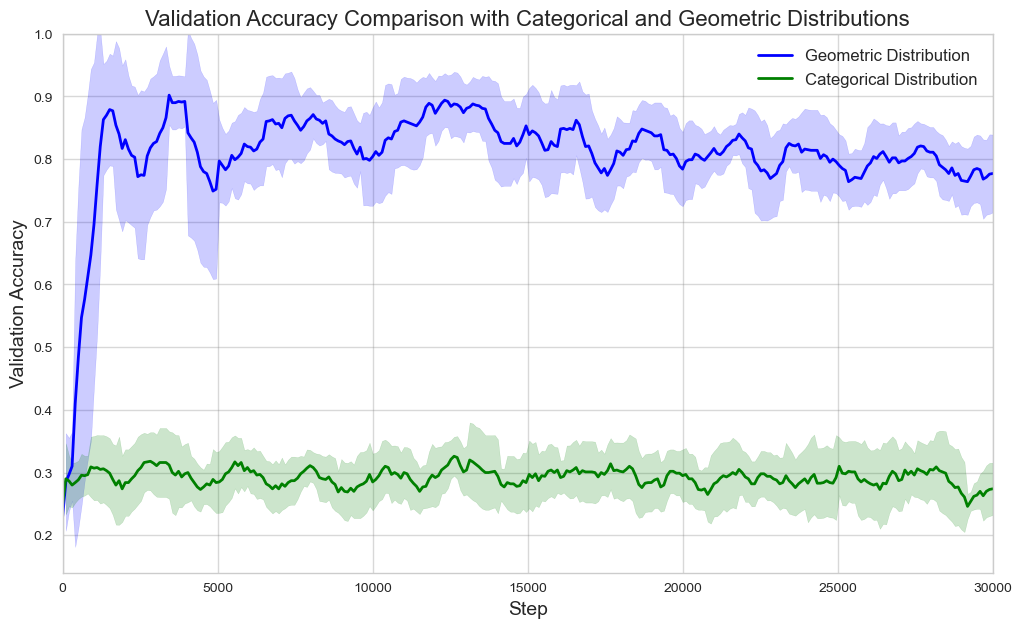

In [49]:
# 파일 경로 설정
file1_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/wandb_export_2024-11-04T15_49_45.498+09_00.csv'  # 첫 번째 파일 경로
file2_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/wandb_export_2024-11-04T15_50_11.396+09_00.csv'  # 두 번째 파일 경로

# CSV 파일 로드
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# 스타일 설정
plt.style.use('seaborn-whitegrid')

# Step 30,000 이하의 데이터만 필터링
df1 = df1[df1["Step"] <= 30000]
df2 = df2[df2["Step"] <= 30000]

# 이동 평균 윈도우 설정 (e.g., 10)
window_size = 10

# 이동 평균 및 표준편차 계산 (초기값 보존)
df1["smoothed_val_accuracy"] = df1["(최종 geo, dx))HPC cuda0, ep10, a5, task 178 - val_accuracy"].rolling(window=window_size, min_periods=1).mean()
df1["smoothed_val_accuracy_std"] = df1["(최종 geo, dx))HPC cuda0, ep10, a5, task 178 - val_accuracy"].rolling(window=window_size, min_periods=1).std()

df1["smoothed_val_accuracy_min"] = df1["smoothed_val_accuracy"] - df1["smoothed_val_accuracy_std"]
df1["smoothed_val_accuracy_max"] = df1["smoothed_val_accuracy"] + df1["smoothed_val_accuracy_std"]

df2["smoothed_val_accuracy"] = df2["(최종 cat, dx))HPC cuda1, ep10, a5, task 178 - val_accuracy"].rolling(window=window_size, min_periods=1).mean()
df2["smoothed_val_accuracy_std"] = df2["(최종 cat, dx))HPC cuda1, ep10, a5, task 178 - val_accuracy"].rolling(window=window_size, min_periods=1).std()

df2["smoothed_val_accuracy_min"] = df2["smoothed_val_accuracy"] - df2["smoothed_val_accuracy_std"]
df2["smoothed_val_accuracy_max"] = df2["smoothed_val_accuracy"] + df2["smoothed_val_accuracy_std"]

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_facecolor('white')  # 배경색 설정

# 첫 번째 파일 데이터 (스무딩) 플롯 및 분산 영역 표시
ax.plot(df1["Step"], df1["smoothed_val_accuracy"], label='Geometric Distribution', linewidth=2, color='blue')
ax.fill_between(
    df1["Step"],
    df1["smoothed_val_accuracy_min"],
    df1["smoothed_val_accuracy_max"],
    color='blue',
    alpha=0.2,)

# 두 번째 파일 데이터 (스무딩) 플롯 및 분산 영역 표시
ax.plot(df2["Step"], df2["smoothed_val_accuracy"], label='Categorical Distribution', linewidth=2, color='green')
ax.fill_between(
    df2["Step"],
    df2["smoothed_val_accuracy_min"],
    df2["smoothed_val_accuracy_max"],
    color='green',
    alpha=0.2,
)

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.set_title('Validation Accuracy Comparison with Categorical and Geometric Distributions', fontsize=16)
ax.legend(fontsize=12)

# 그리드를 희미하게 설정
ax.grid(True, color='gray', alpha=0.3)

plt.xlim(left=0, right=30000)
plt.ylim(top=1)

# PDF로 저장
plt.savefig('validation_accuracy_comparison_with_smoothed_distribution.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()

In [18]:
import json
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
import numpy as np

# Load JSON data
def load_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['trajectories'], data['rewards']

# Unique trajectory 찾기
def find_unique_trajectories(trajectories, rewards):
    unique_trajectory_set = set(map(str, trajectories))
    unique_trajectories = []
    successful_trajectories = 0

    for unique_traj in unique_trajectory_set:
        for traj, reward in zip(trajectories, rewards):
            if str(traj) == unique_traj:
                unique_trajectories.append({'trajectory': traj, 'reward': reward})
                if reward > 1.0:  # 성공한 trajectory로 가정
                    successful_trajectories += 1
                break
    return len(unique_trajectories), successful_trajectories

# 전체 성공률 계산 및 검정 수행 함수
def generate_summary_and_test(cat_file='categorical_data.json', geo_file='geometric_data.json'):
    # Categorical 데이터
    cat_trajectories, cat_rewards = load_data(cat_file)
    cat_unique_count, cat_successful_count = find_unique_trajectories(cat_trajectories, cat_rewards)
    cat_success_rate_unique = cat_successful_count / cat_unique_count
    cat_total_count = len(cat_trajectories)
    cat_success_rate_total = sum(1 for reward in cat_rewards if reward > 1.0) / cat_total_count
    
    # Geometric 데이터
    geo_trajectories, geo_rewards = load_data(geo_file)
    geo_unique_count, geo_successful_count = find_unique_trajectories(geo_trajectories, geo_rewards)
    geo_success_rate_unique = geo_successful_count / geo_unique_count
    geo_total_count = len(geo_trajectories)
    geo_success_rate_total = sum(1 for reward in geo_rewards if reward > 1.0) / geo_total_count

    # 테이블 생성
    data = {
        'Distribution': ['Categorical', 'Geometric'],
        'Unique Trajectories': [cat_unique_count, geo_unique_count],
        'Successful Unique Trajectories': [cat_successful_count, geo_successful_count],
        'Success Rate (Unique, %)': [cat_success_rate_unique * 100, geo_success_rate_unique * 100],
        'Total Trajectories': [cat_total_count, geo_total_count],
        'Successful Total Trajectories': [sum(1 for reward in cat_rewards if reward > 1.0), sum(1 for reward in geo_rewards if reward> 1.0)],
        'Success Rate (Total, %)': [cat_success_rate_total * 100, geo_success_rate_total * 100]
    }
    df = pd.DataFrame(data)
    print(df)

    # 카이제곱 검정 수행
    contingency_table = [
        [cat_successful_count, cat_unique_count - cat_successful_count],
        [geo_successful_count, geo_unique_count - geo_successful_count]
    ]
    chi2, chi2_p_value, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi-squared test:\nChi2 Statistic: {chi2}, p-value: {chi2_p_value}")

    # 피셔의 정확 검정 수행
    _, fisher_p_value = fisher_exact(contingency_table)
    print(f"Fisher's exact test p-value: {fisher_p_value}")

    # Cramér's V 계산
    cramers_v = calculate_cramers_v(np.array(contingency_table))
    print(f"Cramér's V: {cramers_v}")

    # 통계 결과 해석
    significance_level = 0.05
    if chi2_p_value < significance_level:
        print("Chi-squared test: The success rate difference between Categorical and Geometric distributions is statistically significant.")
    else:
        print("Chi-squared test: No statistically significant difference in success rate between Categorical and Geometric distributions.")
    
    if fisher_p_value < significance_level:
        print("Fisher's exact test: The success rate difference between Categorical and Geometric distributions is statistically significant.")
    else:
        print("Fisher's exact test: No statistically significant difference in success rate between Categorical and Geometric distributions.")

    return df, chi2, chi2_p_value, fisher_p_value, cramers_v

# Cramér's V 계산 함수
def calculate_cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = np.sum(contingency_table)
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# 검증 결과 실행
summary_table, chi2_stat, chi2_p_value, fisher_p_value, cramers_v = generate_summary_and_test()


FileNotFoundError: [Errno 2] No such file or directory: 'categorical_data.json'

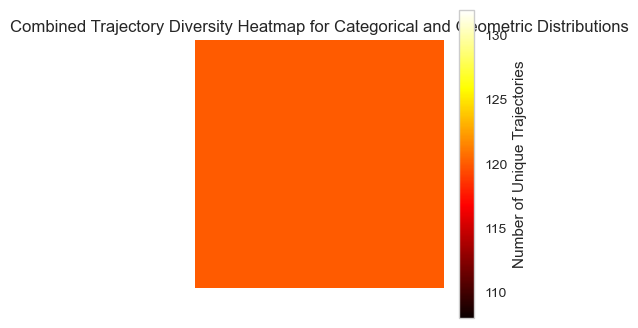

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load JSON data
def load_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['trajectories'], data['rewards']

# Find unique trajectories
def find_unique_trajectories(trajectories):
    unique_traj_set = set(map(str, trajectories))
    unique_trajectories = []
    for unique_traj_str in unique_traj_set:
        for traj in trajectories:
            if str(traj) == unique_traj_str:
                unique_trajectories.append(traj)
                break
    return unique_trajectories

# Create a heatmap showing the number of unique trajectories passing through each state
def calculate_combined_trajectory_diversity_heatmap(unique_trajectories_list, grid_size=(3, 3)):
    heatmap = np.zeros(grid_size, dtype=int)
    
    for unique_trajectories in unique_trajectories_list:
        for traj in unique_trajectories:
            # Set to keep track of states visited in this trajectory
            states_in_traj = set()
            for state in traj:
                state_array = np.array(state).squeeze()
                if state_array.shape != grid_size:
                    state_array = state_array[:3, :3]  # 유지하는 부분
                
                # For each position in the grid, record if it's visited
                for i in range(grid_size[0]):
                    for j in range(grid_size[1]):
                        if state_array[i, j] != 0:  # 만약 해당 위치가 0이 아니면 방문된 것으로 간주
                            states_in_traj.add((i, j))
            # Increment the heatmap positions corresponding to the states visited in this trajectory
            for position in states_in_traj:
                heatmap[position] += 1
    return heatmap

# Visualize the trajectory diversity heatmap
def visualize_diversity_heatmap(heatmap, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(heatmap, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Number of Unique Trajectories')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load data and generate a combined heatmap for both distributions
def generate_and_visualize_combined_diversity_heatmap(cat_file='categorical_data.json', geo_file='geometric_data.json'):
    # Load data
    cat_trajectories, _ = load_data(cat_file)
    geo_trajectories, _ = load_data(geo_file)
    
    # Find unique trajectories
    cat_unique_trajectories = find_unique_trajectories(cat_trajectories)
    geo_unique_trajectories = find_unique_trajectories(geo_trajectories)
    
    # Combine both distributions' unique trajectories into one heatmap
    combined_heatmap = calculate_combined_trajectory_diversity_heatmap([cat_unique_trajectories, geo_unique_trajectories], grid_size=(3, 3))
    
    # Visualize combined heatmap
    visualize_diversity_heatmap(combined_heatmap, 'Combined Trajectory Diversity Heatmap for Categorical and Geometric Distributions')

# 실행
generate_and_visualize_combined_diversity_heatmap()


In [94]:
# Bar chart for unique trajectory counts
def count_unique_trajectories(trajectories):
    unique_trajectories = set(map(str, trajectories))
    return len(unique_trajectories)

def visualize_unique_counts(cat_file='categorical_data.json', geo_file='geometric_data.json'):
    cat_trajectories, _ = load_data(cat_file)
    geo_trajectories, _ = load_data(geo_file)
    
    cat_count = count_unique_trajectories(cat_trajectories)
    geo_count = count_unique_trajectories(geo_trajectories)
    
    plt.figure(figsize=(8, 6))
    plt.bar(['Categorical', 'Geometric'], [cat_count, geo_count], color=['blue', 'green'])
    plt.xlabel('Distribution')
    plt.ylabel('Unique Trajectory Count')
    plt.title('Comparison of Unique Trajectory Counts')
    plt.show()


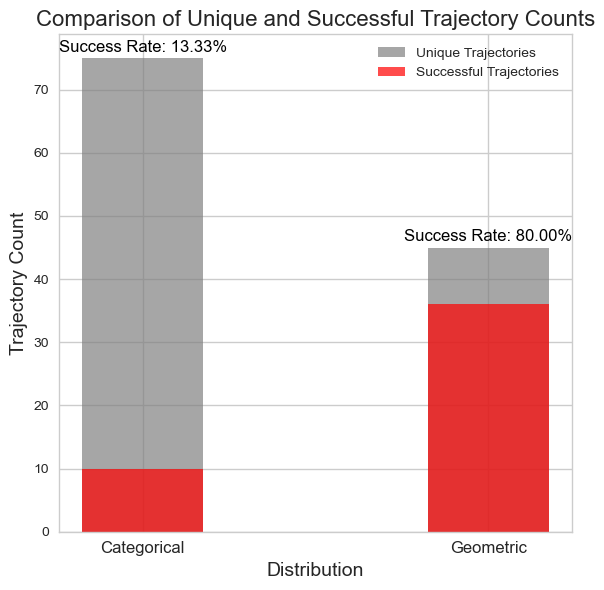

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

# Load JSON data
def load_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['trajectories'], data['rewards']

# Find unique trajectories
def count_unique_trajectories(trajectories):
    unique_trajectories = set(map(str, trajectories))
    return len(unique_trajectories)

# Count successful trajectories
def count_successful_trajectories(trajectories, rewards):
    unique_trajectories = set()
    successful_count = 0

    for traj, reward in zip(trajectories, rewards):
        traj_str = str(traj)
        if traj_str not in unique_trajectories:
            unique_trajectories.add(traj_str)
            if reward > 1.0:  # Assuming reward 1.0 means success
                successful_count += 1
    
    return len(unique_trajectories), successful_count

# Visualize unique counts with additional information
def visualize_unique_counts_with_info(cat_file='categorical_data.json', geo_file='geometric_data.json'):
    # Load data
    cat_trajectories, cat_rewards = load_data(cat_file)
    geo_trajectories, geo_rewards = load_data(geo_file)

    # Count unique and successful trajectories for both distributions
    cat_unique_count, cat_successful_count = count_successful_trajectories(cat_trajectories, cat_rewards)
    geo_unique_count, geo_successful_count = count_successful_trajectories(geo_trajectories, geo_rewards)

    # Prepare data for visualization
    distributions = ['Categorical', 'Geometric']
    unique_counts = [cat_unique_count, geo_unique_count]
    successful_counts = [cat_successful_count, geo_successful_count]

    # Convert to success rate
    success_rate = [successful / unique * 100 for successful, unique in zip(successful_counts, unique_counts)]

    # Plotting the bar chart
    fig, ax = plt.subplots(figsize=(6, 6))
    bar_width = 0.35  # Adjusted bar width to reduce spacing
    index = np.arange(len(distributions))

    # Unique trajectory count bars
    bars1 = ax.bar(index, unique_counts, bar_width, label='Unique Trajectories', color='gray', alpha=0.7)
    
    # Successful trajectory count bars stacked on unique trajectory bars
    bars2 = ax.bar(index, successful_counts, bar_width, label='Successful Trajectories', color='red', alpha=0.7)

    # Add success rate text above bars
    for i in range(len(distributions)):
        ax.text(index[i], unique_counts[i] + 1, f'Success Rate: {success_rate[i]:.2f}%', ha='center', fontsize=12, color='black')

    # Plot settings
    ax.set_xlabel('Distribution', fontsize=14)
    ax.set_ylabel('Trajectory Count', fontsize=14)
    ax.set_title('Comparison of Unique and Successful Trajectory Counts', fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(distributions, fontsize=12)
    ax.legend()
    plt.tight_layout()

    plt.savefig('Unique_trajectories_barchart.pdf', format='pdf', bbox_inches='tight')

    plt.show()

# 실행
visualize_unique_counts_with_info()

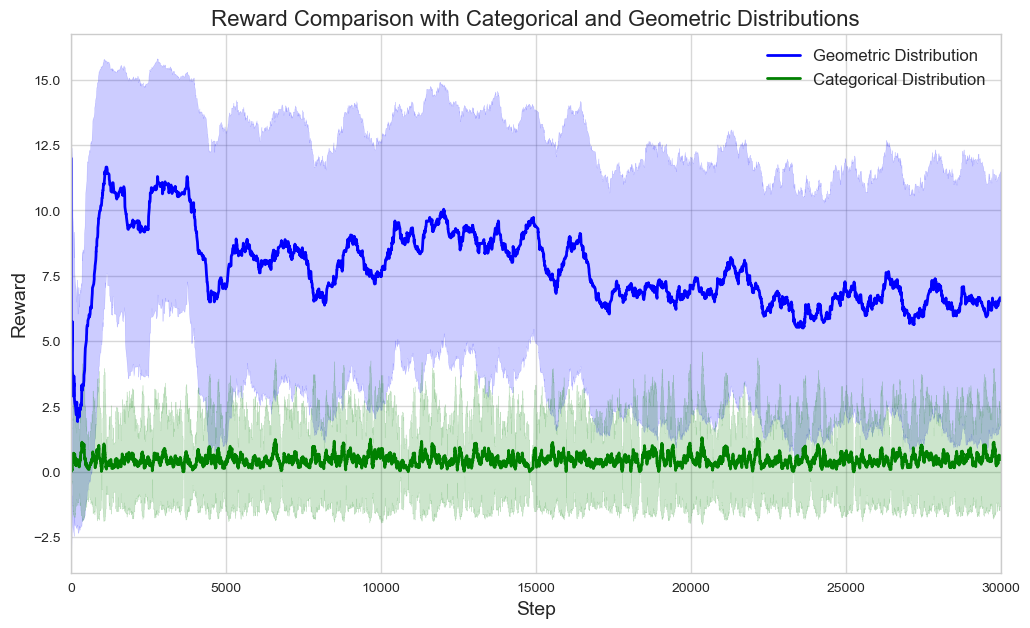

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로 설정
file1_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/cat_reward.csv'  # 첫 번째 파일 경로
file2_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/geometric_reward.csv'  # 두 번째 파일 경로

# CSV 파일 로드
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# 스타일 설정
plt.style.use('seaborn-whitegrid')

# Step 30,000 이하의 데이터만 필터링
df1 = df1[df1["Step"] <= 30000]
df2 = df2[df2["Step"] <= 30000]

# 이동 평균 윈도우 설정 (e.g., 10)
window_size = 80

# 이동 평균 및 표준편차 계산 (초기값 보존)
df1["smoothed_reward"] = df1["local+offpolicy cuda0, ep10, a5, reward, task 178, onpolicy - reward"].rolling(window=window_size, min_periods=1).mean()
df1["smoothed_reward_std"] = df1["local+offpolicy cuda0, ep10, a5, reward, task 178, onpolicy - reward"].rolling(window=window_size, min_periods=1).std()

df2["smoothed_reward"] = df2["(최종 geo, dx))HPC cuda0, ep10, a5, task 178 - reward"].rolling(window=window_size, min_periods=1).mean()
df2["smoothed_reward_std"] = df2["(최종 geo, dx))HPC cuda0, ep10, a5, task 178 - reward"].rolling(window=window_size, min_periods=1).std()

# 결측값 제거
df1.dropna(subset=["smoothed_reward"], inplace=True)
df2.dropna(subset=["smoothed_reward"], inplace=True)

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_facecolor('white')  # 배경색 설정

# 첫 번째 파일 데이터 (스무딩) 플롯 및 분산 영역 표시
ax.plot(df2["Step"], df2["smoothed_reward"], label='Geometric Distribution', linewidth=2, color='blue')
ax.fill_between(
    df2["Step"],
    df2["smoothed_reward"] - df2["smoothed_reward_std"],
    df2["smoothed_reward"] + df2["smoothed_reward_std"],
    color='blue',
    alpha=0.2,
)


ax.plot(df1["Step"], df1["smoothed_reward"], label='Categorical Distribution', linewidth=2, color='green')
ax.fill_between(
    df1["Step"],
    df1["smoothed_reward"] - df1["smoothed_reward_std"],
    df1["smoothed_reward"] + df1["smoothed_reward_std"],
    color='green',
    alpha=0.2,
)

# 두 번째 파일 데이터 (스무딩) 플롯 및 분산 영역 표시

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Reward', fontsize=14)
ax.set_title('Reward Comparison with Categorical and Geometric Distributions', fontsize=16)
ax.legend(fontsize=12)

# 그리드를 희미하게 설정
ax.grid(True, color='gray', alpha=0.3)

# x축과 y축 범위 설정
plt.xlim(left=0, right=30000)

# PDF로 저장
plt.savefig('reward_comparison_with_distribution.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()


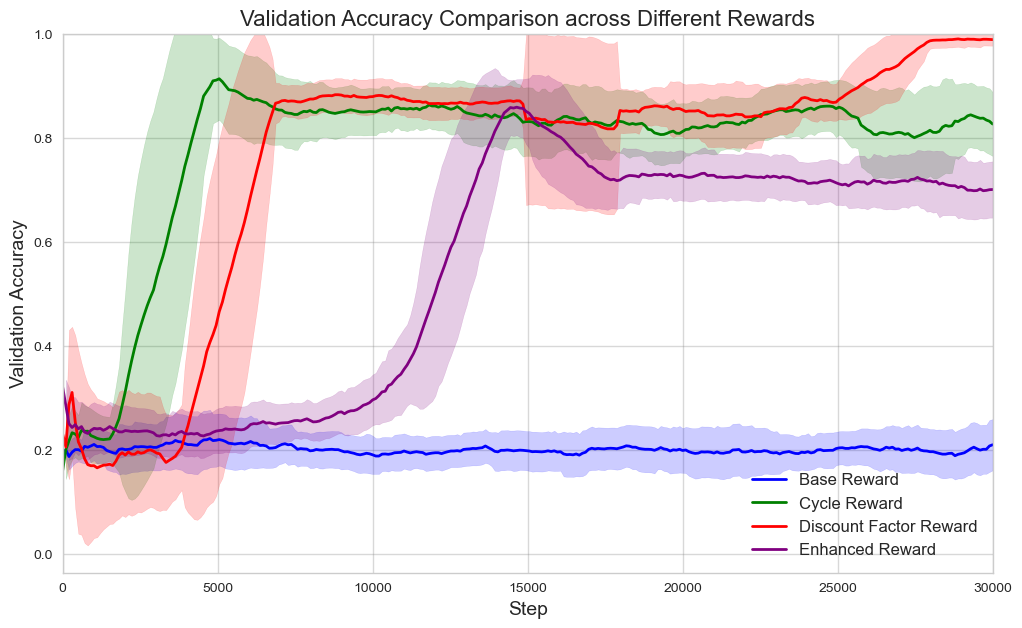

In [146]:
# 파일 경로 설정
file_paths = [
    r'C:/Users/sanha/GFN_to_ARC/gfn/src/5_2_base_reward_valacc.csv',
    r'C:/Users/sanha/GFN_to_ARC/gfn/src/5_2_cycle_reward_valacc.csv',
    r'C:/Users/sanha/GFN_to_ARC/gfn/src/5_2_discountfactor_reward_valacc.csv',
    r'C:/Users/sanha/GFN_to_ARC/gfn/src/5_2_enhanced_reward_valacc.csv'
]

labels = [
    'Base Reward',
    'Cycle Reward',
    'Discount Factor Reward',
    'Enhanced Reward'
]

colors = [
    'blue',
    'green',
    'red',
    'purple'
]

# 스타일 설정
plt.style.use('seaborn-whitegrid')

# 이동 평균 윈도우 설정 (e.g., 10)
window_size = 30

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_facecolor('white')  # 배경색 설정

# 각 파일에 대해 데이터 로드 및 시각화
for file_path, label, color in zip(file_paths, labels, colors):
    # CSV 파일 로드
    df = pd.read_csv(file_path)

    # Step 30,000 이하의 데이터만 필터링
    df = df[df["Step"] <= 30000]

    # 이동 평균 및 표준편차 계산 (초기값 보존)
    val_accuracy_col = [col for col in df.columns if 'val_accuracy' in col and '__' not in col][0]
    df["smoothed_val_accuracy"] = df[val_accuracy_col].rolling(window=window_size, min_periods=1).mean()
    df["smoothed_val_accuracy_std"] = df[val_accuracy_col].rolling(window=window_size, min_periods=1).std()

    df["smoothed_val_accuracy_min"] = df["smoothed_val_accuracy"] - df["smoothed_val_accuracy_std"]
    df["smoothed_val_accuracy_max"] = df["smoothed_val_accuracy"] + df["smoothed_val_accuracy_std"]

    # 스무딩된 데이터 플롯 및 분산 영역 표시
    ax.plot(df["Step"], df["smoothed_val_accuracy"], label=label, linewidth=2, color=color)
    ax.fill_between(
        df["Step"],
        df["smoothed_val_accuracy_min"],
        df["smoothed_val_accuracy_max"],
        color=color,
        alpha=0.2,
    )

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.set_title('Validation Accuracy Comparison across Different Rewards', fontsize=16)
ax.legend(fontsize=12)

# 그리드를 희미하게 설정
ax.grid(True, color='gray', alpha=0.3)

plt.xlim(left=0, right=30000)
plt.ylim(top=1)

# PDF로 저장
plt.savefig('validation_accuracy_comparison_across_rewards.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()


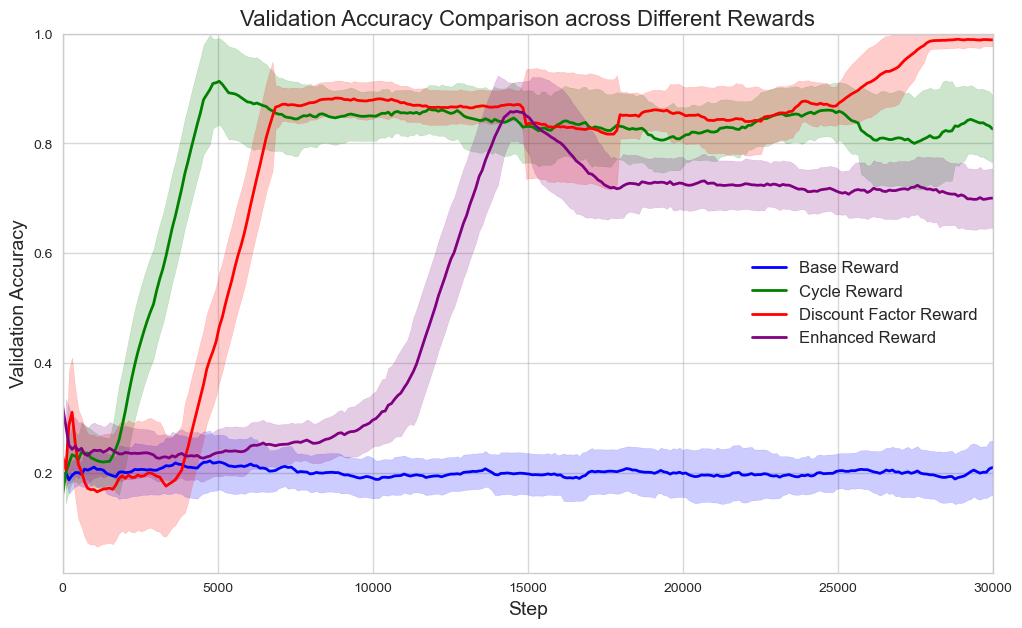

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 파일 경로 설정
file_paths = [
    r'C:/Users/sanha/GFN_to_ARC/gfn/src/5_2_base_reward_valacc.csv',
    r'C:/Users/sanha/GFN_to_ARC/gfn/src/5_2_cycle_reward_valacc.csv',
    r'C:/Users/sanha/GFN_to_ARC/gfn/src/5_2_discountfactor_reward_valacc.csv',
    r'C:/Users/sanha/GFN_to_ARC/gfn/src/5_2_enhanced_reward_valacc.csv'
]

labels = [
    'Base Reward',
    'Cycle Reward',
    'Discount Factor Reward',
    'Enhanced Reward'
]

colors = [
    'blue',
    'green',
    'red',
    'purple'
]

# 스타일 설정
plt.style.use('seaborn-whitegrid')

# 이동 평균 윈도우 설정 (e.g., 30)
window_size = 30

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_facecolor('white')  # 배경색 설정

# 최대 허용 표준편차 (분산이 과도하게 커지는 것을 방지하기 위함)
max_std_dev = 0.1  # 필요에 따라 조정 가능

# 각 파일에 대해 데이터 로드 및 시각화
for file_path, label, color in zip(file_paths, labels, colors):
    # CSV 파일 로드
    df = pd.read_csv(file_path)

    # Step 30,000 이하의 데이터만 필터링
    df = df[df["Step"] <= 30000]

    # 이동 평균 및 표준편차 계산 (초기값 보존)
    val_accuracy_col = [col for col in df.columns if 'val_accuracy' in col and '__' not in col][0]
    df["smoothed_val_accuracy"] = df[val_accuracy_col].rolling(window=window_size, min_periods=1).mean()
    df["smoothed_val_accuracy_std"] = df[val_accuracy_col].rolling(window=window_size, min_periods=1).std()

    # 표준편차를 최대 허용값으로 제한 (과도한 분산 방지)
    df["smoothed_val_accuracy_std"] = df["smoothed_val_accuracy_std"].clip(upper=max_std_dev)

    # 상한 및 하한 계산
    df["smoothed_val_accuracy_min"] = df["smoothed_val_accuracy"] - df["smoothed_val_accuracy_std"]
    df["smoothed_val_accuracy_max"] = df["smoothed_val_accuracy"] + df["smoothed_val_accuracy_std"]

    # 스무딩된 데이터 플롯 및 분산 영역 표시
    ax.plot(df["Step"], df["smoothed_val_accuracy"], label=label, linewidth=2, color=color)
    ax.fill_between(
        df["Step"],
        df["smoothed_val_accuracy_min"],
        df["smoothed_val_accuracy_max"],
        color=color,
        alpha=0.2,
    )

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.set_title('Validation Accuracy Comparison across Different Rewards', fontsize=16)
ax.legend(fontsize=12)

# 그리드를 희미하게 설정
ax.grid(True, color='gray', alpha=0.3)

plt.xlim(left=0, right=30000)
plt.ylim(top=1)

# PDF로 저장
plt.savefig('validation_accuracy_comparison_across_rewards.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()


파일 로드 상태 확인:
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/Baser1.csv에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/Baser2.csv에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/Baser3.csv에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/Cycle1.csv에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/Cycle2.csv에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/Cycle3.csv에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/DF.csv에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/DF2.csv에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/TJR1.csv에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/TJR2.csv에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/TJR3.csv에 'val_accu

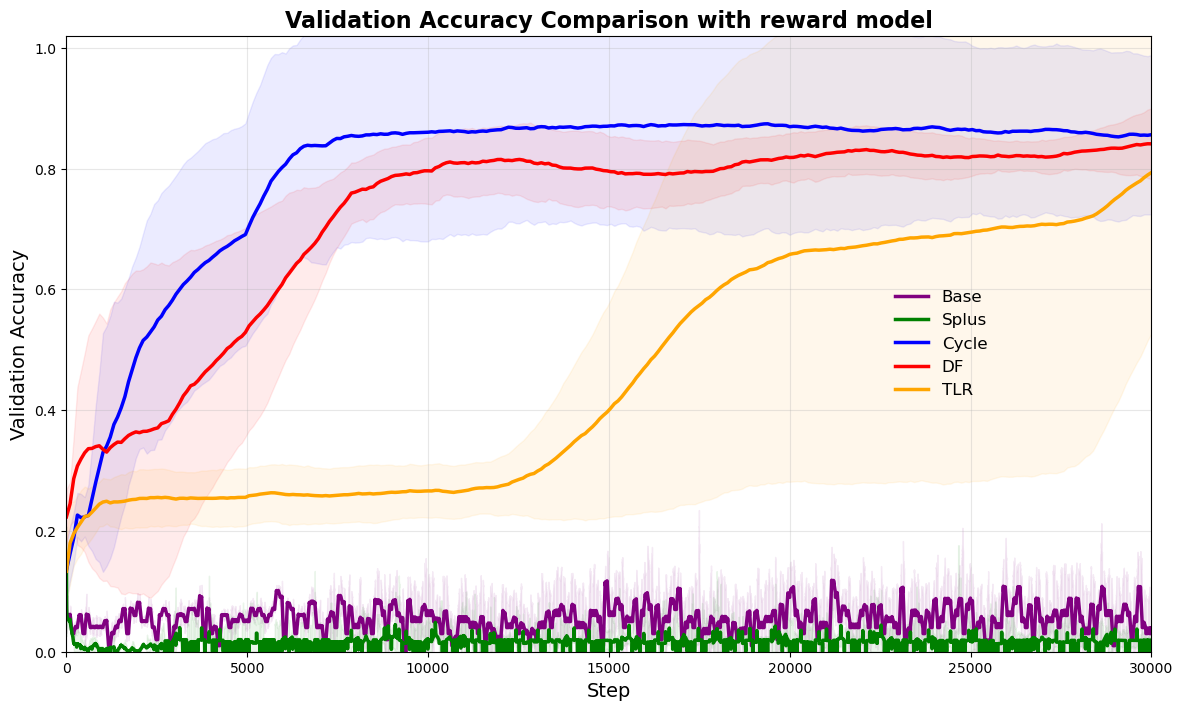

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 파일 경로 설정
base_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/'

# 모든 파일 로드 및 전처리
file_prefixes = ['Base', 'splus', 'Cycle', 'DF', 'TJR']
all_dfs = {key: [] for key in file_prefixes}

# 디버깅: 파일 로드 확인
print("파일 로드 상태 확인:")
for prefix in file_prefixes:
    file_paths = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.startswith(prefix)]
    if not file_paths:
        print(f"[WARN] 접두사 {prefix}에 해당하는 파일이 없습니다.")
        continue

    temp_dfs = []
    for path in file_paths:
        df = pd.read_csv(path)
        val_accuracy_column = [col for col in df.columns if 'val_accuracy' in col.lower()]
        if not val_accuracy_column:
            print(f"[WARN] 파일 {path}에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.")
            continue
        
        # 필요한 데이터만 추출
        df['val_accuracy'] = df[val_accuracy_column[0]]  # 첫 번째 'val_accuracy' 열 사용
        df = df[['Step', 'val_accuracy']]
        temp_dfs.append(df)

    # 접두사별 데이터 병합
    if temp_dfs:
        combined_df = pd.concat(temp_dfs, ignore_index=True)
        all_dfs[prefix].append(combined_df)

# 플롯 그리기
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('white')

# 라벨링 및 색상 설정
colors = ['purple', 'green', 'blue', 'red', 'orange']
labels = ['Base', 'Splus', 'Cycle', 'DF', 'TLR']
window_size = 50

# 각 그룹별 평균 및 신뢰 구간 계산 후 플롯
for i, (label, dfs) in enumerate(zip(labels, [all_dfs['Base'], all_dfs['splus'], all_dfs['Cycle'], all_dfs['DF'], all_dfs['TJR']])):
    if not dfs:  # 데이터가 없는 경우 건너뛰기
        print(f"[INFO] 데이터가 없는 그룹: {label}. 건너뜁니다.")
        continue

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df = combined_df[combined_df["Step"] <= 30000]

    grouped = combined_df.groupby('Step')['val_accuracy']
    mean_val_accuracy = grouped.mean()
    sem_val_accuracy = grouped.sem()  # 표준 오차 계산

    mean_val_accuracy_smooth = mean_val_accuracy.rolling(window=window_size, min_periods=1).mean()
    ci_val_accuracy_smooth = sem_val_accuracy.rolling(window=window_size, min_periods=1).mean() * 1.96  # 95% 신뢰 구간

    # 평균 성능 플롯 및 신뢰 구간 표시
    ax.plot(mean_val_accuracy.index, mean_val_accuracy_smooth, label=label, linewidth=2.5, color=colors[i])
    ax.fill_between(
        mean_val_accuracy.index,
        (mean_val_accuracy_smooth - ci_val_accuracy_smooth).clip(lower=0),
        (mean_val_accuracy_smooth + ci_val_accuracy_smooth).clip(upper=1.05),
        color=colors[i],
        alpha=0.08,  # 투명도 낮춰서 중첩 효과 완화
    )

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.set_title('Validation Accuracy Comparison with reward model', fontsize=16, weight='bold')
ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(0.75, 0.5), frameon=False)
ax.grid(visible=True, alpha=0.3)

plt.xlim(left=0, right=30000)
plt.ylim(bottom=0, top=1.02)

# PDF로 저장
plt.savefig('validation_accuracy_comparison_with_reward.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()

파일 로드 상태 확인:
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/Base_2.csv에 'reward' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/Base_3.csv에 'reward' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/Cycle2v.csv에 'reward' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/DF_1.csv에 'reward' 컬럼이 없습니다. 건너뜁니다.
[WARN] 파일 C:/Users/sanha/GFN_to_ARC/gfn/src/data/DF_2.csv에 'reward' 컬럼이 없습니다. 건너뜁니다.


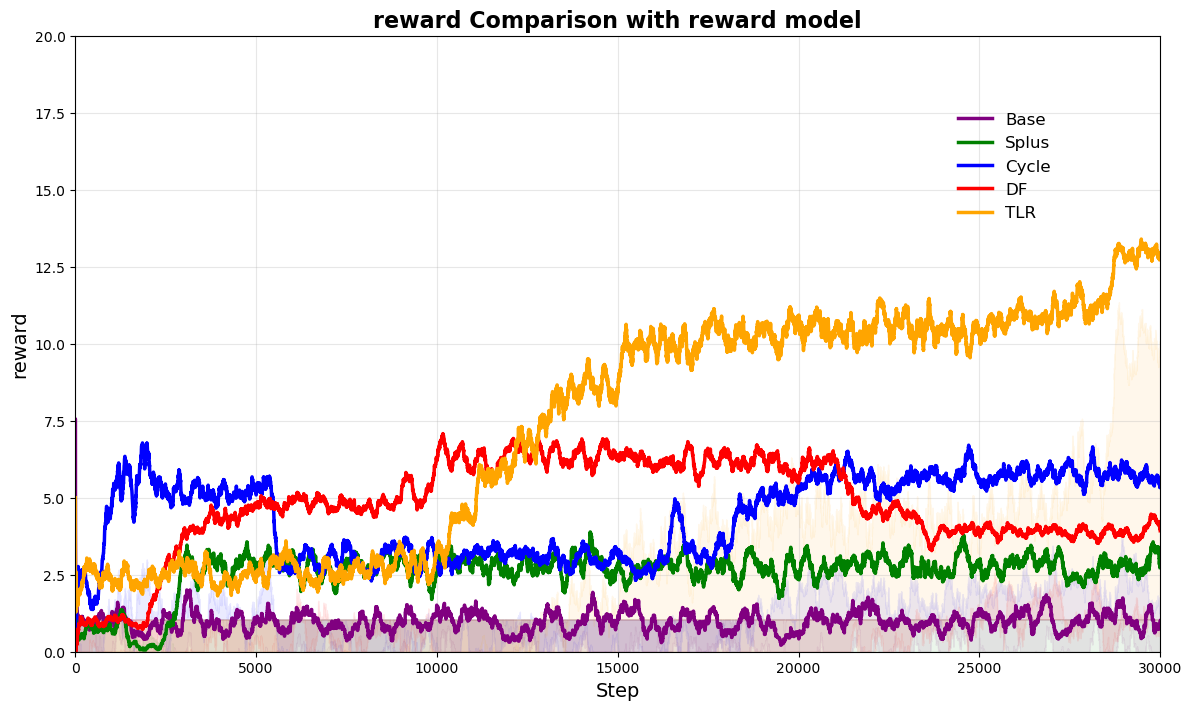

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 파일 경로 설정
base_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/'

# 모든 파일 로드 및 전처리
file_prefixes = ['Base', 'Splus', 'Cycle', 'DF', 'TJR']
all_dfs = {key: [] for key in file_prefixes}

# 디버깅: 파일 로드 확인
print("파일 로드 상태 확인:")
for prefix in file_prefixes:
    file_paths = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.startswith(prefix)]
    if not file_paths:
        print(f"[WARN] 접두사 {prefix}에 해당하는 파일이 없습니다.")
        continue

    temp_dfs = []
    for path in file_paths:
        df = pd.read_csv(path)
        val_accuracy_column = [col for col in df.columns if 'reward' in col.lower()]
        if not val_accuracy_column:
            print(f"[WARN] 파일 {path}에 'reward' 컬럼이 없습니다. 건너뜁니다.")
            continue
        
        # 필요한 데이터만 추출
        df['reward'] = df[val_accuracy_column[0]]  # 첫 번째 'val_accuracy' 열 사용
        df = df[['Step', 'reward']]
        temp_dfs.append(df)

    # 접두사별 데이터 병합
    if temp_dfs:
        combined_df = pd.concat(temp_dfs, ignore_index=True)
        all_dfs[prefix].append(combined_df)

# 플롯 그리기
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('white')

# 라벨링 및 색상 설정
colors = ['purple', 'green', 'blue', 'red', 'orange']
labels = ['Base', 'Splus', 'Cycle', 'DF', 'TLR']
window_size = 150

# 각 그룹별 평균 및 신뢰 구간 계산 후 플롯
for i, (label, dfs) in enumerate(zip(labels, [all_dfs['Base'], all_dfs['Splus'], all_dfs['Cycle'], all_dfs['DF'], all_dfs['TJR']])):
    if not dfs:  # 데이터가 없는 경우 건너뛰기
        print(f"[INFO] 데이터가 없는 그룹: {label}. 건너뜁니다.")
        continue

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df = combined_df[combined_df["Step"] <= 30000]

    grouped = combined_df.groupby('Step')['reward']
    mean_val_accuracy = grouped.mean()
    sem_val_accuracy = grouped.sem()  # 표준 오차 계산

    mean_val_accuracy_smooth = mean_val_accuracy.rolling(window=window_size, min_periods=1).mean()
    ci_val_accuracy_smooth = sem_val_accuracy.rolling(window=window_size, min_periods=1).mean() * 1.96  # 95% 신뢰 구간

    # 평균 성능 플롯 및 신뢰 구간 표시
    ax.plot(mean_val_accuracy.index, mean_val_accuracy_smooth, label=label, linewidth=2.5, color=colors[i])
    ax.fill_between(
        mean_val_accuracy.index,
        (mean_val_accuracy_smooth - ci_val_accuracy_smooth).clip(lower=0),
        (mean_val_accuracy_smooth + ci_val_accuracy_smooth).clip(upper=1.05),
        color=colors[i],
        alpha=0.08,  # 투명도 낮춰서 중첩 효과 완화
    )

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('reward', fontsize=14)
ax.set_title('reward Comparison with reward model', fontsize=16, weight='bold')
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.8, 0.9), frameon=False)
ax.grid(visible=True, alpha=0.3)

plt.xlim(left=0, right=30000)
plt.ylim(bottom=0, top=20)

# PDF로 저장
plt.savefig('reward_comparison_with_reward.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()

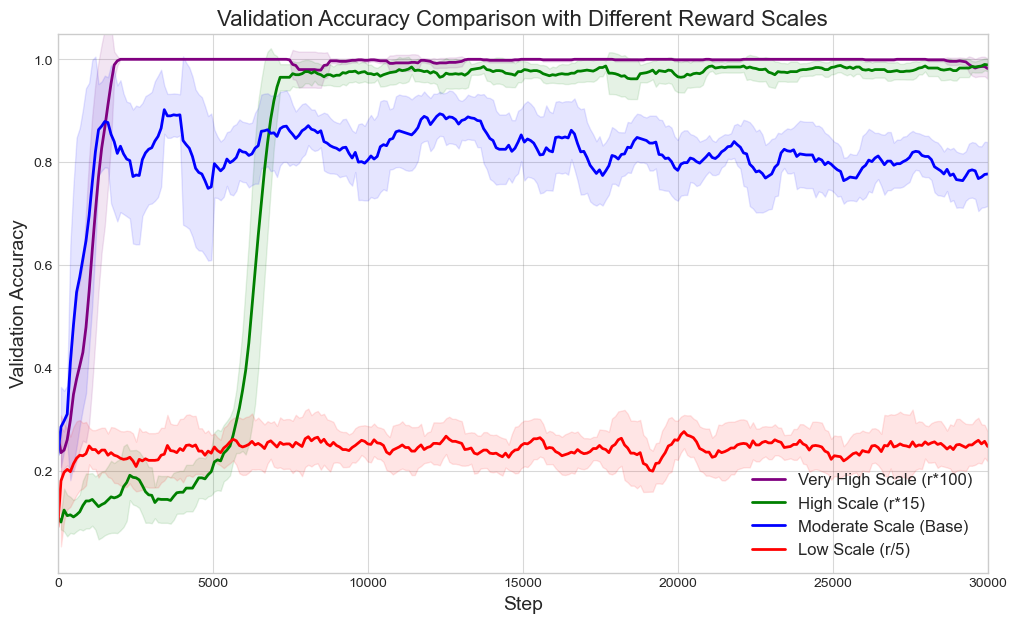

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 기존 파일 경로 설정
file1_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/wandb_export_2024-11-04T15_49_45.498+09_00.csv'

# 새로 추가된 reward scale 데이터 파일 경로 설정
reward_scale_files = [
    r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/4_5_r_5.csv',
    r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/4_5_r15.csv',
    r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/4_5_r100.csv',
]

# CSV 파일 로드
df_base = pd.read_csv(file1_path)
df_r_5 = pd.read_csv(reward_scale_files[0])
df_r_15 = pd.read_csv(reward_scale_files[1])
df_r_100 = pd.read_csv(reward_scale_files[2])

# 스타일 설정
plt.style.use('seaborn-whitegrid')

# Step 30,000 이하의 데이터만 필터링
df_base = df_base[df_base["Step"] <= 30000]
df_r_5 = df_r_5[df_r_5["Step"] <= 30000]
df_r_15 = df_r_15[df_r_15["Step"] <= 30000]
df_r_100 = df_r_100[df_r_100["Step"] <= 30000]

# 'smoothed_val_accuracy' 열이 없는 경우 처리 (이동 평균 계산)
window_size = 10
if 'smoothed_val_accuracy' not in df_base.columns:
    df_base['smoothed_val_accuracy'] = df_base["(최종 geo, dx))HPC cuda0, ep10, a5, task 178 - val_accuracy"].rolling(window=window_size, min_periods=1).mean()
    df_base['smoothed_val_accuracy_min'] = df_base['smoothed_val_accuracy'] - df_base["(최종 geo, dx))HPC cuda0, ep10, a5, task 178 - val_accuracy"].rolling(window=window_size, min_periods=1).std()
    df_base['smoothed_val_accuracy_max'] = df_base['smoothed_val_accuracy'] + df_base["(최종 geo, dx))HPC cuda0, ep10, a5, task 178 - val_accuracy"].rolling(window=window_size, min_periods=1).std()

# Low Scale (r/5) smoothing and std calculation
df_r_5['smoothed_val_accuracy'] = df_r_5["(r/5-틀리면 0)KAKAO_cuda0,ep10,a5,enhanced_reward, task 178, onpolicy - val_accuracy"].rolling(window=window_size, min_periods=1).mean()
df_r_5['smoothed_val_accuracy_min'] = df_r_5['smoothed_val_accuracy'] - df_r_5["(r/5-틀리면 0)KAKAO_cuda0,ep10,a5,enhanced_reward, task 178, onpolicy - val_accuracy"].rolling(window=window_size, min_periods=1).std()
df_r_5['smoothed_val_accuracy_max'] = df_r_5['smoothed_val_accuracy'] + df_r_5["(r/5-틀리면 0)KAKAO_cuda0,ep10,a5,enhanced_reward, task 178, onpolicy - val_accuracy"].rolling(window=window_size, min_periods=1).std()

# High Scale (r*15) smoothing and std calculation
df_r_15['smoothed_val_accuracy'] = df_r_15["(r*15-틀리면 0)NHN_cuda1,ep10,a5,enhanced_reward, task 178, onpolicy - val_accuracy"].rolling(window=window_size, min_periods=1).mean()
df_r_15['smoothed_val_accuracy_min'] = df_r_15['smoothed_val_accuracy'] - df_r_15["(r*15-틀리면 0)NHN_cuda1,ep10,a5,enhanced_reward, task 178, onpolicy - val_accuracy"].rolling(window=window_size, min_periods=1).std()
df_r_15['smoothed_val_accuracy_max'] = df_r_15['smoothed_val_accuracy'] + df_r_15["(r*15-틀리면 0)NHN_cuda1,ep10,a5,enhanced_reward, task 178, onpolicy - val_accuracy"].rolling(window=window_size, min_periods=1).std()

# Very High Scale (r*100) smoothing and std calculation
df_r_100['smoothed_val_accuracy'] = df_r_100["(r*100-틀리면0)HPC cuda0, ep10, a5, task 178 - val_accuracy"].rolling(window=window_size, min_periods=1).mean()
df_r_100['smoothed_val_accuracy_min'] = df_r_100['smoothed_val_accuracy'] - df_r_100["(r*100-틀리면0)HPC cuda0, ep10, a5, task 178 - val_accuracy"].rolling(window=window_size, min_periods=1).std()
df_r_100['smoothed_val_accuracy_max'] = df_r_100['smoothed_val_accuracy'] + df_r_100["(r*100-틀리면0)HPC cuda0, ep10, a5, task 178 - val_accuracy"].rolling(window=window_size, min_periods=1).std()

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_facecolor('white')  # 배경색 설정

# Very High Scale (r*100) 플롯 및 분산 영역 표시
ax.plot(df_r_100["Step"], df_r_100['smoothed_val_accuracy'], label='Very High Scale (r*100)', linewidth=2, color='purple')
ax.fill_between(
    df_r_100["Step"],
    df_r_100['smoothed_val_accuracy_min'],
    df_r_100['smoothed_val_accuracy_max'],
    color='purple',
    alpha=0.1,
)

# High Scale (r*15) 플롯 및 분산 영역 표시
ax.plot(df_r_15["Step"], df_r_15['smoothed_val_accuracy'], label='High Scale (r*15)', linewidth=2, color='green')
ax.fill_between(
    df_r_15["Step"],
    df_r_15['smoothed_val_accuracy_min'],
    df_r_15['smoothed_val_accuracy_max'],
    color='green',
    alpha=0.1,
)

# Base reward (Geometric Distribution) 플롯 및 분산 영역 표시
ax.plot(df_base["Step"], df_base['smoothed_val_accuracy'], label='Moderate Scale (Base)', linewidth=2, color='blue')
ax.fill_between(
    df_base["Step"],
    df_base['smoothed_val_accuracy_min'],
    df_base['smoothed_val_accuracy_max'],
    color='blue',
    alpha=0.1,
)

# Low Scale (r/5) 플롯 및 분산 영역 표시
ax.plot(df_r_5["Step"], df_r_5['smoothed_val_accuracy'], label='Low Scale (r/5)', linewidth=2, color='red')
ax.fill_between(
    df_r_5["Step"],
    df_r_5['smoothed_val_accuracy_min'],
    df_r_5['smoothed_val_accuracy_max'],
    color='red',
    alpha=0.1,
)

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.set_title('Validation Accuracy Comparison with Different Reward Scales', fontsize=16)
ax.legend(fontsize=12)

# 그리드를 희미하게 설정
ax.grid(True, color='gray', alpha=0.3)

plt.xlim(left=0, right=30000)
plt.ylim(top=1.05)

# PDF로 저장
plt.savefig('validation_accuracy_comparison_with_reward_scales.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()


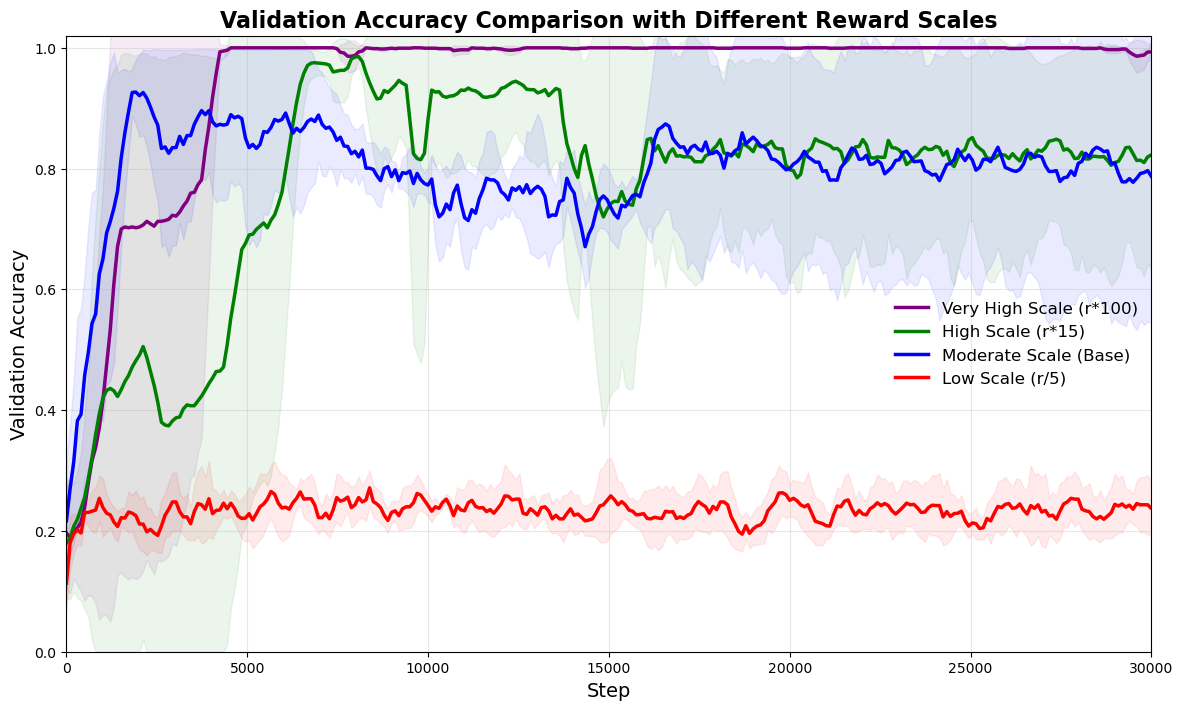

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 파일 경로 설정
base_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/'

# 모든 파일 로드 및 전처리
file_prefixes = ['r_2', 'r_3', 'r_4', 'r_5_1', 'r_5_2', 'r_5_3', 'r_15_1', 'r_15_2', 'r_15_3', 'r_100_1', 'r_100_2', 'r_100_3']
all_dfs = {
    'r_5': [],
    'r': [],
    'r_15': [],
    'r_100': []
}

for prefix in file_prefixes:
    file_paths = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.startswith(prefix)]
    temp_dfs = []
    
    for path in file_paths:
        df = pd.read_csv(path)
        val_accuracy_column = [col for col in df.columns if 'val_accuracy' in col.lower()]
        if val_accuracy_column:
            df['val_accuracy'] = df[val_accuracy_column[0]]
            df = df[['Step', 'val_accuracy']]
            temp_dfs.append(df)
    
    if temp_dfs:
        combined_df = pd.concat(temp_dfs)
        if 'r_5' in prefix:
            all_dfs['r_5'].append(combined_df)
        elif 'r_15' in prefix:
            all_dfs['r_15'].append(combined_df)
        elif 'r_100' in prefix:
            all_dfs['r_100'].append(combined_df)
        else:
            all_dfs['r'].append(combined_df)

# 스타일 설정
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('white')

# 라벨링 및 색상 설정
colors = ['purple', 'green', 'blue', 'red']
labels = ['Very High Scale (r*100)', 'High Scale (r*15)', 'Moderate Scale (Base)', 'Low Scale (r/5)']
window_size = 5

# 각 그룹별 평균 및 신뢰 구간 계산 후 플롯
for i, (label, dfs) in enumerate(zip(labels, [all_dfs['r_100'], all_dfs['r_15'], all_dfs['r'], all_dfs['r_5']])):
    combined_df = pd.concat(dfs)
    combined_df = combined_df[combined_df["Step"] <= 30000]
    
    grouped = combined_df.groupby('Step')['val_accuracy']
    mean_val_accuracy = grouped.mean()
    sem_val_accuracy = grouped.sem()  # 표준 오차 계산
    
    mean_val_accuracy_smooth = mean_val_accuracy.rolling(window=window_size, min_periods=1).mean()
    ci_val_accuracy_smooth = sem_val_accuracy.rolling(window=window_size, min_periods=1).mean() * 1.96  # 95% 신뢰 구간

    # 평균 성능 플롯 및 신뢰 구간 표시
    ax.plot(mean_val_accuracy.index, mean_val_accuracy_smooth, label=label, linewidth=2.5, color=colors[i])
    ax.fill_between(
        mean_val_accuracy.index,
        (mean_val_accuracy_smooth - ci_val_accuracy_smooth).clip(lower=0),
        (mean_val_accuracy_smooth + ci_val_accuracy_smooth).clip(upper=1.05),
        color=colors[i],
        alpha=0.08,  # 투명도 낮춰서 중첩 효과 완화
    )

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.set_title('Validation Accuracy Comparison with Different Reward Scales', fontsize=16, weight='bold')

# 범례를 그래프 왼쪽 상단 또는 중앙 오른쪽에 배치
ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(0.75, 0.5), frameon=False)
# 또는
# ax.legend(fontsize=12, loc='center right', frameon=False)  # 중앙 오른쪽에 배치

# 눈금과 그리드 설정
ax.grid(visible=True, alpha=0.3)

plt.xlim(left=0, right=30000)
plt.ylim(bottom=0, top=1.02)

# PDF로 저장
plt.savefig('validation_accuracy_comparison_with_reward_scales_alpha_adjusted.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()


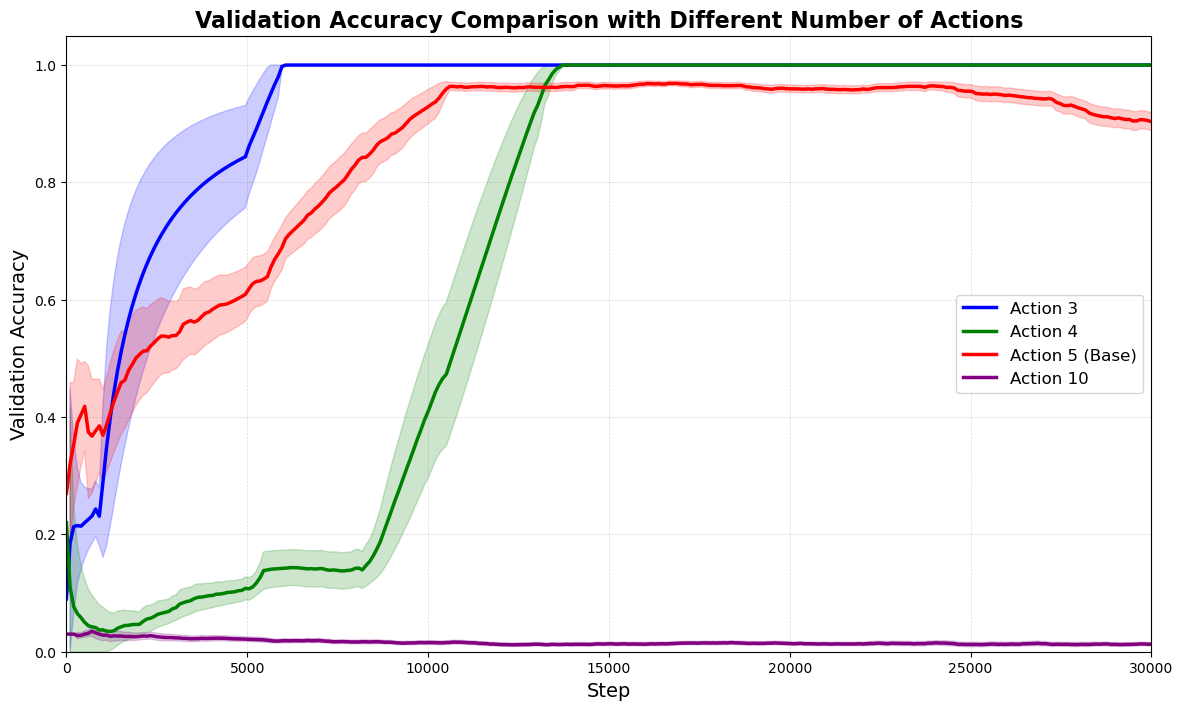

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로 설정
base_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/'

# 파일 이름 및 컬럼 매핑
file_info = {
    'a3.csv': {
        'filename': 'a3.csv',
        'accuracy_col': '(a3)NHN_cuda0,ep10,a3,enhanced_reward, task 178, onpolicy - val_accuracy'
    },
    'a4.csv': {
        'filename': 'a4.csv',
        'accuracy_col': '(a4)HPC_cuda1,a4_10,4_totalr_task_178_task178 - val_accuracy'
    },
    'a5.csv': {
        'filename': 'a5.csv',
        'accuracy_col': '(r*15)HPC cuda1, ep10, a5, task 178 - val_accuracy'
    },
    'a10.csv': {
        'filename': 'a10.csv',
        'accuracy_col': '(a10)NHN_cuda1,ep10,a10,enhanced_reward, task 178, onpolicy - val_accuracy'
    }
}

# 스타일 설정
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('white')

# 컬러 및 라벨 설정
colors = ['blue', 'green', 'red', 'purple']
labels = ['Action 3', 'Action 4', 'Action 5 (Base)', 'Action 10']
window_size = 50

# 각 파일에 대해 데이터 로드 및 시각화
for i, (file_key, file_details) in enumerate(file_info.items()):
    # 파일 로드
    file_path = f"{base_path}{file_details['filename']}"
    df = pd.read_csv(file_path)
    
    # 필요한 컬럼 추출
    step_col = 'Step'
    val_accuracy_col = file_details['accuracy_col']
    df = df[[step_col, val_accuracy_col]]
    df.columns = ['Step', 'val_accuracy']  # 컬럼 이름 통일
    
    # 스무딩 (이동 평균)
    df['val_accuracy_smooth'] = df['val_accuracy'].rolling(window=window_size, min_periods=1).mean()
    
    # 신뢰 구간 계산 (표준 오차에 기반한 95% 신뢰 구간)
    df['sem'] = df['val_accuracy'].rolling(window=window_size, min_periods=1).sem()  # 표준 오차
    df['ci95'] = df['sem'] * 1.96  # 95% 신뢰 구간

    # 그래프 그리기
    ax.plot(df['Step'], df['val_accuracy_smooth'], label=labels[i], color=colors[i], linewidth=2.5)
    ax.fill_between(df['Step'], 
                    (df['val_accuracy_smooth'] - df['ci95']).clip(lower=0), 
                    (df['val_accuracy_smooth'] + df['ci95']).clip(upper=1), 
                    color=colors[i], 
                    alpha=0.2)  # 신뢰 구간 영역

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.set_title('Validation Accuracy Comparison with Different Number of Actions', fontsize=16, weight='bold')
ax.legend(fontsize=12, loc='center right')  # 중앙 오른쪽에 범례 배치

# 눈금과 그리드 설정
ax.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.xlim(left=0, right=30000)
plt.ylim(bottom=0, top=1.05)

# PDF로 저장
plt.savefig('validation_accuracy_comparison_with_action_counts_ci.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()


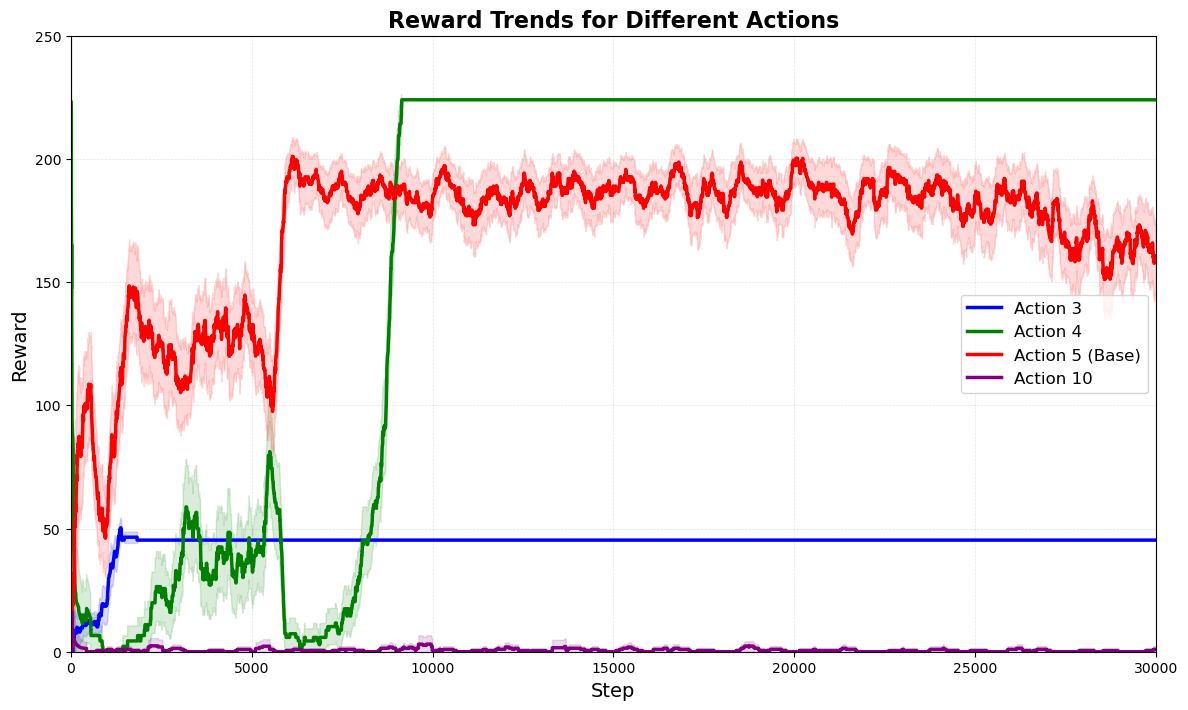

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로 설정
base_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/'

# 파일 이름 및 Reward 컬럼 매핑
reward_files = {
    'a3_r.csv': {
        'filename': 'a3_r.csv',
        'reward_col': '(a3)NHN_cuda0,ep10,a3,enhanced_reward, task 178, onpolicy - reward'
    },
    'a4_r.csv': {
        'filename': 'a4_r.csv',
        'reward_col': '(a4)HPC_cuda1,a4_10,4_totalr_task_178_task178 - reward'
    },
    'a5_r.csv': {
        'filename': 'a5_r.csv',
        'reward_col': '(r*15)HPC cuda1, ep10, a5, task 178 - reward'
    },
    'a10_r.csv': {
        'filename': 'a10_r.csv',
        'reward_col': '(a10)NHN_cuda1,ep10,a10,enhanced_reward, task 178, onpolicy - reward'
    }
}

# 컬러 및 라벨 설정
colors = ['blue', 'green', 'red', 'purple']
labels = ['Action 3', 'Action 4', 'Action 5 (Base)', 'Action 10']
window_size = 100  # 스무딩 윈도우 크기를 줄여서 신뢰 구간이 너무 넓어지는 것을 방지

# 스타일 설정
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('white')

# 각 파일에 대해 데이터 로드 및 시각화
for i, (file_key, file_details) in enumerate(reward_files.items()):
    # 파일 로드
    file_path = f"{base_path}{file_details['filename']}"
    df = pd.read_csv(file_path)
    
    # 필요한 컬럼 추출 및 스텝 제한
    step_col = 'Step'
    reward_col = file_details['reward_col']
    df = df[[step_col, reward_col]]
    df.columns = ['Step', 'Reward']  # 컬럼 이름 통일
    df = df[df['Step'] <= 30000]  # Step 30000 제한
    
    # 스무딩 (이동 평균)
    df['Reward_smooth'] = df['Reward'].rolling(window=window_size, min_periods=1).mean()
    
    # 신뢰 구간 계산 (표준 오차에 기반한 95% 신뢰 구간)
    df['sem'] = df['Reward'].rolling(window=window_size, min_periods=1).sem()  # 표준 오차
    df['ci95'] = df['sem'] * 1.96  # 95% 신뢰 구간

    # 꺾은 선 그래프 및 신뢰 구간 영역 그리기
    ax.plot(df['Step'], df['Reward_smooth'], label=labels[i], color=colors[i], linewidth=2.5)
    ax.fill_between(df['Step'], 
                    df['Reward_smooth'] - df['ci95'], 
                    df['Reward_smooth'] + df['ci95'], 
                    color=colors[i], 
                    alpha=0.15)  # 신뢰 구간 영역

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Reward', fontsize=14)
ax.set_title('Reward Trends for Different Actions', fontsize=16, weight='bold')
ax.legend(fontsize=12, loc='center right')  # 중앙 오른쪽에 범례 배치

# 눈금과 그리드 설정
ax.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

plt.xlim(left=0, right=30000)
plt.ylim(bottom=0,top=250)  # y축 최소값을 0으로 고정

# PDF로 저장
plt.savefig('reward_trends_with_adjusted_confidence_intervals.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()

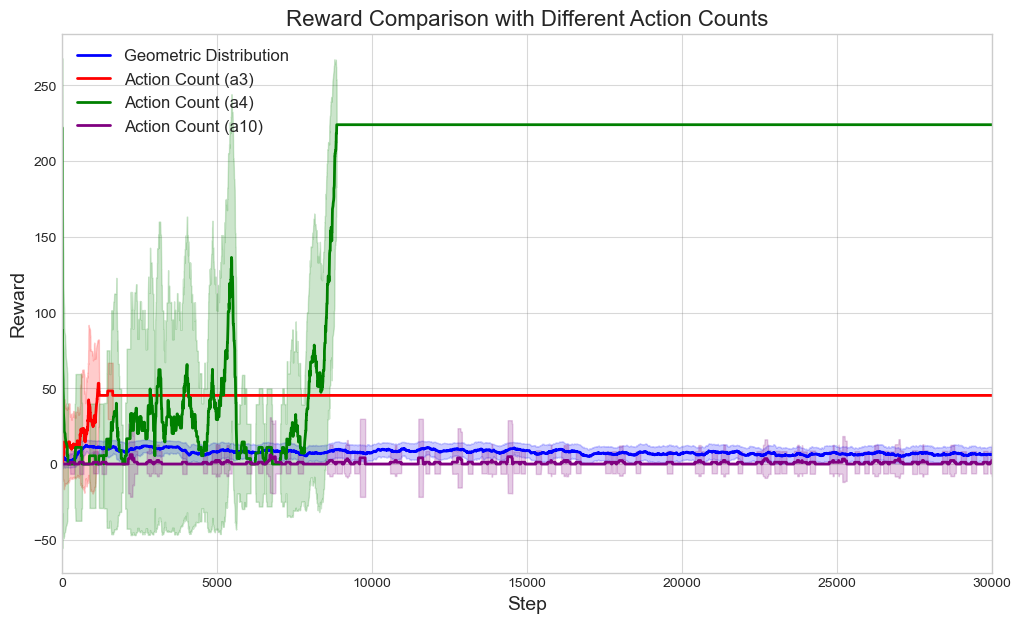

Reward Distribution Diversity (D_reward) for Geometric: 5.432322525197295
Reward Distribution Diversity (D_reward) for Action Count (a3): 0.39152767898224666
Reward Distribution Diversity (D_reward) for Action Count (a4): 2.077330826721159
Reward Distribution Diversity (D_reward) for Action Count (a10): 1.7632632195163338


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

# 파일 경로 설정
geometric_reward_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/geometric_reward.csv'  # Geometric reward
reward_a3_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/4_6_a3_r.csv'  # Reward for action count (a3)
reward_a4_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/4_6_a4_r.csv'  # Reward for action count (a4)
reward_a10_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/4_6_a10_r.csv'  # Reward for action count (a10)

# CSV 파일 로드
df_geo = pd.read_csv(geometric_reward_path)
df_a3 = pd.read_csv(reward_a3_path)
df_a4 = pd.read_csv(reward_a4_path)
df_a10 = pd.read_csv(reward_a10_path)

# 스타일 설정
plt.style.use('seaborn-whitegrid')

# Step 30,000 이하의 데이터만 필터링
df_geo = df_geo[df_geo["Step"] <= 30000]
df_a3 = df_a3[df_a3["Step"] <= 30000]
df_a4 = df_a4[df_a4["Step"] <= 30000]
df_a10 = df_a10[df_a10["Step"] <= 30000]

# 이동 평균 윈도우 설정
window_size = 40

# 이동 평균 및 표준편차 계산 (초기값 보존)
df_geo["smoothed_reward"] = df_geo["(최종 geo, dx))HPC cuda0, ep10, a5, task 178 - reward"].rolling(window=window_size, min_periods=1).mean()
df_geo["smoothed_reward_std"] = df_geo["(최종 geo, dx))HPC cuda0, ep10, a5, task 178 - reward"].rolling(window=window_size, min_periods=1).std()

df_a3["smoothed_reward"] = df_a3["(a3)NHN_cuda0,ep10,a3,enhanced_reward, task 178, onpolicy - reward"].rolling(window=window_size, min_periods=1).mean()
df_a3["smoothed_reward_std"] = df_a3["(a3)NHN_cuda0,ep10,a3,enhanced_reward, task 178, onpolicy - reward"].rolling(window=window_size, min_periods=1).std()

df_a4["smoothed_reward"] = df_a4["(a4)HPC_cuda1,a4_10,4_totalr_task_178_task178 - reward"].rolling(window=window_size, min_periods=1).mean()
df_a4["smoothed_reward_std"] = df_a4["(a4)HPC_cuda1,a4_10,4_totalr_task_178_task178 - reward"].rolling(window=window_size, min_periods=1).std()

df_a10["smoothed_reward"] = df_a10["(a10)NHN_cuda1,ep10,a10,enhanced_reward, task 178, onpolicy - reward"].rolling(window=window_size, min_periods=1).mean()
df_a10["smoothed_reward_std"] = df_a10["(a10)NHN_cuda1,ep10,a10,enhanced_reward, task 178, onpolicy - reward"].rolling(window=window_size, min_periods=1).std()

# 결측값 제거
df_geo.dropna(subset=["smoothed_reward"], inplace=True)
df_a3.dropna(subset=["smoothed_reward"], inplace=True)
df_a4.dropna(subset=["smoothed_reward"], inplace=True)
df_a10.dropna(subset=["smoothed_reward"], inplace=True)

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_facecolor('white')  # 배경색 설정

# Geometric reward 플롯 및 분산 영역 표시
ax.plot(df_geo["Step"], df_geo["smoothed_reward"], label='Geometric Distribution', linewidth=2, color='blue')
ax.fill_between(
    df_geo["Step"],
    df_geo["smoothed_reward"] - df_geo["smoothed_reward_std"],
    df_geo["smoothed_reward"] + df_geo["smoothed_reward_std"],
    color='blue',
    alpha=0.2,
)

# Action count (a3) 플롯 및 분산 영역 표시
ax.plot(df_a3["Step"], df_a3["smoothed_reward"], label='Action Count (a3)', linewidth=2, color='red')
ax.fill_between(
    df_a3["Step"],
    df_a3["smoothed_reward"] - df_a3["smoothed_reward_std"],
    df_a3["smoothed_reward"] + df_a3["smoothed_reward_std"],
    color='red',
    alpha=0.2,
)

# Action count (a4) 플롯 및 분산 영역 표시
ax.plot(df_a4["Step"], df_a4["smoothed_reward"], label='Action Count (a4)', linewidth=2, color='green')
ax.fill_between(
    df_a4["Step"],
    df_a4["smoothed_reward"] - df_a4["smoothed_reward_std"],
    df_a4["smoothed_reward"] + df_a4["smoothed_reward_std"],
    color='green',
    alpha=0.2,
)

# Action count (a10) 플롯 및 분산 영역 표시
ax.plot(df_a10["Step"], df_a10["smoothed_reward"], label='Action Count (a10)', linewidth=2, color='purple')
ax.fill_between(
    df_a10["Step"],
    df_a10["smoothed_reward"] - df_a10["smoothed_reward_std"],
    df_a10["smoothed_reward"] + df_a10["smoothed_reward_std"],
    color='purple',
    alpha=0.2,
)

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Reward', fontsize=14)
ax.set_title('Reward Comparison with Different Action Counts', fontsize=16)
ax.legend(fontsize=12)

# 그리드를 희미하게 설정
ax.grid(True, color='gray', alpha=0.3)

# x축과 y축 범위 설정
plt.xlim(left=0, right=30000)

# PDF로 저장
plt.savefig('reward_comparison_with_action_counts.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()

# 각 CSV 파일에서 보상 목록 추출 및 엔트로피 계산
for df, label in zip([df_geo, df_a3, df_a4, df_a10], ['Geometric', 'Action Count (a3)', 'Action Count (a4)', 'Action Count (a10)']):
    rewards = df["smoothed_reward"].dropna().values  # 보상 목록 추출
    reward_values, counts = np.unique(rewards, return_counts=True)
    reward_probabilities = counts / len(rewards)
    D_reward = entropy(reward_probabilities)
    print(f'Reward Distribution Diversity (D_reward) for {label}: {D_reward}')

In [19]:
import json
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
import numpy as np

# Load JSON data
def load_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['trajectories'], data['rewards']

# Find unique trajectories and count successful ones
def find_unique_trajectories(trajectories, rewards):
    unique_trajectory_set = set(map(str, trajectories))
    unique_trajectories = []
    successful_trajectories = 0

    for unique_traj in unique_trajectory_set:
        for traj, reward in zip(trajectories, rewards):
            if str(traj) == unique_traj:
                unique_trajectories.append({'trajectory': traj, 'reward': reward})
                if reward > 1.0:  # Define successful trajectory
                    successful_trajectories += 1
                break
    return len(unique_trajectories), successful_trajectories

# Calculate summary and statistical tests for each file
def generate_summary_and_test(files):
    all_data = []
    for file in files:
        # Load data
        trajectories, rewards = load_data(file)
        
        # Calculate unique and total success rates
        unique_count, successful_count = find_unique_trajectories(trajectories, rewards)
        success_rate_unique = successful_count / unique_count
        total_count = len(trajectories)
        success_rate_total = sum(1 for reward in rewards if reward > 1.0) / total_count

        # Append results
        all_data.append({
            'File': file,
            'Unique Trajectories': unique_count,
            'Successful Unique Trajectories': successful_count,
            'Success Rate (Unique, %)': success_rate_unique * 100,
            'Total Trajectories': total_count,
            'Successful Total Trajectories': sum(1 for reward in rewards if reward > 1.0),
            'Success Rate (Total, %)': success_rate_total * 100
        })

    # Create a DataFrame for comparison
    df = pd.DataFrame(all_data)
    print(df)

    # Perform chi-squared and Fisher's exact tests if there are exactly two datasets
    if len(files) == 2:
        contingency_table = [
            [all_data[0]['Successful Unique Trajectories'], all_data[0]['Unique Trajectories'] - all_data[0]['Successful Unique Trajectories']],
            [all_data[1]['Successful Unique Trajectories'], all_data[1]['Unique Trajectories'] - all_data[1]['Successful Unique Trajectories']]
        ]
        chi2, chi2_p_value, _, _ = chi2_contingency(contingency_table)
        print(f"\nChi-squared test:\nChi2 Statistic: {chi2}, p-value: {chi2_p_value}")

        # Fisher's exact test
        _, fisher_p_value = fisher_exact(contingency_table)
        print(f"Fisher's exact test p-value: {fisher_p_value}")

        # Calculate Cramér's V
        cramers_v = calculate_cramers_v(np.array(contingency_table))
        print(f"Cramér's V: {cramers_v}")

        # Interpret results
        significance_level = 0.05
        if chi2_p_value < significance_level:
            print("Chi-squared test: The success rate difference between datasets is statistically significant.")
        else:
            print("Chi-squared test: No statistically significant difference in success rate between datasets.")
        
        if fisher_p_value < significance_level:
            print("Fisher's exact test: The success rate difference between datasets is statistically significant.")
        else:
            print("Fisher's exact test: No statistically significant difference in success rate between datasets.")

        return df, chi2, chi2_p_value, fisher_p_value, cramers_v
    else:
        return df

# Calculate Cramér's V
def calculate_cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = np.sum(contingency_table)
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# # Analyze multiple files
# files_to_analyze = [
#     'eval_samples_a4_10,4_totalr_task_178_step_30000.json',
#     'eval_samples_a3geometric_10,5_taskg_rscale10_178_step_30000.json',
#     'eval_samples_a10geometric_10,5_taskg_rscale10_178_step_30000.json',
#     'eval_samples_r15_10,5 task 178_step_30000.json'
# ]
# summary_table = generate_summary_and_test(files_to_analyze)


In [21]:
files = ['gflownet_trajectories2.json']
summary_table = generate_summary_and_test(files)

TypeError: list indices must be integers or slices, not str

In [ ]:
import json
import numpy as np
from scipy.stats import entropy

# JSON 파일로부터 데이터 로드 함수
def load_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['trajectories'], data['rewards']

# Reward 다양성 (엔트로피) 계산 함수
def calculate_reward_diversity(rewards):
    # Reward 값들의 빈도수 계산
    reward_values, counts = np.unique(rewards, return_counts=True)
    reward_probabilities = counts / len(rewards)  # 확률 분포 계산
    # 엔트로피 계산 (다양성 측정)
    diversity = entropy(reward_probabilities)
    return diversity

# 각 파일에 대해 리워드 다양성을 계산하는 함수
def analyze_reward_diversity(files):
    for file in files:
        # JSON 파일에서 데이터 로드
        _, rewards = load_data(file)
        
        # Reward 다양성 계산
        diversity = calculate_reward_diversity(rewards)
        
        # 결과 출력
        print(f'Reward Distribution Diversity (D_reward) for {file}: {diversity}')

# 분석할 JSON 파일 리스트
files_to_analyze = [
    'eval_samples_a4_10,4_totalr_task_178_step_30000.json',
    'eval_samples_a3geometric_10,5_taskg_rscale10_178_step_30000.json',
    'eval_samples_a10geometric_10,5_taskg_rscale10_178_step_30000.json',
    'eval_samples_r15_10,5 task 178_step_30000.json'
]

# 리워드 다양성 분석 실행
analyze_reward_diversity(files_to_analyze)

Reward Distribution Diversity (D_reward) for eval_samples_a4_10,4_totalr_task_178_step_30000.json: 0.0
Reward Distribution Diversity (D_reward) for eval_samples_a3geometric_10,5_taskg_rscale10_178_step_30000.json: 0.0
Reward Distribution Diversity (D_reward) for eval_samples_a10geometric_10,5_taskg_rscale10_178_step_30000.json: 0.44392849359209996
Reward Distribution Diversity (D_reward) for eval_samples_r15_10,5 task 178_step_30000.json: 0.6738975457071511


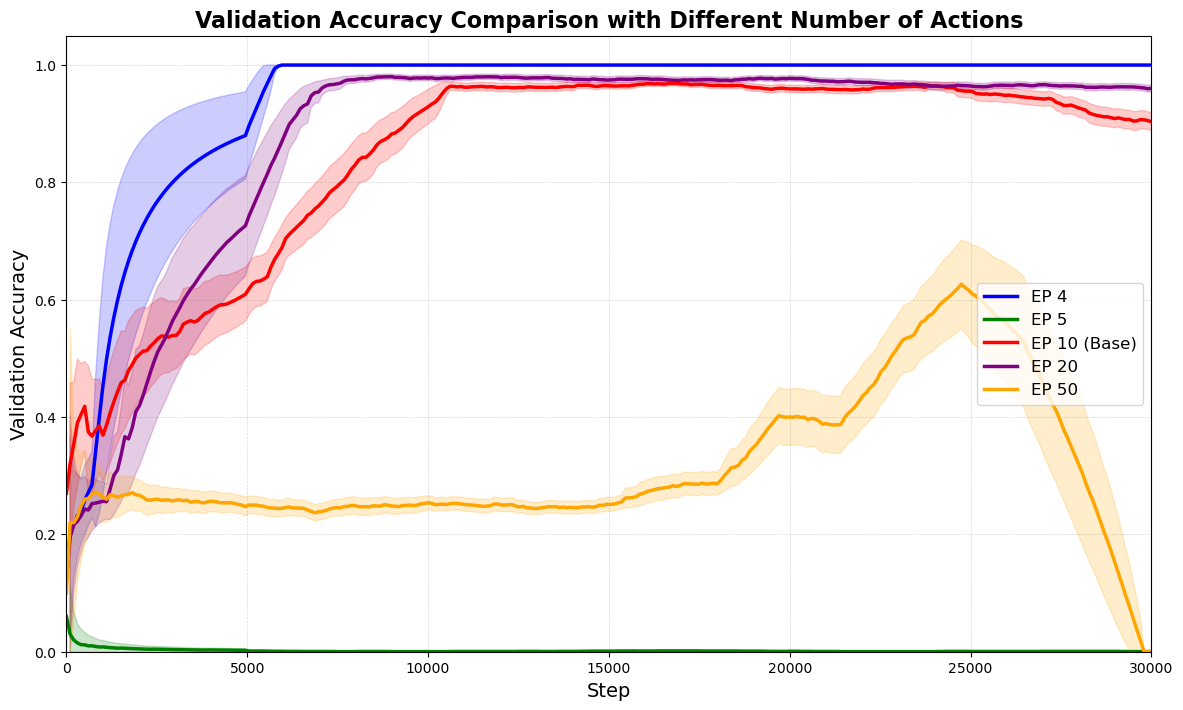

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로 설정
base_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/'

# 파일 이름 및 컬럼 매핑
file_info = {
    'e4.csv': {
        'filename': 'e4.csv',
        'accuracy_col': '(ep4)KAKAO_cuda0,ep4,a5,task 178,onpolicy - val_accuracy'
    },
    'ep5.csv': {
        'filename': 'ep5.csv',
        'accuracy_col': '(ep5)KAKAO_cuda0,ep5,a5,r*15, task 178, onpolicy - val_accuracy'
    },
    'e10.csv': {
        'filename': 'e10.csv',
        'accuracy_col': '(r*15)HPC cuda1, ep10, a5, task 178 - val_accuracy'
    },
    'e20.csv': {
        'filename': 'e20.csv',
        'accuracy_col': '(ep20)KAKAO_cuda0,ep5,a5,r*15, task 178, onpolicy - val_accuracy'
    },
    'e50.csv': {
        'filename': 'e50.csv',
        'accuracy_col': '(ep50)KAKAO_cuda0,ep5,a5,r*15, task 178, onpolicy - val_accuracy'
    }
}

# 스타일 설정
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('white')

# 컬러 및 라벨 설정
colors = ['blue', 'green', 'red', 'purple', 'orange']
labels = ['EP 4', 'EP 5', 'EP 10 (Base)', 'EP 20', 'EP 50']
window_size = 50

# 각 파일에 대해 데이터 로드 및 시각화
for i, (file_key, file_details) in enumerate(file_info.items()):
    # 파일 로드
    file_path = f"{base_path}{file_details['filename']}"
    df = pd.read_csv(file_path)
    
    # 필요한 컬럼 추출
    step_col = 'Step'
    val_accuracy_col = file_details['accuracy_col']
    df = df[[step_col, val_accuracy_col]]
    df.columns = ['Step', 'val_accuracy']  # 컬럼 이름 통일
    
    # 스무딩 (이동 평균)
    df['val_accuracy_smooth'] = df['val_accuracy'].rolling(window=window_size, min_periods=1).mean()
    
    # 신뢰 구간 계산 (표준 오차에 기반한 95% 신뢰 구간)
    df['sem'] = df['val_accuracy'].rolling(window=window_size, min_periods=1).sem()  # 표준 오차
    df['ci95'] = df['sem'] * 1.96  # 95% 신뢰 구간

    # 그래프 그리기
    ax.plot(df['Step'], df['val_accuracy_smooth'], label=labels[i], color=colors[i], linewidth=2.5)
    ax.fill_between(df['Step'], 
                    (df['val_accuracy_smooth'] - df['ci95']).clip(lower=0), 
                    (df['val_accuracy_smooth'] + df['ci95']).clip(upper=1), 
                    color=colors[i], 
                    alpha=0.2)  # 신뢰 구간 영역

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.set_title('Validation Accuracy Comparison with Different Number of Actions', fontsize=16, weight='bold')
ax.legend(fontsize=12, loc='center right')  # 중앙 오른쪽에 범례 배치

# 눈금과 그리드 설정
ax.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.xlim(left=0, right=30000)
plt.ylim(bottom=0, top=1.05)

# PDF로 저장
plt.savefig('4_7_validation_accuracy_comparison_with_EPLen.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()

Reward Distribution Diversity (D_reward) for EP 4: 0.4205713622502944
Reward Distribution Diversity (D_reward) for EP 5: 0.33335697800912373
Reward Distribution Diversity (D_reward) for EP 10 (Base): 4.761170777490464
Reward Distribution Diversity (D_reward) for EP 20: 8.650122252377608
Reward Distribution Diversity (D_reward) for EP 50: 3.3960720071626342


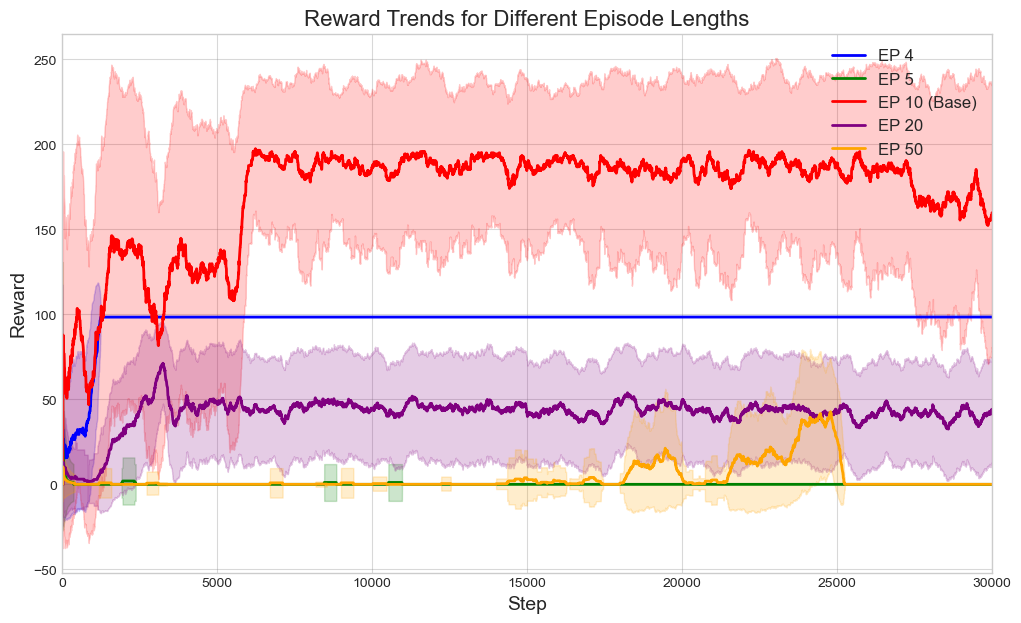

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

# Define file paths and corresponding reward columns for each episode length
file_info = {
    'Episode Length 4': {
        'path': r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/e4_r.csv',
        'reward_col': '(ep4)KAKAO_cuda0,ep4,a5,task 178,onpolicy - reward'
    },
    'Episode Length 5': {
        'path': r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/e5_r.csv',
        'reward_col': '(ep5)KAKAO_cuda0,ep5,a5,r*15, task 178, onpolicy - reward'
    },
    'Episode Length 10 (Base)': {
        'path': r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/e10_r.csv',
        'reward_col': '(r*15)HPC cuda1, ep10, a5, task 178 - reward'
    },
    'Episode Length 20': {
        'path': r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/e20_r.csv',
        'reward_col': '(ep20)KAKAO_cuda0,ep5,a5,r*15, task 178, onpolicy - reward'
    },
    'Episode Length 50': {
        'path': r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/e50_r.csv',
        'reward_col': '(ep50)KAKAO_cuda0,ep5,a5,r*15, task 178, onpolicy - reward'
    }
}

# Set style
plt.style.use('seaborn-whitegrid')

# Moving average window size
window_size = 100

# Prepare plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_facecolor('white')  # Background color

colors = ['blue', 'green', 'red', 'purple', 'orange']
labels = ['EP 4', 'EP 5', 'EP 10 (Base)', 'EP 20', 'EP 50']

# Load data, smooth rewards, and plot with confidence intervals
for i, (file_key, file_details) in enumerate(file_info.items()):
    # Load CSV
    file_path = file_details['path']
    reward_col = file_details['reward_col']
    df = pd.read_csv(file_path)
    
    # Check if the reward column exists in the data
    if reward_col not in df.columns:
        print(f"Warning: Column '{reward_col}' not found in {file_path}. Skipping this file.")
        continue
    
    # Filter data to steps <= 30000
    df = df[df["Step"] <= 30000]
    
    # Compute moving average and standard deviation for specified reward column
    df["smoothed_reward"] = df[reward_col].rolling(window=window_size, min_periods=1).mean()
    df["smoothed_reward_std"] = df[reward_col].rolling(window=window_size, min_periods=1).std()
    
    # Remove NaN values for plotting
    df.dropna(subset=["smoothed_reward"], inplace=True)
    
    # Plot smoothed rewards with confidence interval
    ax.plot(df["Step"], df["smoothed_reward"], label=labels[i], color=colors[i], linewidth=2)
    ax.fill_between(
        df["Step"],
        df["smoothed_reward"] - df["smoothed_reward_std"],
        df["smoothed_reward"] + df["smoothed_reward_std"],
        color=colors[i],
        alpha=0.2
    )
    
    # Calculate reward distribution diversity (D_reward)
    rewards = df["smoothed_reward"].dropna().values
    reward_values, counts = np.unique(rewards, return_counts=True)
    reward_probabilities = counts / len(rewards)
    D_reward = entropy(reward_probabilities)
    print(f'Reward Distribution Diversity (D_reward) for {labels[i]}: {D_reward}')

# Set plot labels and title
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Reward', fontsize=14)
ax.set_title('Reward Trends for Different Episode Lengths', fontsize=16)
ax.legend(fontsize=12, loc='upper right')  # Place legend at upper right

# Add grid
ax.grid(True, color='gray', alpha=0.3)

# Set x-axis and y-axis limits
plt.xlim(left=0, right=30000)

# Save the plot as PDF
plt.savefig('4_7_reward_trends_for_episode_lengths.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()


In [135]:
import json
import numpy as np
from scipy.stats import entropy

# JSON 파일로부터 데이터 로드 함수
def load_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['trajectories'], data['rewards']

# Reward 다양성 (엔트로피) 계산 함수
def calculate_reward_diversity(rewards):
    # Reward 값들의 빈도수 계산
    reward_values, counts = np.unique(rewards, return_counts=True)
    reward_probabilities = counts / len(rewards)  # 확률 분포 계산
    # 엔트로피 계산 (다양성 측정)
    diversity = entropy(reward_probabilities)
    return diversity

# 각 파일에 대해 리워드 다양성을 계산하는 함수
def analyze_reward_diversity(files):
    for file in files:
        # JSON 파일에서 데이터 로드
        _, rewards = load_data(file)
        
        # Reward 다양성 계산
        diversity = calculate_reward_diversity(rewards)
        
        # 결과 출력
        print(f'Reward Distribution Diversity (D_reward) for {file}: {diversity}')

# 분석할 JSON 파일 리스트
files_to_analyze = [
    '48eval_samples_df_geometric_4,5_taskg_cycle_178_step_30000.json',
    'eval_samples_onpolicy_e5_treward_178_step_30000.json',
    '48eval_samples_total_10,5_totalr15_task_178_step_20000.json',
    '(최종e20)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json',
    '(최종e50)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json'
]

# 리워드 다양성 분석 실행
analyze_reward_diversity(files_to_analyze)

summary_table = generate_summary_and_test(files_to_analyze)


Reward Distribution Diversity (D_reward) for 48eval_samples_df_geometric_4,5_taskg_cycle_178_step_30000.json: 0.0
Reward Distribution Diversity (D_reward) for eval_samples_onpolicy_e5_treward_178_step_30000.json: 0.1985152433458726
Reward Distribution Diversity (D_reward) for 48eval_samples_total_10,5_totalr15_task_178_step_20000.json: 0.8817329412233748
Reward Distribution Diversity (D_reward) for (최종e20)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json: 2.1357926538339025
Reward Distribution Diversity (D_reward) for (최종e50)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json: 0.0
                                                File  Unique Trajectories  \
0  48eval_samples_df_geometric_4,5_taskg_cycle_17...                    1   
1  eval_samples_onpolicy_e5_treward_178_step_3000...                   76   
2  48eval_samples_total_10,5_totalr15_task_178_st...                   56   
3  (최종e20)eval_samples_geometric_10,5_taskg_rscal...                   74   
4  

                                                File  Unique Trajectories  \
0  48eval_samples_df_geometric_4,5_taskg_cycle_17...                    1   
1  eval_samples_onpolicy_e5_treward_178_step_3000...                   76   
2  48eval_samples_total_10,5_totalr15_task_178_st...                   56   
3  (최종e20)eval_samples_geometric_10,5_taskg_rscal...                   74   
4  (최종e50)eval_samples_geometric_10,5_taskg_rscal...                    1   

   Successful Unique Trajectories  Success Rate (Unique, %)  \
0                               1                100.000000   
1                               4                  5.263158   
2                              40                 71.428571   
3                              71                 95.945946   
4                               0                  0.000000   

   Total Trajectories  Successful Total Trajectories  Success Rate (Total, %)  
0                 100                            100                    100.0 

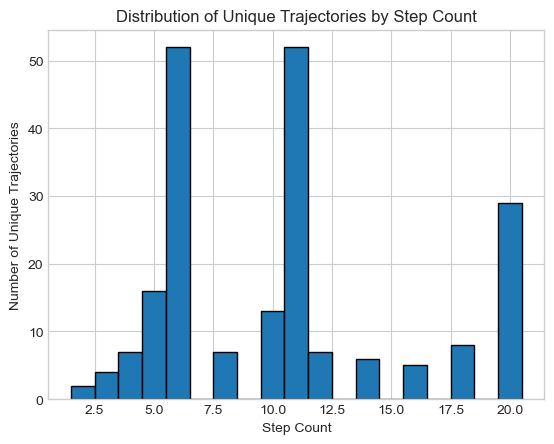

In [136]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, fisher_exact

# Load JSON data
def load_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['trajectories'], data['rewards']

# Find unique trajectories and calculate success
def find_unique_trajectories_with_steps(trajectories, rewards):
    unique_trajectory_set = set(map(str, trajectories))
    unique_trajectories = []
    successful_trajectories = 0
    step_counts = []

    for unique_traj in unique_trajectory_set:
        for traj, reward in zip(trajectories, rewards):
            if str(traj) == unique_traj:
                unique_trajectories.append({'trajectory': traj, 'reward': reward})
                step_counts.append(len(traj))  # Count the steps for each unique trajectory
                if reward > 1.0:  # Define successful trajectory
                    successful_trajectories += 1
                break
    return len(unique_trajectories), successful_trajectories, step_counts

# Calculate summary and create step distribution plot for each file
def generate_summary_and_step_distribution(files):
    all_data = []
    all_step_counts = []

    for file in files:
        # Load data
        trajectories, rewards = load_data(file)
        
        # Calculate unique trajectories, success rates, and step counts
        unique_count, successful_count, step_counts = find_unique_trajectories_with_steps(trajectories, rewards)
        success_rate_unique = successful_count / unique_count
        total_count = len(trajectories)
        success_rate_total = sum(1 for reward in rewards if reward > 1.0) / total_count
        all_step_counts.extend(step_counts)  # Collect step counts for distribution plot

        # Append results
        all_data.append({
            'File': file,
            'Unique Trajectories': unique_count,
            'Successful Unique Trajectories': successful_count,
            'Success Rate (Unique, %)': success_rate_unique * 100,
            'Total Trajectories': total_count,
            'Successful Total Trajectories': sum(1 for reward in rewards if reward > 1.0),
            'Success Rate (Total, %)': success_rate_total * 100
        })

    # Create DataFrame for the summary
    df = pd.DataFrame(all_data)
    print(df)

    # Plot the distribution of steps in unique trajectories
    plt.hist(all_step_counts, bins=range(min(all_step_counts), max(all_step_counts) + 1), align='left', edgecolor='black')
    plt.xlabel("Step Count")
    plt.ylabel("Number of Unique Trajectories")
    plt.title("Distribution of Unique Trajectories by Step Count")
    plt.show()

    return df

# Example usage:# 분석할 JSON 파일 리스트
files_to_analyze = [
    '48eval_samples_df_geometric_4,5_taskg_cycle_178_step_30000.json',
    'eval_samples_onpolicy_e5_treward_178_step_30000.json',
    '48eval_samples_total_10,5_totalr15_task_178_step_20000.json',
    '(최종e20)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json',
    '(최종e50)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json'
]
  # Replace with your actual file paths
summary_df = generate_summary_and_step_distribution(files_to_analyze)


Total number of successful trajectories: 260


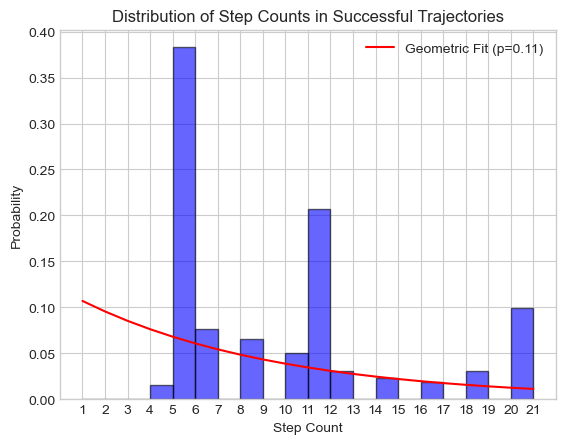

Chi-squared test statistic: 778.53, p-value: 0.00
The step count distribution significantly differs from a geometric distribution.


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, chisquare

# Load JSON data from multiple files
def load_data(filenames):
    all_trajectories = []
    all_rewards = []
    
    # 각 파일을 순회하며 데이터를 결합
    for filename in filenames:
        with open(filename, 'r') as f:
            data = json.load(f)
        all_trajectories.extend(data['trajectories'])
        all_rewards.extend(data['rewards'])
    
    return all_trajectories, all_rewards

# Calculate step counts for all successful trajectories
def find_successful_step_counts(trajectories, rewards):
    step_counts = []
    for traj, reward in zip(trajectories, rewards):
        if reward > 1.0:  # Define successful trajectory
            step_counts.append(len(traj))  # Count the steps for successful trajectory
    return step_counts

# Plot distribution and fit to a geometric distribution
def plot_step_distribution(step_counts):
    # 총 성공적인 trajectory 개수 출력
    print(f"Total number of successful trajectories: {len(step_counts)-1}")

    # Plot histogram of step counts
    plt.hist(step_counts, bins=range(1, max(step_counts) + 1), density=True, alpha=0.6, color='b', edgecolor='black')
    plt.xlabel("Step Count")
    plt.ylabel("Probability")
    plt.title("Distribution of Step Counts in Successful Trajectories")
    plt.xticks(np.arange(1, max(step_counts) + 1, 1))  # x축을 정수로만 표시

    # Fit a geometric distribution
    p = 1.0 / np.mean(step_counts)  # Parameter estimation for geometric distribution
    x = np.arange(1, max(step_counts) + 1)
    geom_probs = geom.pmf(x, p)

    # Plot the fitted geometric distribution
    plt.plot(x, geom_probs, 'r-', label=f'Geometric Fit (p={p:.2f})')
    plt.legend()
    plt.show()

    # Chi-squared goodness-of-fit test
    observed_freq, _ = np.histogram(step_counts, bins=range(1, max(step_counts) + 2))
    expected_freq = len(step_counts) * geom_probs  # Scale expected frequencies

    # Adjust expected frequencies to match observed frequency sum
    expected_freq = expected_freq * (observed_freq.sum() / expected_freq.sum())

    # Perform Chi-squared test
    chi2_stat, p_value = chisquare(observed_freq, f_exp=expected_freq)
    print(f"Chi-squared test statistic: {chi2_stat:.2f}, p-value: {p_value:.2f}")

    # Interpretation
    significance_level = 0.05
    if p_value < significance_level:
        print("The step count distribution significantly differs from a geometric distribution.")
    else:
        print("The step count distribution does not significantly differ from a geometric distribution.")

# Example usage
files_to_analyze = [
    '48eval_samples_df_geometric_4,5_taskg_cycle_178_step_30000.json',
    '48eval_samples_geometric_20,5_taskg_cycle_178_step_30000.json',
    'eval_samples_onpolicy_e5_treward_178_step_30000.json',
    '48eval_samples_total_10,5_totalr15_task_178_step_20000.json',
    '(최종e20)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json',
    '(최종e50)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json'
] 
# Load data from all files and aggregate step counts for successful trajectories
trajectories, rewards = load_data(files_to_analyze)
step_counts = find_successful_step_counts(trajectories, rewards)

# Plot the combined step count distribution and analyze
plot_step_distribution(step_counts)

Total number of successful trajectories: 10099


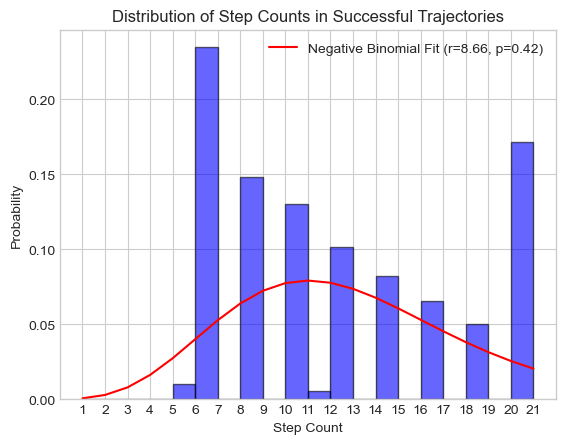

Chi-squared test statistic: 20211.36, p-value: 0.00
The step count distribution significantly differs from a negative binomial distribution.


In [155]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, chisquare, nbinom

# Load JSON data from multiple files
def load_data(filenames):
    all_trajectories = []
    all_rewards = []
    
    # 각 파일을 순회하며 데이터를 결합
    for filename in filenames:
        with open(filename, 'r') as f:
            data = json.load(f)
        all_trajectories.extend(data['trajectories'])
        all_rewards.extend(data['rewards'])
    
    return all_trajectories, all_rewards

# Calculate step counts for all successful trajectories
def find_successful_step_counts(trajectories, rewards):
    step_counts = []
    for traj, reward in zip(trajectories, rewards):
        if reward > 1.0:  # Define successful trajectory
            step_counts.append(len(traj))  # Count the steps for successful trajectory
    return step_counts

from scipy.stats import nbinom

# 음이항 분포 파라미터 추정 함수
def estimate_nbinom_params(step_counts):
    mean = np.mean(step_counts)
    var = np.var(step_counts)

    # 음이항 분포의 모수 추정
    p = mean / var
    r = mean**2 / (var - mean) if var > mean else 1  # r이 0이 되지 않도록 처리
    return r, p

# 음이항 분포 적합 여부를 판단하는 부분 (plot_step_distribution 함수 내에서 변경)
def plot_step_distribution(step_counts):
    # 총 성공적인 trajectory 개수 출력
    print(f"Total number of successful trajectories: {len(step_counts)}")

    # Plot histogram of step counts
    plt.hist(step_counts, bins=range(1, max(step_counts) + 1), density=True, alpha=0.6, color='b', edgecolor='black')
    plt.xlabel("Step Count")
    plt.ylabel("Probability")
    plt.title("Distribution of Step Counts in Successful Trajectories")
    plt.xticks(np.arange(1, max(step_counts) + 1, 1))  # x축을 정수로만 표시

    # Fit a negative binomial distribution
    r, p = estimate_nbinom_params(step_counts)
    x = np.arange(1, max(step_counts) + 1)
    nbinom_probs = nbinom.pmf(x - 1, r, p)  # x - 1로 조정하여 시작 지점 맞추기
    plt.plot(x, nbinom_probs, 'r-', label=f'Negative Binomial Fit (r={r:.2f}, p={p:.2f})')
    plt.legend()
    plt.show()

    # Chi-squared goodness-of-fit test
    observed_freq, _ = np.histogram(step_counts, bins=range(1, max(step_counts) + 2))
    expected_freq = len(step_counts) * nbinom_probs  # Scale expected frequencies

    # Adjust expected frequencies to match observed frequency sum
    expected_freq = expected_freq * (observed_freq.sum() / expected_freq.sum())

    # Perform Chi-squared test
    chi2_stat, p_value = chisquare(observed_freq, f_exp=expected_freq)
    print(f"Chi-squared test statistic: {chi2_stat:.2f}, p-value: {p_value:.2f}")

    # Interpretation
    significance_level = 0.05
    if p_value < significance_level:
        print("The step count distribution significantly differs from a negative binomial distribution.")
    else:
        print("The step count distribution does not significantly differ from a negative binomial distribution.")




# Example usage
files_to_analyze = [
    '48eval_samples_df_geometric_4,5_taskg_cycle_178_step_30000.json',
    '48eval_samples_geometric_20,5_taskg_cycle_178_step_30000.json',
    'eval_samples_onpolicy_e5_treward_178_step_30000.json',
    '48eval_samples_total_10,5_totalr15_task_178_step_20000.json',
    '(최종e20)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json',
    '(최종e50)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json'
] 
# Load data from all files and aggregate step counts for successful trajectories
trajectories, rewards = load_data(files_to_analyze)
step_counts = find_successful_step_counts(trajectories, rewards)

# Plot the combined step count distribution and analyze
plot_step_distribution(step_counts)

Total number of unique successful trajectories: 1871


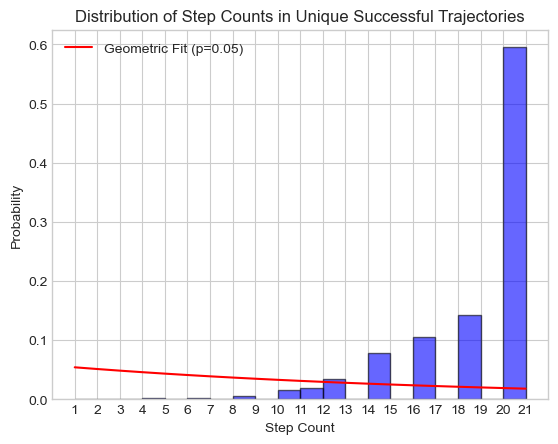

Chi-squared test statistic: 16475.56, p-value: 0.00
The step count distribution significantly differs from a geometric distribution.


In [158]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, chisquare

# Load JSON data from multiple files
def load_data(filenames):
    all_trajectories = []
    all_rewards = []
    
    # 각 파일을 순회하며 데이터를 결합
    for filename in filenames:
        with open(filename, 'r') as f:
            data = json.load(f)
        all_trajectories.extend(data['trajectories'])
        all_rewards.extend(data['rewards'])
    
    return all_trajectories, all_rewards

# Calculate step counts for all unique successful trajectories
def find_unique_successful_step_counts(trajectories, rewards):
    step_counts = []
    unique_trajectories = set()  # Unique trajectories set to avoid duplicates

    for traj, reward in zip(trajectories, rewards):
        traj_str = str(traj)  # Convert trajectory to a string to ensure uniqueness
        if reward > 1.0 and traj_str not in unique_trajectories:  # Define successful trajectory and check uniqueness
            unique_trajectories.add(traj_str)
            step_counts.append(len(traj))  # Count the steps for successful unique trajectory

    return step_counts

# Plot distribution and fit to a geometric distribution
def plot_step_distribution(step_counts):
    # 총 성공적인 unique trajectory 개수 출력
    print(f"Total number of unique successful trajectories: {len(step_counts)}")

    # Plot histogram of step counts
    plt.hist(step_counts, bins=range(1, max(step_counts) + 1), density=True, alpha=0.6, color='b', edgecolor='black')
    plt.xlabel("Step Count")
    plt.ylabel("Probability")
    plt.title("Distribution of Step Counts in Unique Successful Trajectories")
    plt.xticks(np.arange(1, max(step_counts) + 1, 1))  # x축을 정수로만 표시

    # Fit a geometric distribution
    p = 1.0 / np.mean(step_counts)  # Parameter estimation for geometric distribution
    x = np.arange(1, max(step_counts) + 1)
    geom_probs = geom.pmf(x, p)

    # Plot the fitted geometric distribution
    plt.plot(x, geom_probs, 'r-', label=f'Geometric Fit (p={p:.2f})')
    plt.legend()
    plt.show()

    # Chi-squared goodness-of-fit test
    observed_freq, _ = np.histogram(step_counts, bins=range(1, max(step_counts) + 2))
    expected_freq = len(step_counts) * geom_probs  # Scale expected frequencies

    # Adjust expected frequencies to match observed frequency sum
    expected_freq = expected_freq * (observed_freq.sum() / expected_freq.sum())

    # Perform Chi-squared test
    chi2_stat, p_value = chisquare(observed_freq, f_exp=expected_freq)
    print(f"Chi-squared test statistic: {chi2_stat:.2f}, p-value: {p_value:.2f}")

    # Interpretation
    significance_level = 0.05
    if p_value < significance_level:
        print("The step count distribution significantly differs from a geometric distribution.")
    else:
        print("The step count distribution does not significantly differ from a geometric distribution.")

# Example usage
files_to_analyze = [
    '48eval_samples_df_geometric_4,5_taskg_cycle_178_step_30000.json',
    '48eval_samples_geometric_20,5_taskg_cycle_178_step_30000.json',
    'eval_samples_onpolicy_e5_treward_178_step_30000.json',
    '48eval_samples_total_10,5_totalr15_task_178_step_20000.json',
    '(최종e20)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json',
    '(최종e50)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json'
] 
# Load data from all files and aggregate step counts for unique successful trajectories
trajectories, rewards = load_data(files_to_analyze)
step_counts = find_unique_successful_step_counts(trajectories, rewards)

# Plot the combined step count distribution and analyze
plot_step_distribution(step_counts)


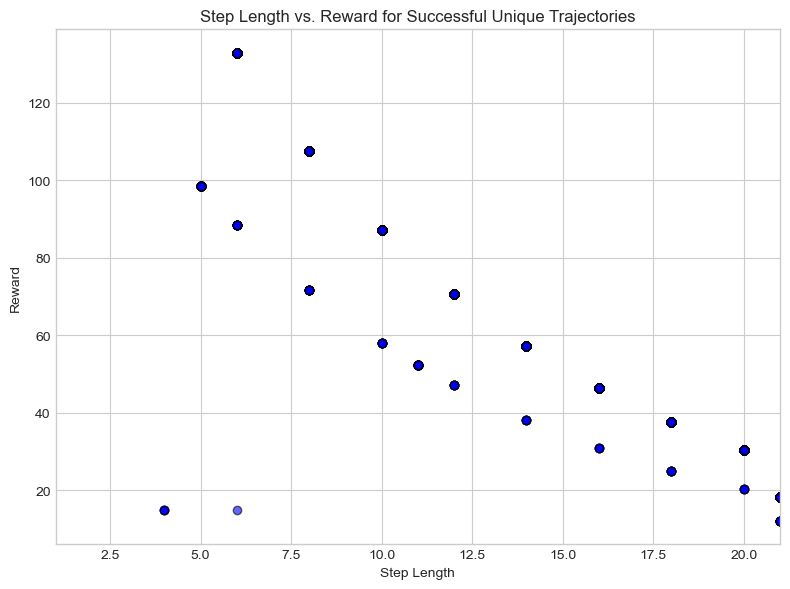

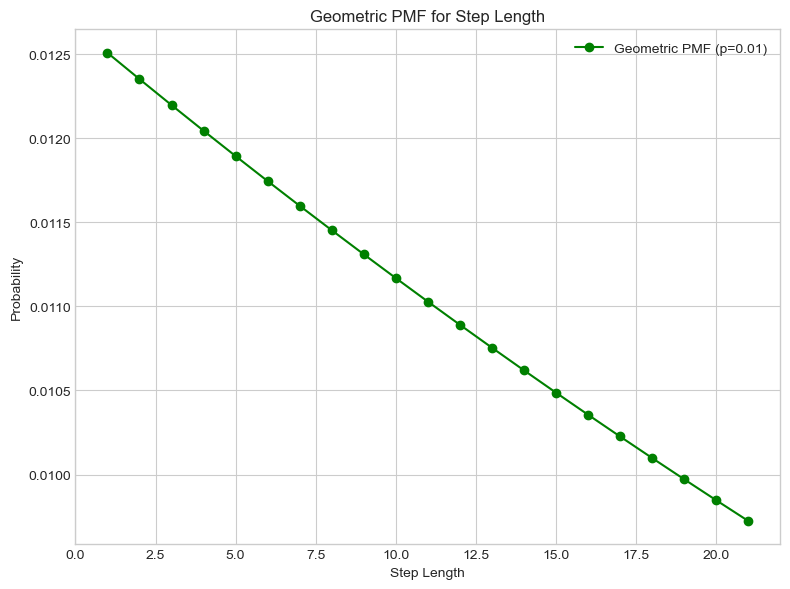

In [168]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# Load JSON data from multiple files
def load_data(filenames):
    all_trajectories = []
    all_rewards = []
    
    # 각 파일을 순회하며 데이터를 결합
    for filename in filenames:
        with open(filename, 'r') as f:
            data = json.load(f)
        all_trajectories.extend(data['trajectories'])
        all_rewards.extend(data['rewards'])
    
    return all_trajectories, all_rewards

# Calculate step counts and corresponding rewards for all successful unique trajectories
def get_step_length_and_rewards(trajectories, rewards):
    step_length_rewards = {}

    for traj, reward in zip(trajectories, rewards):
        if reward > 1.0:  # Define successful trajectory
            step_length = len(traj)  # Count the steps for successful trajectory
            traj_str = str(traj)  # Unique key for each trajectory configuration
            
            # 중복된 trajectory를 피하고, 각 step length에 대해 다양한 reward를 저장
            if step_length not in step_length_rewards:
                step_length_rewards[step_length] = []
            
            step_length_rewards[step_length].append(reward)
    
    return step_length_rewards

# Plot scatter plot of step length vs. reward and a separate plot for geometric PMF
def plot_and_save_figures(step_length_rewards):
    # 첫 번째 figure: step length vs. reward scatter plot
    step_lengths = []
    rewards = []

    for step_length, reward_list in step_length_rewards.items():
        step_lengths.extend([step_length] * len(reward_list))
        rewards.extend(reward_list)

    # Figure 1: Scatter plot of step length vs. reward
    plt.figure(figsize=(8, 6))
    plt.scatter(step_lengths, rewards, alpha=0.6, color='b', edgecolor='black')
    plt.xlabel("Step Length")
    plt.ylabel("Reward")
    plt.title("Step Length vs. Reward for Successful Unique Trajectories")
    plt.xlim(1, 21)
    plt.tight_layout()
    plt.savefig("step_length_vs_reward.pdf")
    plt.show()

    # Figure 2: Plotting the general geometric PMF for comparison
    plt.figure(figsize=(8, 6))
    avg_reward = np.mean(rewards)
    p = 1.0 / avg_reward  # Parameter estimation for geometric distribution of rewards
    step_range = np.arange(1, 22)
    pmf_values = geom.pmf(step_range, p)  # General geometric PMF values
    plt.plot(step_range, pmf_values, 'g-o', label=f'Geometric PMF (p={p:.2f})')
    plt.xlabel("Step Length")
    plt.ylabel("Probability")
    plt.title("Geometric PMF for Step Length")
    plt.legend()
    plt.tight_layout()
    plt.savefig("geometric_pmf.pdf")
    plt.show()

# Example usage
files_to_analyze = [
    '48eval_samples_df_geometric_4,5_taskg_cycle_178_step_30000.json',
    '48eval_samples_geometric_20,5_taskg_cycle_178_step_30000.json',
    'eval_samples_onpolicy_e5_treward_178_step_30000.json',
    '48eval_samples_total_10,5_totalr15_task_178_step_20000.json',
    '(최종e20)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json',
    '(최종e50)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json'
] 
# Load data from all files and aggregate step lengths and rewards for unique successful trajectories
trajectories, rewards = load_data(files_to_analyze)
step_length_rewards = get_step_length_and_rewards(trajectories, rewards)

# Plot and save the figures
plot_and_save_figures(step_length_rewards)

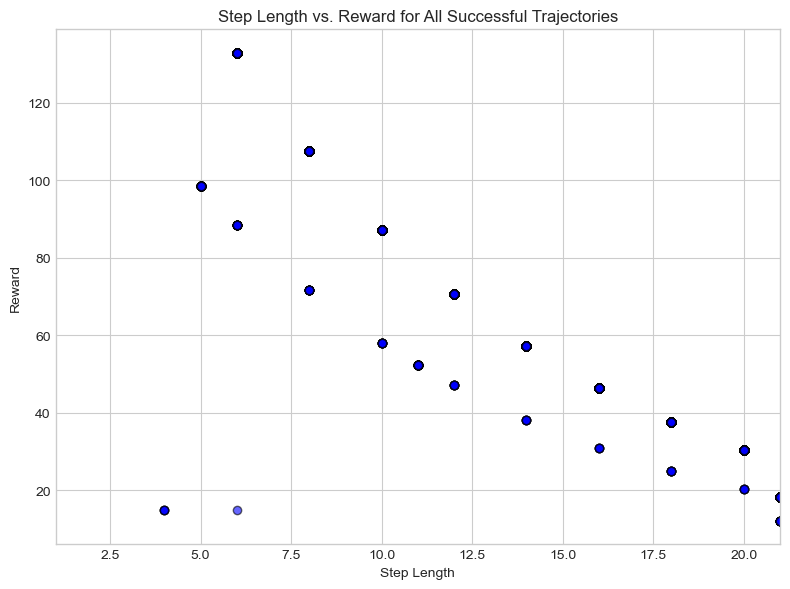

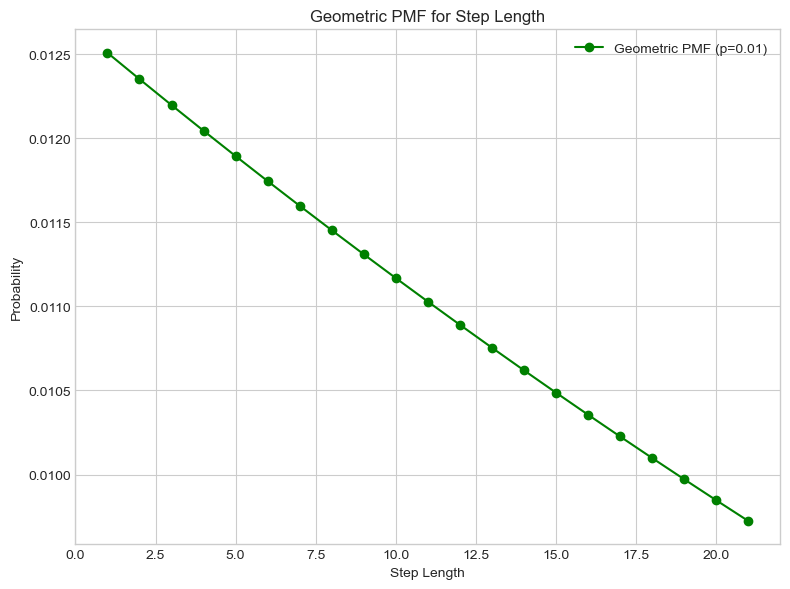

In [169]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# Load JSON data from multiple files
def load_data(filenames):
    all_trajectories = []
    all_rewards = []
    
    # 각 파일을 순회하며 데이터를 결합
    for filename in filenames:
        with open(filename, 'r') as f:
            data = json.load(f)
        all_trajectories.extend(data['trajectories'])
        all_rewards.extend(data['rewards'])
    
    return all_trajectories, all_rewards

# Calculate step counts and corresponding rewards for all successful trajectories (including duplicates)
def get_step_length_and_rewards_all(trajectories, rewards):
    step_lengths = []
    rewards_all = []

    for traj, reward in zip(trajectories, rewards):
        if reward > 1.0:  # Define successful trajectory
            step_lengths.append(len(traj))  # Count the steps for successful trajectory
            rewards_all.append(reward)  # Collect the reward

    return step_lengths, rewards_all

# Plot scatter plot of step length vs. reward and a separate plot for geometric PMF
def plot_and_save_figures_all(step_lengths, rewards_all):
    # 첫 번째 figure: step length vs. reward scatter plot (전체 trajectory)
    plt.figure(figsize=(8, 6))
    plt.scatter(step_lengths, rewards_all, alpha=0.6, color='b', edgecolor='black')
    plt.xlabel("Step Length")
    plt.ylabel("Reward")
    plt.title("Step Length vs. Reward for All Successful Trajectories")
    plt.xlim(1, 21)
    plt.tight_layout()
    plt.savefig("step_length_vs_reward_all.pdf")
    plt.show()

    # Figure 2: Plotting the general geometric PMF for comparison
    plt.figure(figsize=(8, 6))
    avg_reward = np.mean(rewards_all)
    p = 1.0 / avg_reward  # Parameter estimation for geometric distribution of rewards
    step_range = np.arange(1, 22)
    pmf_values = geom.pmf(step_range, p)  # General geometric PMF values
    plt.plot(step_range, pmf_values, 'g-o', label=f'Geometric PMF (p={p:.2f})')
    plt.xlabel("Step Length")
    plt.ylabel("Probability")
    plt.title("Geometric PMF for Step Length")
    plt.legend()
    plt.tight_layout()
    plt.savefig("geometric_pmf_all.pdf")
    plt.show()

# Example usage
files_to_analyze = [
    '48eval_samples_df_geometric_4,5_taskg_cycle_178_step_30000.json',
    '48eval_samples_geometric_20,5_taskg_cycle_178_step_30000.json',
    'eval_samples_onpolicy_e5_treward_178_step_30000.json',
    '48eval_samples_total_10,5_totalr15_task_178_step_20000.json',
    '(최종e20)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json',
    '(최종e50)eval_samples_geometric_10,5_taskg_rscale10_178_step_30000.json'
] 
# Load data from all files and aggregate step lengths and rewards for all successful trajectories
trajectories, rewards = load_data(files_to_analyze)
step_lengths, rewards_all = get_step_length_and_rewards_all(trajectories, rewards)

# Plot and save the figures for all trajectories
plot_and_save_figures_all(step_lengths, rewards_all)


파일 로드 상태 확인:


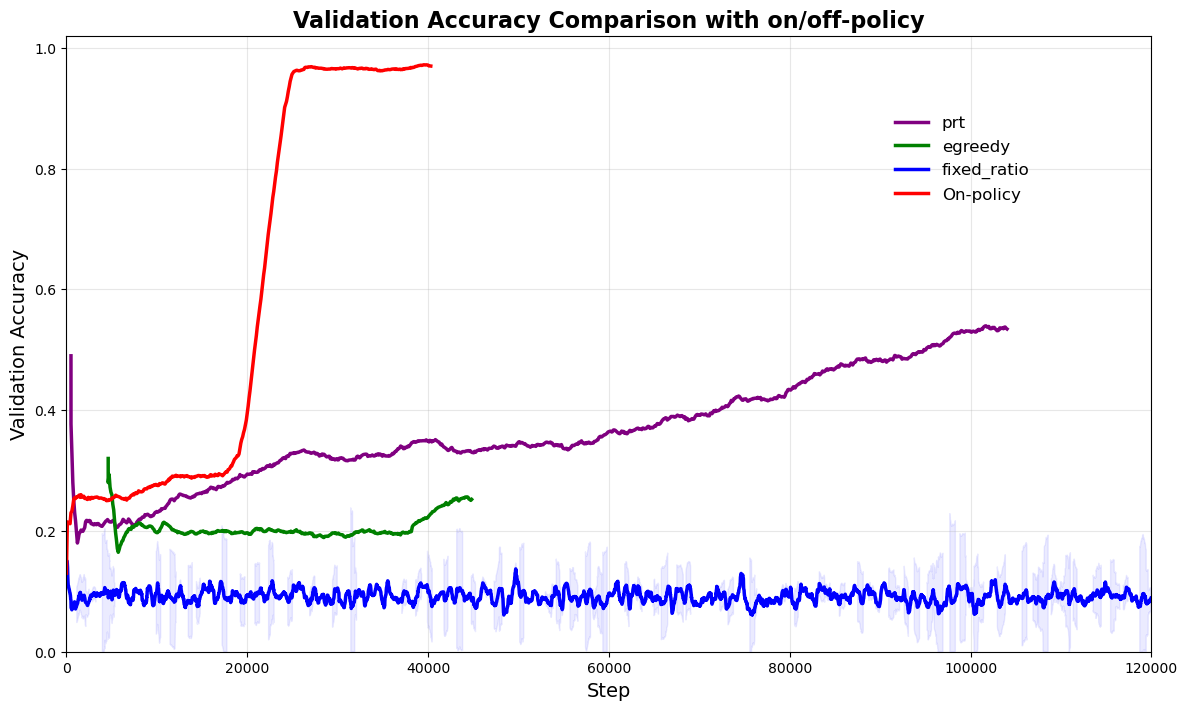

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 파일 경로 설정
base_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/'

# 모든 파일 로드 및 전처리
file_prefixes = ['prt', 'egreedy', 'fixed', 'gg']
all_dfs = {key: [] for key in file_prefixes}

# 디버깅: 파일 로드 확인
print("파일 로드 상태 확인:")
for prefix in file_prefixes:
    file_paths = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.startswith(prefix)]
    if not file_paths:
        print(f"[WARN] 접두사 {prefix}에 해당하는 파일이 없습니다.")
        continue

    temp_dfs = []
    for path in file_paths:
        df = pd.read_csv(path)
        val_accuracy_column = [col for col in df.columns if 'val_accuracy' in col.lower()]
        if not val_accuracy_column:
            print(f"[WARN] 파일 {path}에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.")
            continue
        
        # 필요한 데이터만 추출
        df['val_accuracy'] = df[val_accuracy_column[0]]  # 첫 번째 'val_accuracy' 열 사용
        df = df[['Step', 'val_accuracy']]
        temp_dfs.append(df)

    # 접두사별 데이터 병합
    if temp_dfs:
        combined_df = pd.concat(temp_dfs, ignore_index=True)
        all_dfs[prefix].append(combined_df)

# 플롯 그리기
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('white')

# 라벨링 및 색상 설정
colors = ['purple', 'green', 'blue', 'red']
labels = ['prt', 'egreedy', 'fixed_ratio', 'On-policy']
window_size = 50

# 데이터가 존재하는 그룹만 선택
valid_labels_colors = []
valid_dfs = []

for label, color, key in zip(labels, colors, file_prefixes):
    if all_dfs[key]:  # 데이터가 있는 경우만 추가
        valid_labels_colors.append((label, color))
        valid_dfs.append(all_dfs[key])

# 각 그룹별 평균 및 신뢰 구간 계산 후 플롯
for i, (label_color, dfs) in enumerate(zip(valid_labels_colors, valid_dfs)):
    label, color = label_color

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df = combined_df[combined_df["Step"] <= 120000]  # 최대 Step을 120,000으로 제한

    grouped = combined_df.groupby('Step')['val_accuracy']
    mean_val_accuracy = grouped.mean()
    sem_val_accuracy = grouped.sem()  # 표준 오차 계산

    mean_val_accuracy_smooth = mean_val_accuracy.rolling(window=window_size, min_periods=1).mean()
    ci_val_accuracy_smooth = sem_val_accuracy.rolling(window=window_size, min_periods=1).mean() * 1.96  # 95% 신뢰 구간

    # 평균 성능 플롯 및 신뢰 구간 표시
    ax.plot(mean_val_accuracy.index, mean_val_accuracy_smooth, label=label, linewidth=2.5, color=color)
    ax.fill_between(
        mean_val_accuracy.index,
        (mean_val_accuracy_smooth - ci_val_accuracy_smooth).clip(lower=0),
        (mean_val_accuracy_smooth + ci_val_accuracy_smooth).clip(upper=1.05),
        color=color,
        alpha=0.08,  # 투명도 낮춰서 중첩 효과 완화
    )

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.set_title('Validation Accuracy Comparison with on/off-policy', fontsize=16, weight='bold')
ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(0.75, 0.8), frameon=False)
ax.grid(visible=True, alpha=0.3)

plt.xlim(left=0, right=120000)
plt.ylim(bottom=0, top=1.02)

# PDF로 저장
plt.savefig('validation_accuracy_comparison_with_on_off.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()


파일 로드 상태 확인:


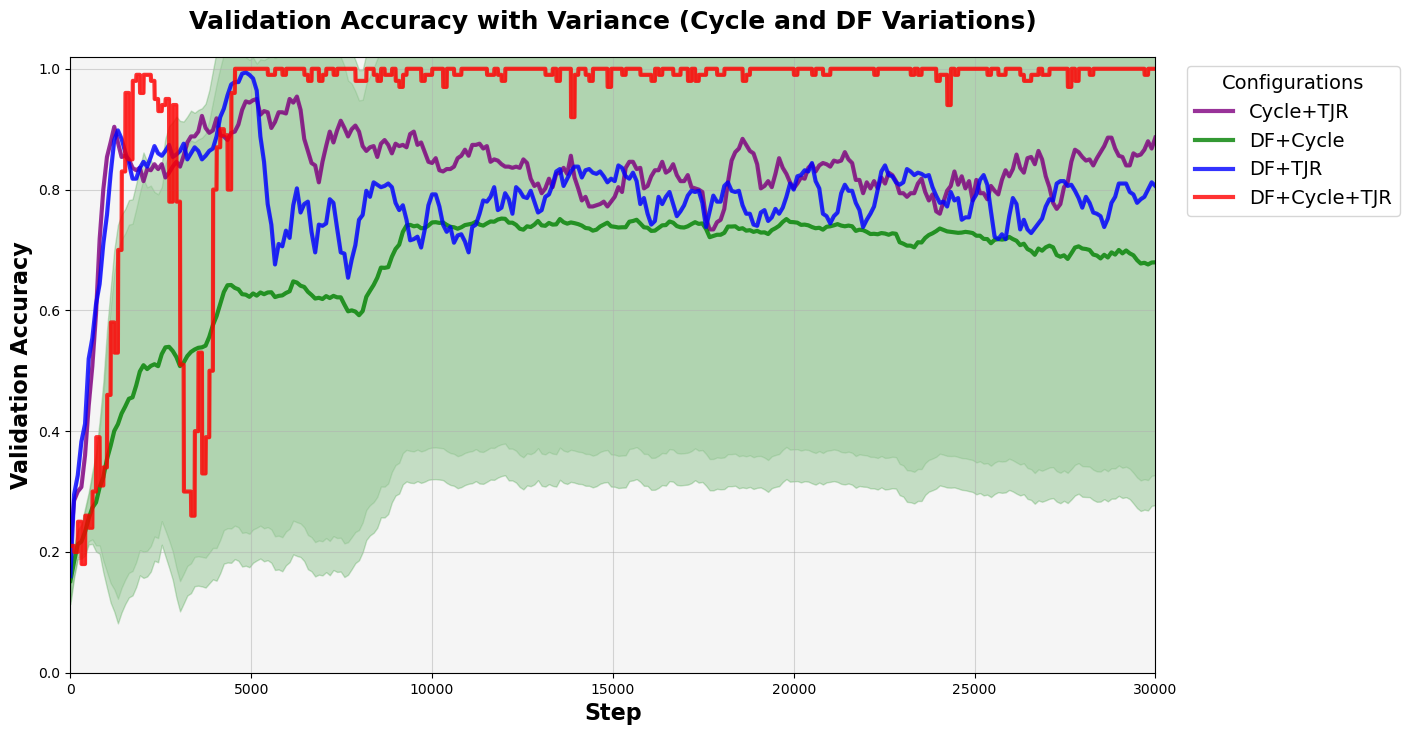

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 파일 경로 설정
base_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/'

# 새로운 그룹 리스트
file_prefixes = ['cycle+tjr', 'df+cycle', 'df+tjr', 'df+cycle+tjr']
all_dfs = {key: [] for key in file_prefixes}

# 디버깅: 파일 로드 확인
print("파일 로드 상태 확인:")
for prefix in file_prefixes:
    # 접두사 뒤에 숫자가 붙는 경우도 포함하도록 정규 표현식 패턴 사용
    file_paths = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.startswith(prefix) and f[len(prefix):len(prefix)+1].isdigit()]
    if not file_paths:
        print(f"[WARN] 접두사 {prefix}에 해당하는 파일이 없습니다.")
        continue

    temp_dfs = []
    for path in file_paths:
        df = pd.read_csv(path)
        val_accuracy_column = [col for col in df.columns if 'val_accuracy' in col.lower()]
        if not val_accuracy_column:
            print(f"[WARN] 파일 {path}에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.")
            continue
        
        # 필요한 데이터만 추출
        df['val_accuracy'] = df[val_accuracy_column[0]]  # 첫 번째 'val_accuracy' 열 사용
        df = df[['Step', 'val_accuracy']]
        temp_dfs.append(df)

    # 접두사별 데이터 병합
    if temp_dfs:
        combined_df = pd.concat(temp_dfs, ignore_index=True)
        all_dfs[prefix].append(combined_df)

# 플롯 개선을 위한 코드 수정
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('#f5f5f5')  # 배경색 설정 (밝은 회색)

# 라벨링 및 색상 설정
colors = ['purple', 'green', 'blue', 'red']
labels = ['Cycle+TJR', 'DF+Cycle', 'DF+TJR', 'DF+Cycle+TJR']
window_size = 5

# 데이터가 존재하는 그룹만 선택
valid_labels_colors = []
valid_dfs = []

for label, color, key in zip(labels, colors, file_prefixes):
    if all_dfs[key]:  # 데이터가 있는 경우만 추가
        valid_labels_colors.append((label, color))
        valid_dfs.append(all_dfs[key])

# 각 그룹별 평균, 표준편차/신뢰구간 계산 후 플롯
for i, (label_color, dfs) in enumerate(zip(valid_labels_colors, valid_dfs)):
    label, color = label_color

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df = combined_df[combined_df["Step"] <= 30000]  # 최대 Step을 30,000으로 제한

    grouped = combined_df.groupby('Step')['val_accuracy']
    mean_val_accuracy = grouped.mean()
    sem_val_accuracy = grouped.sem()  # 표준 오차 계산
    std_val_accuracy = grouped.std()  # 표준 편차 계산

    mean_val_accuracy_smooth = mean_val_accuracy.rolling(window=window_size, min_periods=1).mean()
    ci_val_accuracy_smooth = sem_val_accuracy.rolling(window=window_size, min_periods=1).mean() * 1.96  # 95% 신뢰 구간
    std_val_accuracy_smooth = std_val_accuracy.rolling(window=window_size, min_periods=1).mean()  # 표준 편차 영역

    # 평균 성능 플롯
    ax.plot(mean_val_accuracy.index, mean_val_accuracy_smooth, label=label, linewidth=3, color=color, alpha=0.8)

    # 신뢰구간/표준편차 영역 표시
    ax.fill_between(
        mean_val_accuracy.index,
        (mean_val_accuracy_smooth - ci_val_accuracy_smooth).clip(lower=0),
        (mean_val_accuracy_smooth + ci_val_accuracy_smooth).clip(upper=1.05),
        color=color,
        alpha=0.1,  # 신뢰구간 영역 투명도
    )
    ax.fill_between(
        mean_val_accuracy.index,
        (mean_val_accuracy_smooth - std_val_accuracy_smooth).clip(lower=0),
        (mean_val_accuracy_smooth + std_val_accuracy_smooth).clip(upper=1.05),
        color=color,
        alpha=0.2,  # 표준편차 영역 투명도
    )

# 그래프 설정
ax.set_xlabel('Step', fontsize=16, weight='bold')
ax.set_ylabel('Validation Accuracy', fontsize=16, weight='bold')
ax.set_title('Validation Accuracy with Variance (Cycle and DF Variations)', fontsize=18, weight='bold', pad=20)
ax.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True, title="Configurations", title_fontsize=14)
ax.grid(visible=True, alpha=0.5)

plt.xlim(left=0, right=30000)  # x축 범위를 30,000으로 설정
plt.ylim(bottom=0, top=1.02)

# 고해상도 PDF 및 PNG 저장
plt.savefig('validation_accuracy_with_variance_cycle_df_variations_step_30000.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.savefig('validation_accuracy_with_variance_cycle_df_variations_step_30000.png', format='png', bbox_inches='tight', dpi=300)

# 그래프 출력
plt.show()


파일 로드 상태 확인:


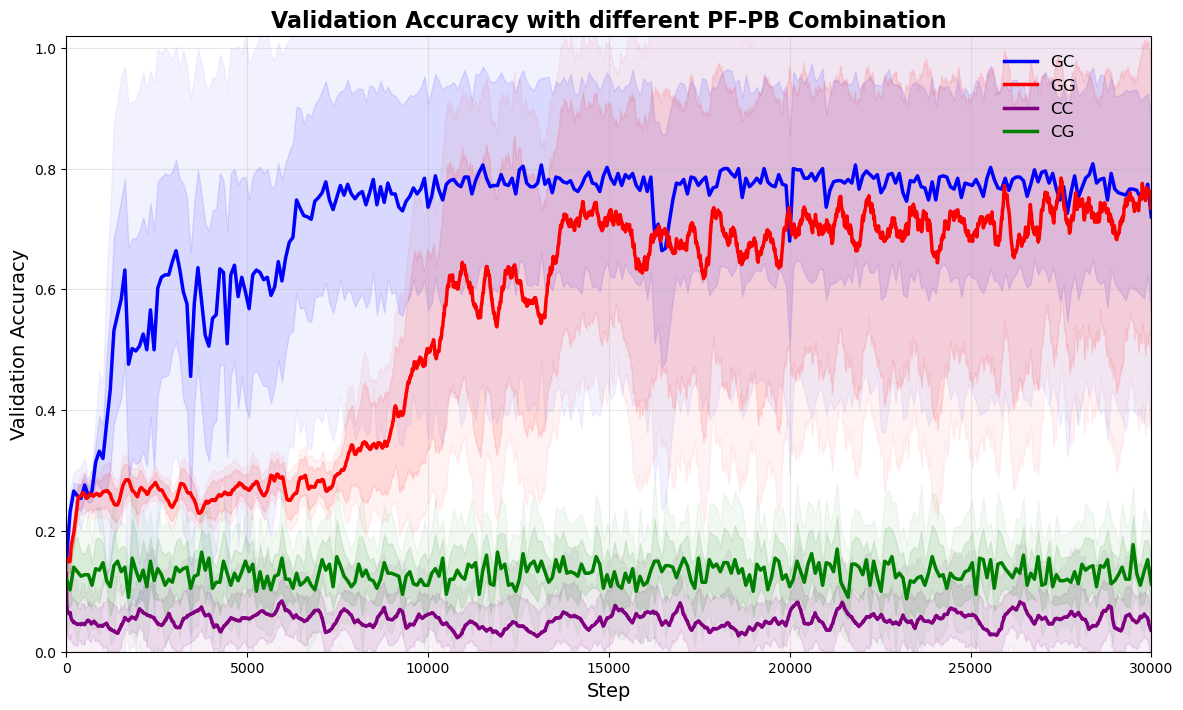

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.ndimage import gaussian_filter1d  # Gaussian smoothing 함수

# 파일 경로 설정
base_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/'  # Windows 파일 경로 수정

# 새로운 그룹 리스트 (이미지 기반 파일 접두사)
file_prefixes = ['gc', 'gg', 'cc', 'cg']
all_dfs = {key: [] for key in file_prefixes}

print("파일 로드 상태 확인:")
for prefix in file_prefixes:
    # 접두사에 해당하는 파일 찾기
    file_paths = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.startswith(prefix) and f[len(prefix):len(prefix)+1].isdigit()]
    if not file_paths:
        print(f"[WARN] 접두사 {prefix}에 해당하는 파일이 없습니다.")
        continue

    temp_dfs = []
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            val_accuracy_column = [col for col in df.columns if 'val_accuracy' in col.lower()]
            if not val_accuracy_column:
                print(f"[WARN] 파일 {path}에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.")
                continue

            # 필요한 데이터만 추출
            df['val_accuracy'] = df[val_accuracy_column[0]]  # 첫 번째 'val_accuracy' 열 사용
            df = df[['Step', 'val_accuracy']]
            temp_dfs.append(df)
        except Exception as e:
            print(f"[ERROR] 파일 {path} 로드 중 오류 발생: {e}")

    # 접두사별 데이터 병합
    if temp_dfs:
        combined_df = pd.concat(temp_dfs, ignore_index=True)
        all_dfs[prefix].append(combined_df)

# 유효한 데이터만 필터링
valid_dfs = [all_dfs[prefix] for prefix in file_prefixes if all_dfs[prefix]]

# 플롯 그리기
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('white')

# 라벨 순서 및 색상
labels = ['GC', 'GG', 'CC', 'CG']
colors = ['blue', 'red', 'purple', 'green']

# 스무딩 강도 매핑 (Gaussian)
sigma_mapping = {
    'CC': 0.1,  # CC에 강한 스무딩 적용
    'GG': 3,  # GG에 강한 스무딩 적용
    'GC': 0.1,  # GC에 약한 스무딩 적용
    'CG': 0.1,  # CG에 약한 스무딩 적용
}

# 이동평균 강도 매핑 (Window 크기)
window_mapping = {
    'CC': 100,  # CC는 50 스텝의 이동평균
    'GG': 200,  # GG는 100 스텝의 이동평균
    'GC': 1,  # GC는 30 스텝의 이동평균
    'CG': 1,  # CG는 20 스텝의 이동평균
}

# 각 그룹별 평균, 표준편차/신뢰구간 계산 후 플롯
for i, (label_color, dfs) in enumerate(zip(zip(labels, colors), valid_dfs)):
    label, color = label_color

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df = combined_df[combined_df["Step"] <= 30000]  # 최대 Step을 30,000으로 제한

    grouped = combined_df.groupby('Step')['val_accuracy']
    mean_val_accuracy = grouped.mean()
    sem_val_accuracy = grouped.sem()  # 표준 오차 계산
    std_val_accuracy = grouped.std()  # 표준 편차 계산

    # 이동 평균 스무딩 (그룹별 window_size 적용)
    window_size = window_mapping[label]  # 그룹별 이동평균 크기
    mean_val_accuracy_smooth = mean_val_accuracy.rolling(window=window_size, min_periods=1).mean()
    sem_val_accuracy_smooth = sem_val_accuracy.rolling(window=window_size, min_periods=1).mean()
    std_val_accuracy_smooth = std_val_accuracy.rolling(window=window_size, min_periods=1).mean()

    # Gaussian smoothing 적용 (그룹별로 스무딩 강도 다르게 설정)
    sigma = sigma_mapping[label]  # 그룹별 Gaussian 강도 설정
    mean_val_accuracy_gaussian = gaussian_filter1d(mean_val_accuracy_smooth, sigma=sigma)
    sem_val_accuracy_gaussian = gaussian_filter1d(sem_val_accuracy_smooth, sigma=sigma)
    std_val_accuracy_gaussian = gaussian_filter1d(std_val_accuracy_smooth, sigma=sigma)

    # 평균 성능 플롯
    ax.plot(mean_val_accuracy.index, mean_val_accuracy_gaussian, label=label, linewidth=2.5, color=color)

    # 신뢰구간/표준편차 영역 표시
    ax.fill_between(
        mean_val_accuracy.index,
        np.clip(mean_val_accuracy_gaussian - sem_val_accuracy_gaussian, 0, 1.05),
        np.clip(mean_val_accuracy_gaussian + sem_val_accuracy_gaussian, 0, 1.05),
        color=color,
        alpha=0.1,  # 신뢰구간 영역 투명도
    )
    ax.fill_between(
        mean_val_accuracy.index,
        np.clip(mean_val_accuracy_gaussian - std_val_accuracy_gaussian, 0, 1.05),
        np.clip(mean_val_accuracy_gaussian + std_val_accuracy_gaussian, 0, 1.05),
        color=color,
        alpha=0.05,  # 표준편차 영역 투명도
    )

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.set_title('Validation Accuracy with different PF-PB Combination', fontsize=16, weight='bold')
ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(0.85, 0.9), frameon=False)
ax.grid(visible=True, alpha=0.3)

plt.xlim(left=0, right=30000)  # x축 범위를 30,000으로 설정
plt.ylim(bottom=0, top=1.02)

# PDF로 저장
plt.savefig('RQ2validation_accuracy_with_different_PF-PB_Combination.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()


파일 로드 상태 확인:


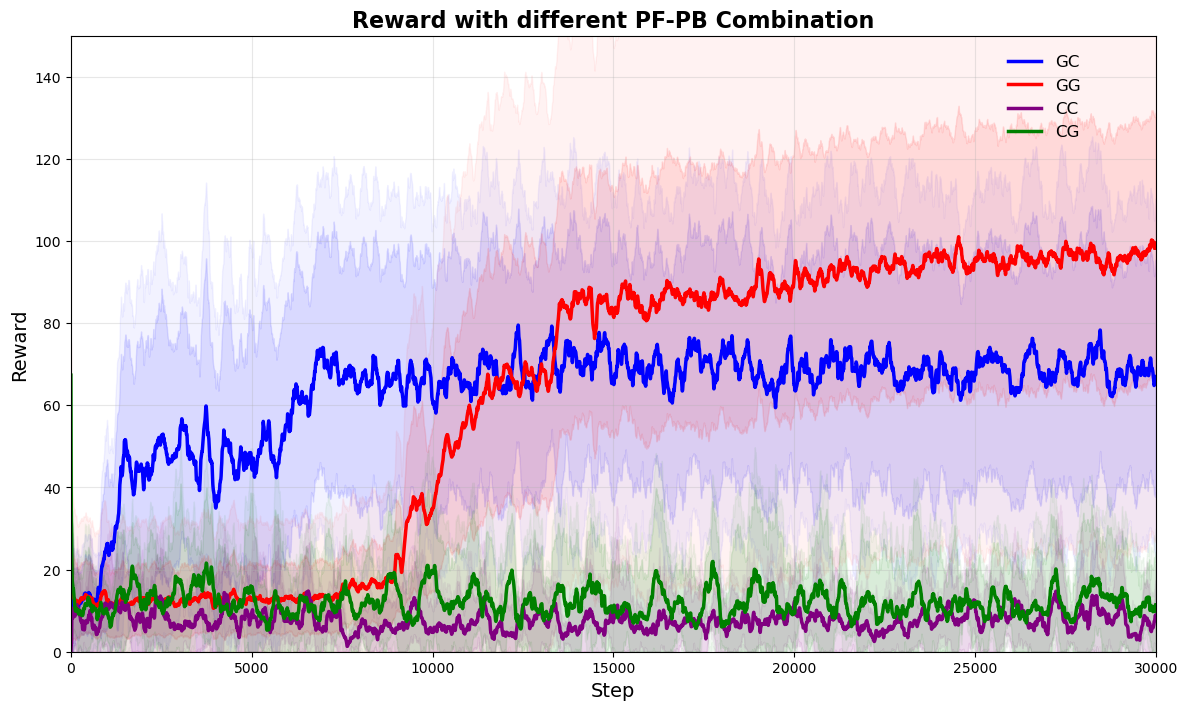

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.ndimage import gaussian_filter1d  # Gaussian smoothing 함수

# 파일 경로 설정
base_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/'  # Windows 파일 경로 수정

# 새로운 그룹 리스트 (이미지 기반 파일 접두사)
file_prefixes = ['gc_r', 'gg_r', 'cc_r', 'cg_r']
all_dfs = {key: [] for key in file_prefixes}

print("파일 로드 상태 확인:")
for prefix in file_prefixes:
    # 접두사에 해당하는 파일 찾기
    file_paths = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.startswith(prefix) and f[len(prefix):len(prefix)+1].isdigit()]
    if not file_paths:
        print(f"[WARN] 접두사 {prefix}에 해당하는 파일이 없습니다.")
        continue

    temp_dfs = []
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            val_accuracy_column = [col for col in df.columns if 'reward' in col.lower()]
            if not val_accuracy_column:
                print(f"[WARN] 파일 {path}에 'reward' 컬럼이 없습니다. 건너뜁니다.")
                continue

            # 필요한 데이터만 추출
            df['reward'] = df[val_accuracy_column[0]]  # 첫 번째 'val_accuracy' 열 사용
            df = df[['Step', 'reward']]
            temp_dfs.append(df)
        except Exception as e:
            print(f"[ERROR] 파일 {path} 로드 중 오류 발생: {e}")

    # 접두사별 데이터 병합
    if temp_dfs:
        combined_df = pd.concat(temp_dfs, ignore_index=True)
        all_dfs[prefix].append(combined_df)

# 유효한 데이터만 필터링
valid_dfs = [all_dfs[prefix] for prefix in file_prefixes if all_dfs[prefix]]

# 플롯 그리기
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('white')

# 라벨 순서 및 색상
labels = ['GC', 'GG', 'CC', 'CG']
colors = ['blue', 'red', 'purple', 'green']

# 스무딩 강도 매핑 (Gaussian)
sigma_mapping = {
    'CC': 3,  # CC에 강한 스무딩 적용
    'GG': 3,  # GG에 강한 스무딩 적용
    'GC': 3,  # GC에 약한 스무딩 적용
    'CG': 3,  # CG에 약한 스무딩 적용
}

# 이동평균 강도 매핑 (Window 크기)
window_mapping = {
    'CC': 150,  # CC는 50 스텝의 이동평균
    'GG': 150,  # GG는 100 스텝의 이동평균
    'GC': 150,  # GC는 30 스텝의 이동평균
    'CG': 150,  # CG는 20 스텝의 이동평균
}

# 각 그룹별 평균, 표준편차/신뢰구간 계산 후 플롯
for i, (label_color, dfs) in enumerate(zip(zip(labels, colors), valid_dfs)):
    label, color = label_color

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df = combined_df[combined_df["Step"] <= 30000]  # 최대 Step을 30,000으로 제한

    grouped = combined_df.groupby('Step')['reward']
    mean_reward = grouped.mean()
    sem_reward = grouped.sem()  # 표준 오차 계산
    std_reward = grouped.std()  # 표준 편차 계산

    # 이동 평균 스무딩 (그룹별 window_size 적용)
    window_size = window_mapping[label]  # 그룹별 이동평균 크기
    mean_reward_smooth = mean_reward.rolling(window=window_size, min_periods=1).mean()
    sem_reward_smooth = sem_reward.rolling(window=window_size, min_periods=1).mean()
    std_reward_smooth = std_reward.rolling(window=window_size, min_periods=1).mean()

    # Gaussian smoothing 적용 (그룹별로 스무딩 강도 다르게 설정)
    sigma = sigma_mapping[label]  # 그룹별 Gaussian 강도 설정
    mean_reward_gaussian = gaussian_filter1d(mean_reward_smooth, sigma=sigma)
    sem_reward_gaussian = gaussian_filter1d(sem_reward_smooth, sigma=sigma)
    std_reward_gaussian = gaussian_filter1d(std_reward_smooth, sigma=sigma)

    # 평균 성능 플롯
    ax.plot(mean_reward.index, mean_reward_gaussian, label=label, linewidth=2.5, color=color)

    # 신뢰구간/표준편차 영역 표시
    ax.fill_between(
        mean_reward.index,
        np.clip(mean_reward_gaussian - sem_reward_gaussian, 0, 150),
        np.clip(mean_reward_gaussian + sem_reward_gaussian, 0, 150),
        color=color,
        alpha=0.1,  # 신뢰구간 영역 투명도
    )
    ax.fill_between(
        mean_reward.index,
        np.clip(mean_reward_gaussian - std_reward_gaussian, 0, 150),
        np.clip(mean_reward_gaussian + std_reward_gaussian, 0, 150),
        color=color,
        alpha=0.05,  # 표준편차 영역 투명도
    )

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Reward', fontsize=14)
ax.set_title('Reward with different PF-PB Combination', fontsize=16, weight='bold')
ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(0.85, 0.9), frameon=False)
ax.grid(visible=True, alpha=0.3)

plt.xlim(left=0, right=30000)  # x축 범위를 30,000으로 설정
plt.ylim(bottom=0, top=150)

# PDF로 저장
plt.savefig('Reward_with_different_PF-PB_Combination.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()


파일 로드 상태 확인:


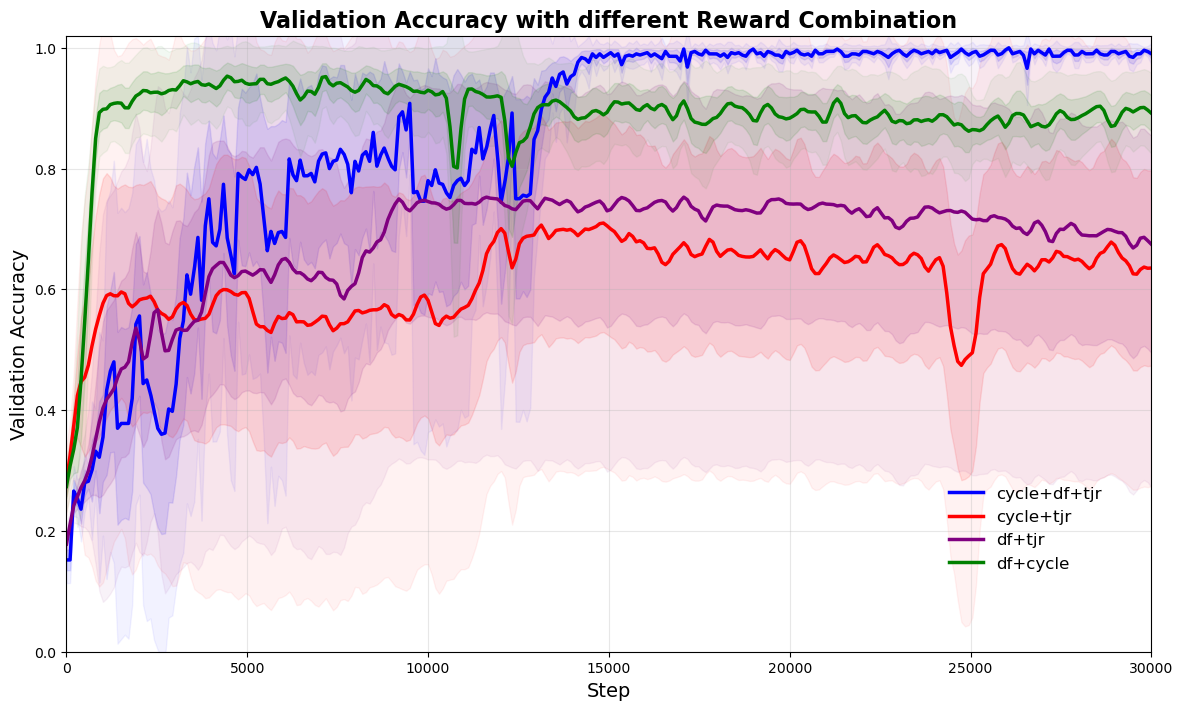

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.ndimage import gaussian_filter1d  # Gaussian smoothing 함수

# 파일 경로 설정
base_path = r'C:/Users/sanha/GFN_to_ARC/gfn/src/data/'  # Windows 파일 경로 수정

# 새로운 그룹 리스트 (이미지 기반 파일 접두사)
file_prefixes = ['cycle+df+tjr', 'df+tjr', 'df+cycle', 'cycle+tjr']
all_dfs = {key: [] for key in file_prefixes}

print("파일 로드 상태 확인:")
for prefix in file_prefixes:
    # 접두사에 해당하는 파일 찾기
    file_paths = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.startswith(prefix) and f[len(prefix):len(prefix)+1].isdigit()]
    if not file_paths:
        print(f"[WARN] 접두사 {prefix}에 해당하는 파일이 없습니다.")
        continue

    temp_dfs = []
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            val_accuracy_column = [col for col in df.columns if 'val_accuracy' in col.lower()]
            if not val_accuracy_column:
                print(f"[WARN] 파일 {path}에 'val_accuracy' 컬럼이 없습니다. 건너뜁니다.")
                continue

            # 필요한 데이터만 추출
            df['val_accuracy'] = df[val_accuracy_column[0]]  # 첫 번째 'val_accuracy' 열 사용
            df = df[['Step', 'val_accuracy']]
            temp_dfs.append(df)
        except Exception as e:
            print(f"[ERROR] 파일 {path} 로드 중 오류 발생: {e}")

    # 접두사별 데이터 병합
    if temp_dfs:
        combined_df = pd.concat(temp_dfs, ignore_index=True)
        all_dfs[prefix].append(combined_df)

# 유효한 데이터만 필터링
valid_dfs = [all_dfs[prefix] for prefix in file_prefixes if all_dfs[prefix]]

# 플롯 그리기
plt.style.use('default')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('white')

# 라벨 순서 및 색상
labels = ['cycle+df+tjr', 'cycle+tjr', 'df+tjr', 'df+cycle']
colors = ['blue', 'red', 'purple', 'green']

# 스무딩 강도 매핑 (Gaussian)
sigma_mapping = {
    'df+tjr': 1,  # CC에 강한 스무딩 적용
    'cycle+tjr': 1,  # GG에 강한 스무딩 적용
    'cycle+df+tjr': 0.05,  # GC에 약한 스무딩 적용
    'df+cycle': 1,  # CG에 약한 스무딩 적용
}

# 이동평균 강도 매핑 (Window 크기)
window_mapping = {
    'df+tjr': 1,  # CC는 50 스텝의 이동평균
    'cycle+tjr': 1,  # GG는 100 스텝의 이동평균
    'cycle+df+tjr': 100,  # GC는 30 스텝의 이동평균
    'df+cycle': 1,  # CG는 20 스텝의 이동평균
}

# 각 그룹별 평균, 표준편차/신뢰구간 계산 후 플롯
for i, (label_color, dfs) in enumerate(zip(zip(labels, colors), valid_dfs)):
    label, color = label_color

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df = combined_df[combined_df["Step"] <= 30000]  # 최대 Step을 30,000으로 제한

    grouped = combined_df.groupby('Step')['val_accuracy']
    mean_val_accuracy = grouped.mean()
    sem_val_accuracy = grouped.sem()  # 표준 오차 계산
    std_val_accuracy = grouped.std()  # 표준 편차 계산

    # 이동 평균 스무딩 (그룹별 window_size 적용)
    window_size = window_mapping[label]  # 그룹별 이동평균 크기
    mean_val_accuracy_smooth = mean_val_accuracy.rolling(window=window_size, min_periods=1).mean()
    sem_val_accuracy_smooth = sem_val_accuracy.rolling(window=window_size, min_periods=1).mean()
    std_val_accuracy_smooth = std_val_accuracy.rolling(window=window_size, min_periods=1).mean()

    # Gaussian smoothing 적용 (그룹별로 스무딩 강도 다르게 설정)
    sigma = sigma_mapping[label]  # 그룹별 Gaussian 강도 설정
    mean_val_accuracy_gaussian = gaussian_filter1d(mean_val_accuracy_smooth, sigma=sigma)
    sem_val_accuracy_gaussian = gaussian_filter1d(sem_val_accuracy_smooth, sigma=sigma)
    std_val_accuracy_gaussian = gaussian_filter1d(std_val_accuracy_smooth, sigma=sigma)

    # 평균 성능 플롯
    ax.plot(mean_val_accuracy.index, mean_val_accuracy_gaussian, label=label, linewidth=2.5, color=color)

    # 신뢰구간/표준편차 영역 표시
    ax.fill_between(
        mean_val_accuracy.index,
        np.clip(mean_val_accuracy_gaussian - sem_val_accuracy_gaussian, 0, 1.05),
        np.clip(mean_val_accuracy_gaussian + sem_val_accuracy_gaussian, 0, 1.05),
        color=color,
        alpha=0.1,  # 신뢰구간 영역 투명도
    )
    ax.fill_between(
        mean_val_accuracy.index,
        np.clip(mean_val_accuracy_gaussian - std_val_accuracy_gaussian, 0, 1.05),
        np.clip(mean_val_accuracy_gaussian + std_val_accuracy_gaussian, 0, 1.05),
        color=color,
        alpha=0.05,  # 표준편차 영역 투명도
    )

# 그래프 설정
ax.set_xlabel('Step', fontsize=14)
ax.set_ylabel('Validation Accuracy', fontsize=14)
ax.set_title('Validation Accuracy with different Reward Combination', fontsize=16, weight='bold')
ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(0.8, 0.2), frameon=False)
ax.grid(visible=True, alpha=0.3)

plt.xlim(left=0, right=30000)  # x축 범위를 30,000으로 설정
plt.ylim(bottom=0, top=1.02)

# PDF로 저장
plt.savefig('validation_accuracy_with_different_PF-PB_Combination.pdf', format='pdf', bbox_inches='tight')

# 그래프 출력
plt.show()


In [2]:
import json
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact, entropy
import numpy as np
from collections import Counter

# Load JSON data
def load_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['trajectories'], data['rewards']

# Calculate Shannon entropy for rewards
def calculate_reward_diversity(rewards):
    reward_counts = Counter(rewards)
    total_rewards = sum(reward_counts.values())
    probabilities = [count / total_rewards for count in reward_counts.values()]
    return entropy(probabilities, base=2)  # Log base 2 for Shannon entropy

# Find unique trajectories and count successful ones
def find_unique_trajectories(trajectories, rewards):
    unique_trajectory_set = set(map(str, trajectories))
    unique_trajectories = []
    successful_trajectories = 0

    for unique_traj in unique_trajectory_set:
        for traj, reward in zip(trajectories, rewards):
            if str(traj) == unique_traj:
                unique_trajectories.append({'trajectory': traj, 'reward': reward})
                if reward > 1.0:  # Define successful trajectory
                    successful_trajectories += 1
                break
    return len(unique_trajectories), successful_trajectories

# Calculate summary and statistical tests for each file
def generate_summary_and_test(files):
    all_data = []
    for file in files:
        # Load data
        trajectories, rewards = load_data(file)
        
        # Calculate unique and total success rates
        unique_count, successful_count = find_unique_trajectories(trajectories, rewards)
        success_rate_unique = successful_count / unique_count
        total_count = len(trajectories)
        success_rate_total = sum(1 for reward in rewards if reward > 1.0) / total_count
        
        # Calculate reward diversity (Shannon entropy)
        reward_diversity = calculate_reward_diversity(rewards)

        # Append results
        all_data.append({
            'File': file,
            'Unique Trajectories': unique_count,
            'Successful Unique Trajectories': successful_count,
            'Success Rate (Unique, %)': success_rate_unique * 100,
            'Total Trajectories': total_count,
            'Successful Total Trajectories': sum(1 for reward in rewards if reward > 1.0),
            'Success Rate (Total, %)': success_rate_total * 100,
            'Reward Diversity (Entropy)': reward_diversity
        })

    # Create a DataFrame for comparison
    df = pd.DataFrame(all_data)
    print(df)

    # Perform chi-squared and Fisher's exact tests if there are exactly two datasets
    if len(files) == 2:
        contingency_table = [
            [all_data[0]['Successful Unique Trajectories'], all_data[0]['Unique Trajectories'] - all_data[0]['Successful Unique Trajectories']],
            [all_data[1]['Successful Unique Trajectories'], all_data[1]['Unique Trajectories'] - all_data[1]['Successful Unique Trajectories']]
        ]
        chi2, chi2_p_value, _, _ = chi2_contingency(contingency_table)
        print(f"\nChi-squared test:\nChi2 Statistic: {chi2}, p-value: {chi2_p_value}")

        # Fisher's exact test
        _, fisher_p_value = fisher_exact(contingency_table)
        print(f"Fisher's exact test p-value: {fisher_p_value}")

        # Calculate Cramér's V
        cramers_v = calculate_cramers_v(np.array(contingency_table))
        print(f"Cramér's V: {cramers_v}")

        # Interpret results
        significance_level = 0.05
        if chi2_p_value < significance_level:
            print("Chi-squared test: The success rate difference between datasets is statistically significant.")
        else:
            print("Chi-squared test: No statistically significant difference in success rate between datasets.")
        
        if fisher_p_value < significance_level:
            print("Fisher's exact test: The success rate difference between datasets is statistically significant.")
        else:
            print("Fisher's exact test: No statistically significant difference in success rate between datasets.")

        return df, chi2, chi2_p_value, fisher_p_value, cramers_v
    else:
        return df

# Calculate Cramér's V
def calculate_cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = np.sum(contingency_table)
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

files_to_analyze = [
    '1234eval_samples_10,5_(df+tjr)_task_178_step_30000.json',
    '1234_onpolicy_(df+cycle+tje)_178_step_30000.json',
    '111eval_samples_10,5_(cycle+tjr)_task_178_step_30000.json',
    '77_geometric_10,5_(df+cycle)_178_step_30000.json',
]

summary_df = generate_summary_and_test(files_to_analyze)

                                                File  Unique Trajectories  \
0  1234eval_samples_10,5_(df+tjr)_task_178_step_3...                   35   
1   1234_onpolicy_(df+cycle+tje)_178_step_30000.json                    5   
2  111eval_samples_10,5_(cycle+tjr)_task_178_step...                   38   
3   77_geometric_10,5_(df+cycle)_178_step_30000.json                   47   

   Successful Unique Trajectories  Success Rate (Unique, %)  \
0                              26                 74.285714   
1                               5                100.000000   
2                              29                 76.315789   
3                              29                 61.702128   

   Total Trajectories  Successful Total Trajectories  Success Rate (Total, %)  \
0                 100                             86                     86.0   
1                 100                            100                    100.0   
2                 100                             89   

In [16]:
files = [
  "111_onpolicy_(gg)_178_step_30000.json",
  "111_geometric_10,5_gc_cycle_178_step_30000.json",
  "(최종cg)eval_samples_c-g_rscale15_178_step_30000.json",
  "categorical_data.json"
  ]

summary_df = generate_summary_and_test(files)

                                                File  Unique Trajectories  \
0              111_onpolicy_(gg)_178_step_30000.json                   21   
1    111_geometric_10,5_gc_cycle_178_step_30000.json                   56   
2  (최종cg)eval_samples_c-g_rscale15_178_step_30000...                   59   
3                              categorical_data.json                   75   

   Successful Unique Trajectories  Success Rate (Unique, %)  \
0                              18                 85.714286   
1                              49                 87.500000   
2                              10                 16.949153   
3                              10                 13.333333   

   Total Trajectories  Successful Total Trajectories  Success Rate (Total, %)  \
0                 100                             97                     97.0   
1                 300                            291                     97.0   
2                 100                             11   

In [10]:
import re
import json
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact, entropy
from collections import Counter
import numpy as np

# Load JSON data
def load_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['trajectories'], data['rewards']

# Calculate Shannon entropy for rewards
def calculate_reward_diversity(rewards):
    reward_counts = Counter(rewards)
    total_rewards = sum(reward_counts.values())
    probabilities = [count / total_rewards for count in reward_counts.values()]
    return entropy(probabilities, base=2)

# Find unique trajectories and count successful ones
def find_unique_trajectories(trajectories, rewards):
    unique_trajectory_set = set(map(str, trajectories))
    unique_trajectories = []
    successful_trajectories = 0

    for unique_traj in unique_trajectory_set:
        for traj, reward in zip(trajectories, rewards):
            if str(traj) == unique_traj:
                unique_trajectories.append({'trajectory': traj, 'reward': reward})
                if reward > 1.0:
                    successful_trajectories += 1
                break
    return len(unique_trajectories), successful_trajectories

# Extract task number from file name
def extract_task_number(filename):
    match = re.search(r"task_(\d+)", filename)
    if match:
        return int(match.group(1))
    return None

# Group and analyze by task
def analyze_by_task(files):
    task_data = {}
    
    for file in files:
        task_number = extract_task_number(file)
        if task_number is None:
            continue
        
        # Load data
        trajectories, rewards = load_data(file)
        
        # Calculate metrics
        unique_count, successful_count = find_unique_trajectories(trajectories, rewards)
        success_rate_unique = successful_count / unique_count
        total_count = len(trajectories)
        success_rate_total = sum(1 for reward in rewards if reward > 1.0) / total_count
        reward_diversity = calculate_reward_diversity(rewards)
        
        # Store results in task_data
        if task_number not in task_data:
            task_data[task_number] = {
                'Task Number': task_number,
                'Files': [],
                'Unique Trajectories': 0,
                'Successful Unique Trajectories': 0,
                'Success Rate (Unique, %)': 0,
                'Total Trajectories': 0,
                'Successful Total Trajectories': 0,
                'Success Rate (Total, %)': 0,
                'Reward Diversity (Entropy)': []
            }
        
        # Update task_data
        task_data[task_number]['Files'].append(file)
        task_data[task_number]['Unique Trajectories'] += unique_count
        task_data[task_number]['Successful Unique Trajectories'] += successful_count
        task_data[task_number]['Total Trajectories'] += total_count
        task_data[task_number]['Successful Total Trajectories'] += sum(1 for reward in rewards if reward > 1.0)
        task_data[task_number]['Reward Diversity (Entropy)'].append(reward_diversity)

    # Calculate averages and format results
    task_summary = []
    for task_number, data in task_data.items():
        data['Success Rate (Unique, %)'] = (data['Successful Unique Trajectories'] / data['Unique Trajectories']) * 100
        data['Success Rate (Total, %)'] = (data['Successful Total Trajectories'] / data['Total Trajectories']) * 100
        data['Reward Diversity (Entropy)'] = np.mean(data['Reward Diversity (Entropy)'])  # Average diversity
        task_summary.append(data)

    # Create DataFrame for visualization
    df = pd.DataFrame(task_summary)
    return df

# Example usage
files_to_analyze = [
    '1234eval_samples_10,5_(test)_task_379_step_30000.json',
    '1234eval_samples_10,5_(test)_task_240_step_30000.json',
    '1234eval_samples_10,5_(test)_task_154_step_30000.json',
    '1234eval_samples_10,5_(test)_task_149_step_30000.json',
    '1234eval_samples_10,5_(test)_task_139_step_30000.json',
    '1234eval_samples_10,5_(test)_task_86_step_30000.json',
    '549eval_samples_10,5_(test)_task_379_step_30000.json',
    '549eval_samples_10,5_(test)_task_240_step_30000.json',
    '549eval_samples_10,5_(test)_task_154_step_30000.json',
    '549eval_samples_10,5_(test)_task_149_step_30000.json',
    '549eval_samples_10,5_(test)_task_139_step_30000.json',
    '549eval_samples_10,5_(test)_task_86_step_30000.json',
    '111eval_samples_10,5_(test)_task_379_step_30000.json',
    '111eval_samples_10,5_(test)_task_240_step_30000.json',
    '111eval_samples_10,5_(test)_task_154_step_30000.json',
    '111eval_samples_10,5_(test)_task_149_step_30000.json',
    '111eval_samples_10,5_(test)_task_139_step_30000.json',
    '111eval_samples_10,5_(test)_task_86_step_30000.json',
]

# Analyze and display results
task_summary_df = analyze_by_task(files_to_analyze)
print(task_summary_df)


FileNotFoundError: [Errno 2] No such file or directory: '1234eval_samples_10,5_(test)_task_379_step_30000.json'

In [ ]:
import re
import json
import pandas as pd
from scipy.stats import entropy
from collections import Counter
import numpy as np

# Load JSON data
def load_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['trajectories'], data['rewards']

# Calculate Shannon entropy for rewards
def calculate_reward_diversity(rewards):
    reward_counts = Counter(rewards)
    total_rewards = sum(reward_counts.values())
    probabilities = [count / total_rewards for count in reward_counts.values()]
    return entropy(probabilities, base=2)

# Find unique trajectories and count successful ones
def find_unique_trajectories(trajectories, rewards):
    unique_trajectory_set = set(map(str, trajectories))
    unique_trajectories = []
    successful_trajectories = 0

    for unique_traj in unique_trajectory_set:
        for traj, reward in zip(trajectories, rewards):
            if str(traj) == unique_traj:
                unique_trajectories.append({'trajectory': traj, 'reward': reward})
                if reward > 1.0:
                    successful_trajectories += 1
                break
    return len(unique_trajectories), successful_trajectories

# Group and analyze by method keyword
def analyze_by_method(files, methods):
    method_data = {method: [] for method in methods}
    
    for file in files:
        # Determine which method keyword is in the file name
        method = next((m for m in methods if m in file), None)
        if method is None:
            continue
        
        # Load data
        trajectories, rewards = load_data(file)
        
        # Calculate metrics
        unique_count, successful_count = find_unique_trajectories(trajectories, rewards)
        success_rate_unique = successful_count / unique_count if unique_count > 0 else 0
        total_count = len(trajectories)
        success_rate_total = sum(1 for reward in rewards if reward > 1.0) / total_count if total_count > 0 else 0
        reward_diversity = calculate_reward_diversity(rewards)
        
        # Store results
        method_data[method].append({
            'File': file,
            'Unique Trajectories': unique_count,
            'Successful Unique Trajectories': successful_count,
            'Success Rate (Unique, %)': success_rate_unique * 100,
            'Total Trajectories': total_count,
            'Successful Total Trajectories': sum(1 for reward in rewards if reward > 1.0),
            'Success Rate (Total, %)': success_rate_total * 100,
            'Reward Diversity (Entropy)': reward_diversity
        })
    
    # Aggregate results by method
    aggregated_data = []
    for method, records in method_data.items():
        if records:
            total_files = len(records)
            total_unique = sum(r['Unique Trajectories'] for r in records)
            total_successful_unique = sum(r['Successful Unique Trajectories'] for r in records)
            total_trajectories = sum(r['Total Trajectories'] for r in records)
            total_successful_trajectories = sum(r['Successful Total Trajectories'] for r in records)
            avg_success_rate_unique = (total_successful_unique / total_unique) * 100 if total_unique > 0 else 0
            avg_success_rate_total = (total_successful_trajectories / total_trajectories) * 100 if total_trajectories > 0 else 0
            avg_reward_diversity = np.mean([r['Reward Diversity (Entropy)'] for r in records])
            
            aggregated_data.append({
                'Method': method,
                'Total Files': total_files,
                'Total Unique Trajectories': total_unique,
                'Total Successful Unique Trajectories': total_successful_unique,
                'Avg Success Rate (Unique, %)': avg_success_rate_unique,
                'Total Trajectories': total_trajectories,
                'Total Successful Trajectories': total_successful_trajectories,
                'Avg Success Rate (Total, %)': avg_success_rate_total,
                'Avg Reward Diversity (Entropy)': avg_reward_diversity
            })
    
    # Create DataFrame for visualization
    df = pd.DataFrame(aggregated_data)
    return df

# Define method keywords
methods = ['df', 'cycle', 'tjr', 'base', 'splus']

# Example files to analyze
files_to_analyze = [
    'eval_samples_geo_df최종+gammax_10,5 task 178_step_30000.json',
    'eval_samples_geo_10,5_df_task_178_step_30000.json',
    '123eval_samples_df_10,5_totalr_task_178_step_20000.json',
    '1234eval_samples_geometric_10,5_taskg_cycle_178_step_30000.json',
    # '549_geometric_10,5_gc_cycle_178_step_30000.json',
    '123eval_samples_geometric_10,5_taskg_cycle_178_step_30000.json',
    '900eval_samples_tjr_10,5_taskg_rscale10_178_step_20000.json',
    '111eval_samples_tjr_10,5_taskg_rscale10_178_step_20000.json',
    '123eval_samples_tjr_10,5_taskg_rscale10_178_step_20000.json',
    '77_onpolicy_base_178_step_30000.json',
    '123_onpolicy_base_178_step_30000.json',
    '1234_onpolicy_base_178_step_30000.json',
    '1234_onpolicy_splus_178_step_30000.json',
    '123_onpolicy_splus_178_step_30000.json',
    '77_onpolicy_splus_178_step_30000.json',
]

# Analyze and display results
method_summary_df = analyze_by_method(files_to_analyze, methods)
print(method_summary_df)


  Method  Total Files  Total Unique Trajectories  \
0     df            3                        106   
1  cycle            2                          2   
2    tjr            3                        238   
3   base            3                        228   
4  splus            3                        300   

   Total Successful Unique Trajectories  Avg Success Rate (Unique, %)  \
0                                    80                     75.471698   
1                                     2                    100.000000   
2                                   150                     63.025210   
3                                    12                      5.263158   
4                                    96                     32.000000   

   Total Trajectories  Total Successful Trajectories  \
0                 300                            268   
1                 200                            200   
2                 300                            202   
3                 300   

In [8]:
task_summary_df.head()

Task Number Keyword                                              Files  \
0          178      df  [eval_samples_geo_10,5_df_task_178_step_30000....   

   Unique Trajectories  Successful Unique Trajectories  \
0                    4                               2   

   Success Rate (Unique, %)  Total Trajectories  \
0                      50.0                   4   

   Successful Total Trajectories  Success Rate (Total, %)  \
0                              2                     50.0   

   Reward Diversity (Entropy)  
0                         1.0

In [3]:
# Reward diversity 계산 추가
def generate_summary_and_test(files):
    all_data = []
    for file in files:
        # Load data
        trajectories, rewards = load_data(file)
        
        # Calculate unique and total success rates
        unique_count, successful_count = find_unique_trajectories(trajectories, rewards)
        success_rate_unique = successful_count / unique_count
        total_count = len(trajectories)
        success_rate_total = sum(1 for reward in rewards if reward > 1.0) / total_count
        
        # Calculate reward diversity (Shannon entropy)
        reward_diversity = calculate_reward_diversity(rewards)

        # Append results
        all_data.append({
            'File': file,
            'Unique Trajectories': unique_count,
            'Successful Unique Trajectories': successful_count,
            'Success Rate (Unique, %)': success_rate_unique * 100,
            'Total Trajectories': total_count,
            'Successful Total Trajectories': sum(1 for reward in rewards if reward > 1.0),
            'Success Rate (Total, %)': success_rate_total * 100,
            'Reward Diversity (Entropy)': reward_diversity  # 추가된 diversity 결과
        })

    # Create a DataFrame for comparison
    df = pd.DataFrame(all_data)
    print(df)

    # Perform chi-squared and Fisher's exact tests if there are exactly two datasets
    if len(files) == 2:
        contingency_table = [
            [all_data[0]['Successful Unique Trajectories'], all_data[0]['Unique Trajectories'] - all_data[0]['Successful Unique Trajectories']],
            [all_data[1]['Successful Unique Trajectories'], all_data[1]['Unique Trajectories'] - all_data[1]['Successful Unique Trajectories']]
        ]
        chi2, chi2_p_value, _, _ = chi2_contingency(contingency_table)
        print(f"\nChi-squared test:\nChi2 Statistic: {chi2}, p-value: {chi2_p_value}")

        # Fisher's exact test
        _, fisher_p_value = fisher_exact(contingency_table)
        print(f"Fisher's exact test p-value: {fisher_p_value}")

        # Calculate Cramér's V
        cramers_v = calculate_cramers_v(np.array(contingency_table))
        print(f"Cramér's V: {cramers_v}")

        # Interpret results
        significance_level = 0.05
        if chi2_p_value < significance_level:
            print("Chi-squared test: The success rate difference between datasets is statistically significant.")
        else:
            print("Chi-squared test: No statistically significant difference in success rate between datasets.")
        
        if fisher_p_value < significance_level:
            print("Fisher's exact test: The success rate difference between datasets is statistically significant.")
        else:
            print("Fisher's exact test: No statistically significant difference in success rate between datasets.")

        return df, chi2, chi2_p_value, fisher_p_value, cramers_v
    else:
        return df


In [4]:
# Files to analyze
files_to_analyze = [
    'categorical_data.json',
    'geometric_data.json'
]

# 분석 실행
summary_df = generate_summary_and_test(files_to_analyze)

# 결과 출력
print(summary_df)

                    File  Unique Trajectories  Successful Unique Trajectories  \
0  categorical_data.json                   75                              10   
1    geometric_data.json                   45                              36   

   Success Rate (Unique, %)  Total Trajectories  \
0                 13.333333                 100   
1                 80.000000                 100   

   Successful Total Trajectories  Success Rate (Total, %)  \
0                             10                     10.0   
1                             89                     89.0   

   Reward Diversity (Entropy)  
0                    3.387046  
1                    0.888040  

Chi-squared test:
Chi2 Statistic: 50.09635722679201, p-value: 1.4637848104373272e-12
Fisher's exact test p-value: 3.4620305039265707e-13
Cramér's V: 0.6461189082178296
Chi-squared test: The success rate difference between datasets is statistically significant.
Fisher's exact test: The success rate difference between dat

In [1]:
import os 
print(os.getcwd())

c:\Users\sanha\GFN_to_ARC\gfn\src


In [2]:
import json 
with open ("gflownet_trajectories2.json", "r") as f:
    data = json.load(f)


In [3]:
data[0]

{'states': [[[[2.0, 2.0, 1.0], [1.0, 5.0, 1.0], [5.0, 2.0, 2.0]]],
  [[[5.0, 2.0, 2.0], [1.0, 5.0, 1.0], [2.0, 2.0, 1.0]]],
  [[[2.0, 1.0, 1.0], [2.0, 5.0, 2.0], [5.0, 1.0, 2.0]]],
  [[[5.0, 2.0, 2.0], [1.0, 5.0, 1.0], [2.0, 2.0, 1.0]]],
  [[[2.0, 2.0, 5.0], [1.0, 5.0, 1.0], [1.0, 2.0, 2.0]]],
  [[[5.0, 2.0, 2.0], [1.0, 5.0, 1.0], [2.0, 2.0, 1.0]]],
  [[[2.0, 1.0, 1.0], [2.0, 5.0, 2.0], [5.0, 1.0, 2.0]]],
  [[[1.0, 2.0, 2.0], [1.0, 5.0, 1.0], [2.0, 2.0, 5.0]]],
  [[[2.0, 1.0, 5.0], [2.0, 5.0, 2.0], [1.0, 1.0, 2.0]]],
  [[[2.0, 1.0, 5.0], [2.0, 5.0, 2.0], [1.0, 1.0, 2.0]]]],
 'actions': [3, 0, 1, 2, 2, 0, 0, 0, 4],
 'rewards': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 15.0],
 'states_full': [{'trials_remain': [-1],
   'terminated': [1],
   'input': [[2,
     2,
     1,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0],
    

In [9]:
import numpy as np 
np.array(data[0]['states']).shape

(10, 1, 3, 3)